# Two Fluid Quantum Cosmological Model

In [1]:
# Importing the relevant libraries

import sys
import math
import numpy as np                                                # imports the Numpy Library

from tqdm import tqdm

import matplotlib.pyplot as plt

from numcosmo_py import Nc, Ncm                                   # imports the NumCosmo library
from numcosmo_py.plotting.tools import set_rc_params_article      # imports Numcosmo plotting tools

#Ncm.cfg_init()                                                    # starts the NumCosmo library

from scipy.integrate import quad

# Integral Function
def integral(y,x):
  def integrand(xi):
    for i in range(len(x)):
      if xi == x[i]:
        return y[i]
        break

  values = []
  for i in range(len(x)):
    values.append( quad(integrand,x[0],x[i])[0] )
  return np.array(values)

# Integral Function
def prim(y,x):
  values = []
  for i in range(len(x)):
    values.append( np.trapz(x[:i+1],y[:i+1]) )
  return np.array(values)

# Introduction

In this notebook we shall analyze the predictions a two fluid quantum cosmological model where gravity is coupled though matter using the Wheeler-De Witt equation.

A single fluid with equation of state $p(\rho) = w\rho$ was considered in $\tt \text{arXiv:0610205}$ , using the framework of Bohmian mechanics. At background level, it lead to a non-singular scale factor. At perturbative level, the primordial spectrum of adiabatic perturbations was found to be approximately scale invariant, with

$${\cal P}_{\zeta}(k \gg 1) \approx A_{s}k^{n_{s} - 1}\, , $$
$$ n_{s} = 1 + \frac{12w}{1 + 3w}\, ,$$

where $n_{s}$ is known as the scalar spectral index, which is constrained to the range $n_{s} = 0.965 \pm 0.004, A_{s} = 2.101 \times 10^{-9} \pm 0.034 $ by Planck Data $\tt\text{arXiv:1807.06209}$. The explicit $n_{s}$ value for dust $w \approx 0$ and radiation $w=1/3$ are given by

In [2]:
def nsw(w):                             # defines a function that calculates the single fluid spectral index ns
  return 1 + 12*w/(1+3*w)

print(r'w=0 => '+str(nsw(0)))           # dust w=0 spectral index
print(r'w=1/3 => '+str(nsw(1/3)))       # radiation w = 1/3 spectral index

w=0 => 1.0
w=1/3 => 3.0


The above results mean that ordinary matter cannot describe the approximately flat red spectrum with $n_{s}$. Therefore, a natural extension of said model is to consider the two fluid coupled to geometry.

Said model was analyzed at background level with great detail in $\tt \text{arXiv:0505109}$ , where it was found that the obtained scale factor is also non-singular. However, the perturbative analysis has not yet been performed due to theoretical difficulties.

Reference $\tt \text{arXiv:1510.06628}$ analyzes the cosmological perturbations formalism for $N$ fluid models. In the 2 fluid case, the obtained Hamiltonian that describes perturbations is given explicitly by

\begin{align}
    \delta {\cal H}^{(2,s)} & = \frac{1}{2m_{z}}P_{\zeta}^{2} + \frac{1}{2m_{S}}P_{Q}^{2} + \left({ \frac{ \bar{c}_{n} }{ \bar{c}_{S}\bar{c}_{m} } }^{2}\frac{1}{m_{\zeta}m_{S}}\frac{1}{NH}\right)P_{\zeta}P_{Q} \\
    %
    & \, \, + \frac{1}{2}m_{z}\nu_{\zeta}^{2} z^{2} + \frac{1}{2}m_{S}\nu_{S}^{2}Q^{2} \, ,
\end{align}

where $\zeta$ and $Q$ denote adiabatic and entropy perturbations, respectively. We also introduced

\begin{align*}
    m_{z}  \equiv \frac{ a^{3}({ \bar{\rho} + \bar{p} }) }{N\bar{c}_{S}^{2}\bar{H}^{2} }\, , \hspace{2.4cm} & \hspace{-0.1cm} m_{S}  \equiv \frac{ 1 }{  N a^{3}\bar{c}_{m}^2\bar{\omega} } \, ,  \\
    %
    \nu_{z}^{2} \equiv \bar{c}_{S}^{2}F^{2}_{k} \, , \hspace{3.15cm} & \hspace{0.05cm} \nu_{S}^{2} \equiv {c}_{m}^{2}F^{2}_{k} \, ,  \\
    %
    \bar{c}_{S}^{2} \equiv \bar{c}_{1}^{2}\cos^{2}\phi+\bar{c}_{2}^{2}\sin^{2}\phi \, , \hspace{1cm} & \bar{c}_{m}^{2} \equiv \bar{c}_{2}^{2}\cos^{2}\phi+\bar{c}_{1}^{2}\sin^{2}\phi
    \, .
\end{align*}

where $\bar{\omega} \equiv (\rho_1 + p_1)(\rho_2 + p_2)/(\rho + p)$ and $\bar{c}_{n}^{2} \equiv \bar{c}_{1}^{2} - \bar{c}_{2}^{2}$. Here, for later convenience, we have also introduced the angular variable $\phi$ and the functions $F_{k}(t)$ by

\begin{equation}
 \cos^{2}\phi \equiv \frac{ \rho_1 + p_1 }{ \rho + p }\, ,
\end{equation}

\begin{equation}
 \sin^{2}\phi \equiv \frac{ \rho_2 + p_2 }{ \rho + p }\, ,
\end{equation}

\begin{equation}
 \hspace{0.8cm} F^{2}_{k} \equiv \left({\frac{ Nk }{ a }}\right)^{2}\, ,
\end{equation}

the angular variable $\phi$ is also associated to the dominant fluid, with $\phi=0$ denoting domination by the fluid $1$ and $\phi=\pi/2$ denoting domination by the fluid $2$.

The obtained Hamiltonian for the adiabatic and entropy modes leads to the equations of motion

\begin{align}
  \ddot{\zeta} - R_{H,\zeta}\dot{\zeta} + \nu^{2}_{\zeta}\zeta & = -\aleph_{\zeta S}Q + \beth_{\zeta S}\dot{Q} \, , \\
  \ddot{Q} - R_{H,S}\dot{Q} + \nu^{2}_{S}Q & = -\aleph_{S\zeta}\zeta + \beth_{S\zeta}\dot{\zeta} \, , \\
\end{align}

where we introduced the effective Hubble radius for the adiabatic and entropy modes

\begin{align}
 R_{H,\zeta} & \equiv \left( \frac{ \dot{m}_{\zeta} }{ m_{\zeta} } + Ym_{S}m_{\zeta}\dot{Y} \right)\varrho \, , \\
 R_{H,S} & \equiv \left( \frac{ \dot{m}_{S} }{ m_{S} } + Ym_{S}m_{\zeta}\dot{Y} \right)\varrho \, ,
\end{align}

and the couplings

\begin{align}
 \aleph_{\zeta S} & \equiv Ym_{S}\nu^{2}_{S}\, , \, \,  & \, \, \beth_{\zeta S} \equiv \frac{ m_{s} }{ m_{\zeta} }\left( m_{\zeta}\dot{Y} + \dot{m}_{\zeta}Y \right)\varrho \, , \\
 \aleph_{S\zeta} & \equiv Ym_{\zeta}\nu^2_{\zeta}\, , \, \,  & \, \, \beth_{\zeta S} \equiv \frac{ m_{\zeta} }{ m_{s} }\left( m_{s}\dot{Y} + \dot{m}_{s}Y \right)\varrho \, .
\end{align}

where $\varrho \equiv (1-Y^{2}m_{S}m_{\zeta})^{-1} $. It's also relevant to point out the dependence of such terms with respect to the modes. Since $\nu\_{\ell}^{2} \sim k^{2}, m_{\ell} \sim k^{0}, Y \sim k^{0}$, we have the following spectral behavior

\begin{align}
  R_{H\ell} & \sim k^{0}\, , \\
  \aleph_{\ell} & \sim k^{2}\, , \\
  \beth_{\ell} & \sim k^{0}\, ,
\end{align}

where $\ell = \zeta, Q$ is just a label. This implies that, for large $k$, only the frequency term $\nu^{2}_{\ell}$ and the coordinate-coordinate coupling $\aleph_{\ell}$ are relevant.

In usual cosmological perturbation models, the perturbations are decoupled, which is recovered by setting $Y \rightarrow 0$, so that the equations have a similar form but with $\aleph_{ij} = \beth_{ij} = 0$. One then analyzes two different regimes:

\begin{align}
  \text{ i) Sub-Hubble :} & |R_{H, \ell}| \ll \nu^{2}_{\ell} \implies \text{oscillatory behavior} \, , \\
  \text{ ii) Super-Hubble :}  & |R_{H, \ell}| \gg \nu^{2}_{\ell} \implies \text{"frozen" behavior} \, .
\end{align}

Also, since $R_{H\ell} \sim k^{0}, \nu^{2}_{\ell} \sim k^{2}$, for modes with large enough $k$, they will remain sub-Hubble for most of their evolution, that is

\begin{align}
  \text{ i) UV limit} \, \, k \ll k_{\text{crit}} \iff \text{Sub-Hubble} \, \, &  \implies \text{oscillatory behavior} \, , \\
  \text{ ii) IR limit} \, \, k \gg k_{\text{crit}} \iff \text{Super-Hubble}  \, \, & \implies \text{"frozen" behavior} \, ,
\end{align}

where we emphasize that this holds only for an interval of the modes time evolution.

In this model, however, the couplings $\aleph_{\ell}, \beth_{\ell}$ are also relevant, and will lead to non-trival effects apart to the usual oscillatory/frozen behavior. In particular, **even in the deep UV limit $k \gg k_{\text{crit}}$, the modes will still be coupled by the $\aleph_{\ell}$ term**. Therefore, one may study such coupling behavior for large enough modes.

On the other hand, if one restricts the analysis to $k \ll k_{\text{crit}}$, we obtain the reverse super-Hubble behavior where $R_{H\ell}$ and the coupling $\beth_{\ell}$ are relevant, which may provide understand of the effects of such coupling. Note however that, due to the super-Hubble behavior, the WKB approximation does not hold and one cannot impose vacuum initial conditions. One may still study the numerical behavior of the modes differential equations, but those will not lead to predictions on the CMB power spectrum.

While at classical level the equations of motion could be solved by numerical methods, at quantum level this demands the use of special quantization techniques to define the associated vacuum state and extract predictions, as proposed by $\tt \text{arXiv:1510.06628}$ using the Hamiltonian Diagonalization Technique. The Hamiltonian in terms of the new variables is given by



The technique amounts to define new canonical variables $\left\{ Q{1}, Q^{2}, P^{1}, P^{2} \right\}$ to diagonalize the perturbative Hamiltonian. Since the obtained canonical transformation is time dependent, the Hamiltonian can only be diagonalized for an initial time instant. However, the coupling between the variables is improved and enables one to define a reasonable vacuum state. For more details, see $\tt \text{arXiv:1510.06628}$.

Therefore in this notebook, we analyze explicitly the background and perturbative quantities, with our final aim to calculate the modes $\zeta_{k}, Q_{k}$ and their associated power spectrum.

## Background Quantities

In this section we study the quantities $m_{S}, m_{Q}, \phi, c^{2}_{S}, c^{2}_{m}$ that occur in the perturbative Hamiltonian. We also study the evolution of the eigenvalues $\nu_{1}, \nu_{2}$ that diagonalize the Hamiltonian tensor. Finally, we study the behavior of the coupling matrices $\gamma_{ij}, \tau_{ij}$, which define the dynamics of the relevant perturbative quantities.

To do so, we start by defining our cosmological parameters.

In [3]:
cosmo = Nc.HICosmoQGRW()                                    # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

# these lines set the relevant cosmological parameters
cosmo.props.w = 1.0e-6                                      # dust/dark matter equation of state
cosmo.props.Omegar = 2.0 * (1.0e-5)                         # radiation abundance today
cosmo.props.Omegaw = 2.0 * (1.0 - 1.0e-5)                   # dust/dark matter abundance today
cosmo.props.xb = 1.0e30                                     # inverse scale factor x=1/a at the time of the bounce

In [4]:
# time variables

k = 1.0
min_alpha_c = -120.0                                           # defines the minimum value of the time variable alpha (α) during the contraction phase
max_alpha_c = -1.0                                             # defines the maximum value for α
min_alpha_scale = 1.0e-12                                      # defines the minimum scale e.g. the minimum step of α
np_plot = 1000                                                  # plotting variable of the Numpy library

# Time arrays for the contraction and bounce phases

alpha_c = np.linspace(min_alpha_c, max_alpha_c, np_plot)       # defines the α interval for the contraction phase
alpha_b_e = np.geomspace(min_alpha_scale, 2.0, np_plot)        # defines the α interval that surrounds the bounce. np.geomspace() was used to have better visualization
alpha_b = np.concatenate((np.flip(-alpha_b_e), alpha_b_e))     # defines the that surrounds the bounce, but with a different spacing

To study the behavior of said quantities, we shall vary our cosmological parameters. However, before we dwell into such analysis, let's perform a consistency check by considering the dust only $\Omega_{r} = 0$ and radiation only $\Omega_{w} = 0$ cases. The complete model shall present regimes of domination by each fluid, and we shall also check if we indeed recover the $n_{s}$ values for the single fluid case.

We now proceed to study the behavior of the background quantities $\nu_{z}, \nu_{s}, m_{s}, m_{z}$. To do so, we first evolve the equations of motion for the adiabatic $\zeta_{k}$ and entropy $Q_{k}$ perturbations over the time intervals for $\alpha$ defined above. This can be done using the $\tt \text{eom_eval}$ method, which calculates the equations of motion quantities for one instant of time in C. We now define a class that calculates the equations of motion for all instants of time in a given interval for $\alpha$ for a given mode number $k$.

In [5]:
class model_evol:
  def __init__(self,model,alpha_list,k):
    self.model = model
    self.time = alpha_list
    self.k = k
    self.evol = np.array( [ model.eom_eval(alpha,k) for alpha in alpha_list] )
    self.y = np.array( [ eqmotion.y for eqmotion in self.evol ] )
    #self.misc = [ print(1) for alpha in alpha_list ]

    # Masses
    self.ms = np.array( [ eqmotion.m_s for eqmotion in self.evol ] )
    self.mz = np.array( [ eqmotion.m_zeta for eqmotion in self.evol ] )

    self.mnu2_z = np.array( [ eqmotion.mnu2_zeta for eqmotion in self.evol ] )
    self.mnu2_s = np.array( [ eqmotion.mnu2_s for eqmotion in self.evol] )

    # Frequencies
    self.nu1 = np.array( [ eqmotion.nu1 for eqmotion in self.evol ] )
    self.nu2 = np.array( [ eqmotion.nu2 for eqmotion in self.evol ] )
    self.nuz = np.sqrt( self.mnu2_z / self.mz )
    self.nus = np.sqrt( self.mnu2_s / self.ms )

    # Coupling Matrices
    self.gamma11 = np.array( [ eqmotion.gammabar11 for eqmotion in self.evol ] )
    self.gamma12 = np.array( [ eqmotion.gammabar12 for eqmotion in self.evol ] )
    self.gamma22 = np.array( [ eqmotion.gammabar22 for eqmotion in self.evol ] )
    self.tau12 = np.array( [ eqmotion.taubar for eqmotion in self.evol ] )

    # Angles
    self.cos2phi = ( (self.nu1 ** 2) * ( self.nuz ** 2 ) - (self.nu2 ** 2) * ( self.nus ** 2 ) ) / ( self.nu1**4 - self.nu2**4 )
    self.sin2phi = ( (self.nu1 ** 2) * ( self.nus ** 2 ) - (self.nu2 ** 2) * ( self.nuz ** 2 ) ) / ( self.nu1**4 - self.nu2**4 )


    # Sound Velocities
    c1 = np.sqrt(1/3)
    c2 = model.props.w
    self.cs2 = (c1 ** 2) * self.cos2phi + (c2 ** 2) * self.sin2phi
    self.cm2 = (c2 ** 2) * self.cos2phi + (c1 ** 2) * self.sin2phi

    #
    self.nubar1 = self.nu1 * ( self.nu1 - self.gamma11 )
    self.nubar2 = self.nu2 * ( self.nu2 - self.gamma22 )

    #
    self.sigma1 = prim( self.nu1 - self.gamma11/2, alpha_list )
    self.sigma2 = prim( self.nu2 -self.gamma22/2, alpha_list  )

    # Effective Couplings
    varrho = 1 / ( 1 - (self.y ** 2) * self.ms * self.mz )

    self.Rh_z = varrho * ( np.gradient( self.mz, alpha_list )/ self.mz + self.y * self.mz * self.ms * np.gradient(self.y,alpha_list) )
    self.Rh_s = varrho * ( np.gradient( self.ms, alpha_list )/ self.ms + self.y * self.mz * self.ms * np.gradient(self.y,alpha_list))
    self.aleph_zs = self.y * self.mnu2_z
    self.aleph_sz = self.y * self.mnu2_s
    self.beth_zs = varrho * (self.ms / self.mz) * np.gradient( self.mz * self.y , alpha_list )
    self.beth_sz = varrho * (self.mz / self.ms) * np.gradient( self.ms * self.y , alpha_list)

  # Relevant time instants
  def trans(self):
    alpha_list = self.time
    t_list = []
    for i in range(len(self.cos2phi )):
      d = np.abs(  self.cos2phi[i]  - self.sin2phi[i]   )
      if d < 0.9:
        t_list.append(alpha_list[i])
    t_i = t_list[0]
    t_f = t_list[-1]
    return [t_i,t_f]

  def eq(self):
    alpha_list = self.time
    d = np.abs( ( self.mz  - self.ms ) / (self.mz)   )
    for i in range(len( alpha_list )):
      if d[i] == np.min(d):
        t_eq = alpha_list[i]
        break
    return t_eq

  def cross_z(self):
    alpha_list = self.time
    d1 = np.abs( np.log( np.abs( self.Rh_z/ ( self.nuz ** 2 ) ) )   )
    for i in range(len( self.Rh_z )):
      if d1[i] == np.min(d1):
        t_cross1 = alpha_list[i]
        break

    t_cross = t_cross1

    #d2 = np.abs( np.log( np.abs( ( self.Rh_z / self.aleph_zs )  ) ) )
    #for i in range(len( self.Rh_z )):
    #  if d2[i] == np.min(d2):
    #    t_cross2 = alpha_list[i]
    #    break
    #  else:
    #    t_cross2 = alpha_list[0]

    #t_cross = np.max([t_cross1, t_cross2])

    return t_cross

  def cross_s(self):
    alpha_list = self.time
    d1 = np.abs( ( self.Rh_s - self.nus ** 2 ) / (self.Rh_s)   )
    for i in range(len( self.Rh_s )):
      if d1[i] == np.min(d1):
        t_cross = alpha_list[i]
        break

    return t_cross

  def cross_za(self):
    alpha_list = self.time
    d = np.abs( np.log( np.abs( ( self.Rh_s / self.aleph_zs )  ) ) )
    for i in range(len( self.Rh_s )):
      if d[i] == np.min(d):
        t_cross = alpha_list[i]
        break

    return t_cross

  def cross_zb(self):
    alpha_list = self.time
    d = np.abs( np.log( np.abs( ( self.Rh_s / self.beth_zs )  ) ) )
    for i in range(len( self.Rh_s )):
      if d[i] == np.min(d):
        t_cross = alpha_list[i]
        break

    return t_cross

  def cross_sa(self):
    alpha_list = self.time
    d = np.abs( np.log( np.abs( ( self.Rh_s / self.aleph_sz )  ) ) )
    for i in range(len( self.Rh_s )):
      if d[i] == np.min(d):
        t_cross = alpha_list[i]
        break

    return t_cross

  def cross_sb(self):
    alpha_list = self.time
    d = np.abs( np.log( np.abs( ( self.Rh_s / self.beth_sz )  ) ) )
    for i in range(len( self.Rh_s )):
      if d[i] == np.min(d):
        t_cross = alpha_list[i]
        break

    return t_cross

In [6]:
#test = model_evol(cosmo,[-120,-110],1e-8)
#print((test.sigma2))

In [7]:
#counter = 0
#for k in np.geomspace(1e-30,1e30,1000):
#  testk = model_evol(cosmo,[-120],k)
#  if testk.cos2phi < 0:
#    counter = counter + 1
#    print('k = '+ str(k))
#    print(test.sin2phi)

#print(counter)

## Perturbative Quantities

In [8]:
def get_zeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.ZETA_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.ZETA_I)

def get_S(v):
    return v.get(Nc.HIPertITwoFluidsVars.S_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.S_I)

def get_Pzeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.PZETA_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.PZETA_I)

def get_PS(v):
    return v.get(Nc.HIPertITwoFluidsVars.PS_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.PS_I)

def integrate_system(cosmo,k):
    # Defining relative tolerance for integration
    prec = 1.0e-10
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-9
    # cross_size = 1.0e-9 # original choice
    # cross_size = 1.0e-8 # leads to very long runtimes

    # New perturbations object
    pert1 = Nc.HIPertTwoFluids.new()
    pert2 = Nc.HIPertTwoFluids.new()
    # Setting reltol
    pert1.props.reltol = prec
    pert2.props.reltol = prec
    # Setting k
    pert1.set_mode_k(k)
    pert2.set_mode_k(k)

    # Choose an initial condition
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)

    # New vector to store initial conditions
    # 8 dimensional (Q_1, Q_2, P_1, P_2), real and imaginary parts
    ci1 = Ncm.Vector.new(8)
    ci2 = Ncm.Vector.new(8)

    alphai1 = pert1.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, cross_size)
    alphai2 = pert2.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try, cross_size)
    # Sandro tried cross_size x 10-2 for mode 2

    # Compute initial conditions at alpha_try store at ci and use normalization factor
    # pi/4
    pert1.get_init_cond_zetaS(cosmo, alphai1, 1, 0.25 * math.pi, ci1)
    pert2.get_init_cond_zetaS(cosmo, alphai2, 2, 0.25 * math.pi, ci2)

    # Use the previously computed initial conditions to start the system at alpha_try
    pert1.set_init_cond(cosmo, alphai1, 30, False, ci1)
    pert2.set_init_cond(cosmo, alphai2, 30, False, ci2)
    # print(f"Setting initial conditions for zeta1 and S1 at {alphai1}")
    # print(f"Setting initial conditions for zeta2 and S2 at {alphai2}")

    if alphai2 > alphai1:
        pert1.evolve(cosmo, alphai2)
        ci1, _ = pert1.peek_state(cosmo)
    else:
        pert2.evolve(cosmo, alphai1)
        ci2, _ = pert2.peek_state(cosmo)

    alphai = max(alphai1, alphai2)

    # Create a array of times to integrate the system over
    alpha_evol = np.linspace(alphai, -1.0e-1, 1000)

    # Integrate the system by stepping through alpha_evol using .evolve
    zeta1_a = [get_zeta(ci1)]
    S1_a = [get_S(ci1)]
    Pzeta1_a = [get_Pzeta(ci1)]
    PS1_a = [get_PS(ci1)]

    zeta2_a = [get_zeta(ci2)]
    S2_a = [get_S(ci2)]
    Pzeta2_a = [get_Pzeta(ci2)]
    PS2_a = [get_PS(ci2)]

    for alpha in tqdm(alpha_evol[1:], desc="Time evolution", position=1, leave=False):
        pert1.evolve(cosmo, alpha)
        pert2.evolve(cosmo, alpha)
        v1, _alphac1 = pert1.peek_state(cosmo)
        v2, _alphac2 = pert2.peek_state(cosmo)

        zeta1_a.append(get_zeta(v1))
        S1_a.append(get_S(v1))
        Pzeta1_a.append(get_Pzeta(v1))
        PS1_a.append(get_PS(v1))

        zeta2_a.append(get_zeta(v2))
        S2_a.append(get_S(v2))
        Pzeta2_a.append(get_Pzeta(v2))
        PS2_a.append(get_PS(v2))

    zeta1 = np.array(zeta1_a)
    S1 = np.array(S1_a)
    Pzeta1 = np.array(Pzeta1_a)
    PS1 = np.array(PS1_a)

    zeta2 = np.array(zeta2_a)
    S2 = np.array(S2_a)
    Pzeta2 = np.array(Pzeta2_a)
    PS2 = np.array(PS2_a)

    #cosmo_e = model_evol(cosmo, alpha_evol ,k)

    #Q11 = ( 1/np.sqrt( nu1(cosmo_e) ) ) * ( np.sqrt( mz(cosmo_e) ) * nu_z(cosmo_e) * np.sqrt( cos2phi(cosmo_e) ) * zeta1 + np.sqrt( ms(cosmo_e) ) * nu_s(cosmo_e) * np.sqrt( sin2phi(cosmo_e) ) * S1 )
    #Q21 = ( 1/np.sqrt( nu2(cosmo_e) ) ) * ( -np.sqrt( mz(cosmo_e) ) * nu_z(cosmo_e) * np.sqrt( sin2phi(cosmo_e) ) * zeta1 + np.sqrt( ms(cosmo_e) ) * nu_s(cosmo_e) * np.sqrt( cos2phi(cosmo_e) ) * S1 )
    #Q12 = ( 1/np.sqrt( nu1(cosmo_e) ) ) * ( np.sqrt( mz(cosmo_e) ) * nu_z(cosmo_e) * np.sqrt( cos2phi(cosmo_e) ) * zeta2 + np.sqrt( ms(cosmo_e) ) * nu_s(cosmo_e) * np.sqrt( sin2phi(cosmo_e) ) * S2 )
    #Q22 = ( 1/np.sqrt( nu2(cosmo_e) ) ) * ( -np.sqrt( mz(cosmo_e) ) * nu_z(cosmo_e) * np.sqrt( sin2phi(cosmo_e) ) * zeta2 + np.sqrt( ms(cosmo_e) ) * nu_s(cosmo_e) * np.sqrt( cos2phi(cosmo_e) ) * S2 )

    Q11 = []
    Q21 = []
    Q12 = []
    Q22 = []
    for i in range(len(alpha_evol)):
      dummy = cosmo.tv_eval(alpha_evol[i],k)
      A = dummy.zeta[0]
      B = dummy.zeta[1]
      C = dummy.s[0]
      D = dummy.s[1]

      det = A * D - B * C
      Anew = D/det
      Bnew = -B/det
      Cnew = -C/det
      Dnew = A/det

      Q11.append( Anew * zeta1[i] * Bnew * S1[i] )
      Q21.append( Cnew * zeta1[i] * Dnew * S1[i] )
      Q12.append( Anew * zeta2[i] * Bnew * S2[i] )
      Q22.append( Cnew * zeta2[i] * Dnew * S2[i] )

    Q11 = np.array(Q11)
    Q21 = np.array(Q21)
    Q12 = np.array(Q12)
    Q22 = np.array(Q22)

    return (alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2, Q11, Q21, Q12, Q22)
    #return (alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2, Q11, Q21, Q12, Q22, ci1.dup_array(), ci2.dup_array())

def spectrum(model,k_range):
  PI_zeta1 = []
  PI_zeta2 = []
  PI_S1 = []
  PI_S2 = []

  for k in tqdm(k_range, desc= "Mode evolution", position=0):
    alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2, Q11, Q21, Q12, Q22 = integrate_system(model,k)

    PI_zeta1.append(np.abs(zeta1[-1])**2)
    PI_zeta2.append(np.abs(zeta2[-1])**2)
    PI_S1.append(np.abs(S1[-1])**2)
    PI_S2.append(np.abs(S2[-1])**2)

  PI_zeta1 = np.array(PI_zeta1)
  PI_zeta2 = np.array(PI_zeta2)
  PI_S1 = np.array(PI_S1)
  PI_S2 = np.array(PI_S2)

  As1 = np.polyfit(np.log(k_range),np.log(k_range**3 * PI_zeta1),1)[1]
  ns1 = np.polyfit(np.log(k_range),np.log(k_range**3 * PI_zeta1),1)[0] + 1
  As2 = np.polyfit(np.log(k_range),np.log(k_range**3 * PI_zeta2),1)[1]
  ns2 = np.polyfit(np.log(k_range),np.log(k_range**3 * PI_zeta2),1)[0] + 1
  AsT = np.polyfit(np.log(k_range),np.log(k_range**3 * np.sqrt( PI_zeta1**2 + PI_zeta2**2 ) ),1)[1]
  nsT = np.polyfit(np.log(k_range),np.log(k_range**3 * np.sqrt( PI_zeta1**2 + PI_zeta2**2 ) ),1)[0] + 1

  return [ns1, As1, ns2, As2, PI_zeta1, PI_S1, PI_zeta2, PI_S2, alpha_evol, nsT, AsT]

# new integrate system
def integrate_system(cosmo,k):
    # Defining relative tolerance for integration
    prec = 1.0e-10
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-9

    # New perturbations object
    pert1 = Nc.HIPertTwoFluids.new()
    pert2 = Nc.HIPertTwoFluids.new()
    # Setting reltol
    pert1.props.reltol = prec
    pert2.props.reltol = prec
    # Setting k
    pert1.set_mode_k(k)
    pert2.set_mode_k(k)

    # Choose an initial condition
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)

    # New vector to store initial conditions
    # 8 dimensional (Q_1, Q_2, P_1, P_2), real and imaginary parts
    ci1 = Ncm.Vector.new(8)
    ci2 = Ncm.Vector.new(8)

    alphai1 = pert1.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, cross_size)
    alphai2 = pert2.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try, cross_size)

    # Compute initial conditions at alpha_try store at ci and use normalization factor
    # pi/4
    pert1.get_init_cond_zetaS(cosmo, alphai1, 1, 0.25 * math.pi, ci1)
    pert2.get_init_cond_zetaS(cosmo, alphai2, 2, 0.25 * math.pi, ci2)

    # Use the previously computed initial conditions to start the system at alpha_try
    pert1.set_init_cond(cosmo, alphai1, 30, False, ci1)
    pert2.set_init_cond(cosmo, alphai2, 30, False, ci2)
    # print(f"Setting initial conditions for zeta1 and S1 at {alphai1}")
    # print(f"Setting initial conditions for zeta2 and S2 at {alphai2}")

    if alphai2 > alphai1:
        pert1.evolve(cosmo, alphai2)
        ci1, _ = pert1.peek_state(cosmo)
    else:
        pert2.evolve(cosmo, alphai1)
        ci2, _ = pert2.peek_state(cosmo)

    alphai = max(alphai1, alphai2)

    # Create a array of times to integrate the system over
    alpha_evol = np.linspace(alphai, -1.0e-1, 1000)

    # Integrate the system by stepping through alpha_evol using .evolve
    zeta1_a = [get_zeta(ci1)]
    S1_a = [get_S(ci1)]
    Pzeta1_a = [get_Pzeta(ci1)]
    PS1_a = [get_PS(ci1)]

    zeta2_a = [get_zeta(ci2)]
    S2_a = [get_S(ci2)]
    Pzeta2_a = [get_Pzeta(ci2)]
    PS2_a = [get_PS(ci2)]

    for alpha in tqdm(alpha_evol[1:], desc="Time evolution", position=1, leave=False):
        pert1.evolve(cosmo, alpha)
        pert2.evolve(cosmo, alpha)
        v1, _alphac1 = pert1.peek_state(cosmo)
        v2, _alphac2 = pert2.peek_state(cosmo)

        zeta1_a.append(get_zeta(v1))
        S1_a.append(get_S(v1))
        Pzeta1_a.append(get_Pzeta(v1))
        PS1_a.append(get_PS(v1))

        zeta2_a.append(get_zeta(v2))
        S2_a.append(get_S(v2))
        Pzeta2_a.append(get_Pzeta(v2))
        PS2_a.append(get_PS(v2))

    zeta1 = np.array(zeta1_a)
    S1 = np.array(S1_a)
    Pzeta1 = np.array(Pzeta1_a)
    PS1 = np.array(PS1_a)

    zeta2 = np.array(zeta2_a)
    S2 = np.array(S2_a)
    Pzeta2 = np.array(Pzeta2_a)
    PS2 = np.array(PS2_a)

    return (alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2)

# Consistency Check

## i) Dust Domination $\Omega_{r} \approx 0$ case

We start by setting the parameters of our cosmological model.

In [9]:
cosmo_dust = Nc.HICosmoQGRW()                                    # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

k = 1.0
# these lines set the relevant cosmological parameters
cosmo_dust.props.w = 1.0e-6                                      # dust/dark matter equation of state
cosmo_dust.props.Omegar = 1.0e-200                               # radiation abundance today, set to approx 0
cosmo_dust.props.Omegaw = 1.0                                    # dust/dark matter abundance today, set to 1.0
cosmo_dust.props.xb = 1.0e30                                     # inverse scale factor x=1/a at the time of the bounce

In [10]:
dust_c = model_evol(cosmo_dust,alpha_c,k)      # evolves the equations of motion for during the contraction phase
dust_b = model_evol(cosmo_dust,alpha_b,k)      # evolves the equations of motion close to the bounce

# the result is a list of classes for each time alpha. Such classes then have attributes from which the relevant quantities can be direclty extracted
print(dust_c.gamma11[0])                               # prints the gamma11 result for the first value of alpha
print(dust_c.gamma12[0])                               # prints the gamma12 result for the first value of alpha

4.019518168609732e-230
3.1855896388034978e-118


We now extract the relevant quantities by applying the above defined functions.

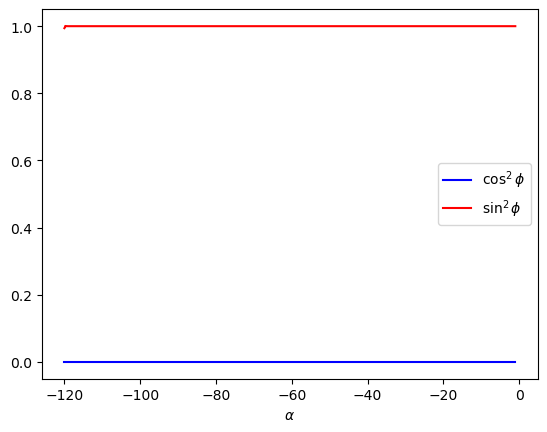

In [11]:
plt.plot(alpha_c, dust_c.cos2phi, color='blue', label=r'$\cos^{2}\phi$')
plt.plot(alpha_c, dust_c.sin2phi, color='red', label=r'$\sin^{2}\phi$')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

Note that, as expected, in the dust dominated phase, $\rho_{2} + p_{2} \gg \rho_{1} + p_{1} \implies \phi = \pi/2$, so that

  \begin{align}
    \cos^{2}\phi & \approx 0\, , \\
    \sin^{2}\phi & \approx 1\, ,  
  \end{align}

with very good precision.

We now plot the sound velocities for our dust dominated model.

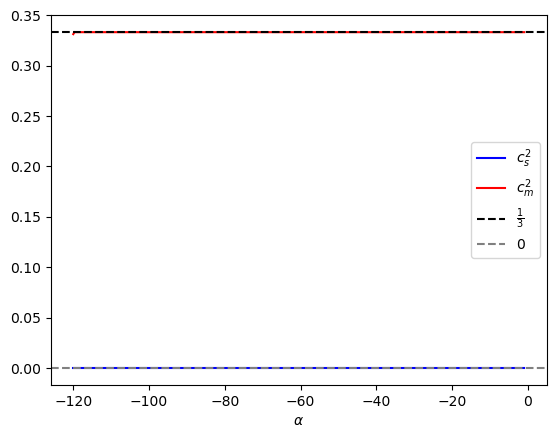

In [12]:
plt.plot(alpha_c, dust_c.cs2, color='blue', label=r'$c^{2}_{s}$')
plt.plot(alpha_c, dust_c.cm2, color='red', label=r'$c^{2}_{m}$')
plt.axhline(y=1/3, linestyle='--', color='black', label=r'$\frac{1}{3}$')
plt.axhline(y=0, linestyle='--', color='grey', label=r'$0$')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

As one can observe, since $\phi \approx 0$, we have

\begin{align}
  c^{2}_{s} & \approx w \ll 1 \, , \\
  c^{2}_{m} & \approx \frac{1}{3} , ,
\end{align}

which corroborates the consistency of our model.

### Mass Analysis

We now plot the masses $m_{s}, m_{\zeta}$, in a logarithmic scale, for their scales are way too different.

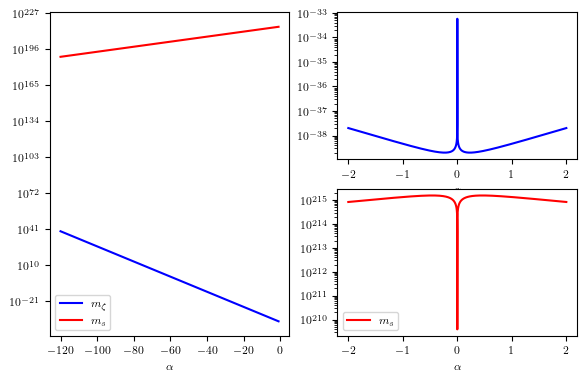

In [13]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, dust_c.mz, c='b', label=r'$m_\zeta$')    # plots mz
ax1.plot(alpha_c, dust_c.ms, c='r', label=r'$m_s$')        # plots ms
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, dust_b.mz, c='blue', label=r'$m_\zeta$')    # plots mz_b
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, dust_b.ms, c='red', label=r'$m_s$')        # plots ms_b
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

pass

From the above plots, one then sees that, in the testing single fluid dust case, the adiabatic mode's mass $m_{\zeta}$ decays exponentially, while the mass of the entropy mode $m_{s}$ grows exponentially. This essentially occurs due to the relations

\begin{align}
  m_{\zeta} & \propto a^{3}\, , \\
  m_{s} & \propto a^{-3}\, , \\
\end{align}

with $a$ being an always decreasing quantity in the bouncing phase. Not only that, but in the limit $\rho_{i} + p_{i} \rightarrow 0$, the mass of the entropy mode formalize diverges for any of the two fluids. This means that, in the single fluid case, the adiabatic mode dominates over the entropy mode, which is supermassive and has no relevant dynamics.

On the plots on the right side, one may also analyze the masses behavior near the bounce. They present a discontinuity due to the choice of lapse function

$$ N = \frac{ 1 }{ |H| } \, , $$

which is not continuous in the bounce $a \rightarrow a_{b} \implies H \rightarrow 0 \implies N \rightarrow +\infty $. Also, after the bounce the universe enters an expansion phase which, due to the masses dependency on the scale factor, means that their behavior is reversed after the bounce, with $m_{\zeta}$ increasing and $m_{S}$ decreasing.

We now proceed to plot the frequencies of the adiabatic and entropy modes, $\nu_{\zeta}, \nu_{s}$.

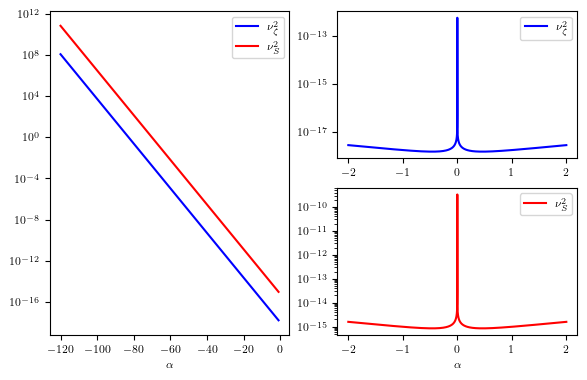

In [14]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, dust_c.nuz, c='b', label=r'$\nu^{2}_{\zeta}$')    # plots nuz
ax1.plot(alpha_c, dust_c.nus, c='r', label=r'$\nu^{2}_{S}$')        # plots nus
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, dust_b.nuz, c='b', label=r'$\nu^{2}_{\zeta}$')    # plots nuz_b
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
#ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, dust_b.nus, c='r', label=r'$\nu^{2}_{S}$')        # plots nus_b
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax2.legend()
ax3.legend()

One then sees that the frequencies $\nu_{s}, \nu_{\zeta}$ present very similar behavior, with both decreasing in time. This happens due to the fact that they differ only by the speeds of sound $c^{2}_{s}$, $c^{2}_{m}$ which are constant for the single fluid case, as we have just discussed. Furthermore, since they have a common time dependent factor $F_{k}(t)$ which is always decreasing. Said factor depends on the mode $k$, but such dependency is easy to analyze. Consider a quantity $q_{k} = qF_{k}(t)$ where $q$ is a constant. Then, in logarithmic scale:

\begin{align}
  q_{k} & = \frac{qk}{aH}\, \\
  \implies \ln q_{k} & = \ln q + \ln k + \ln(aH)\, ,
\end{align}

so that all time dependency is stored in $\ln(aH)$, which has linear behavior. The other contributions just translate the above graphs, as we observed in the above plot. Below, we also vary the mode number $k$ and plot the adiabatic and entropy frequencies for each case.

As a side note, one notices also a similar behavior near the bounce: a discontinuity is present due our choice of lapse function $N$, with both frequencies decreasing in time before the bounce, and start to increase right after the bounce. This guarantees that modes that are super-Hubble right before the bounce reenter the horizon in the future.

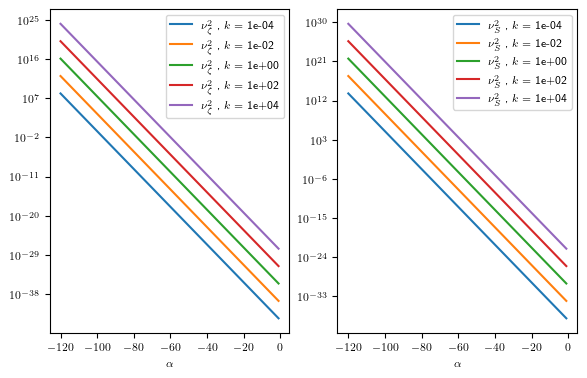

In [15]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  dust_k = model_evol(cosmo_dust,alpha_c,k)
  ax1.plot(alpha_c, dust_k.nuz ** 2, label=r'$\nu^{2}_\zeta$ , $k =$ '+f"{k:.0e}")    # plots nuz
  ax2.plot(alpha_c, dust_k.nus ** 2, label=r'$\nu^{2}_S$ , $k =$ '+f"{k:.0e}" )


ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

Let's now analyze the coupling $y$ compared to the masses time frequency squared $m_{z}\nu^{2}_{z}$, $m_{s}\nu^{2}_{s}$.

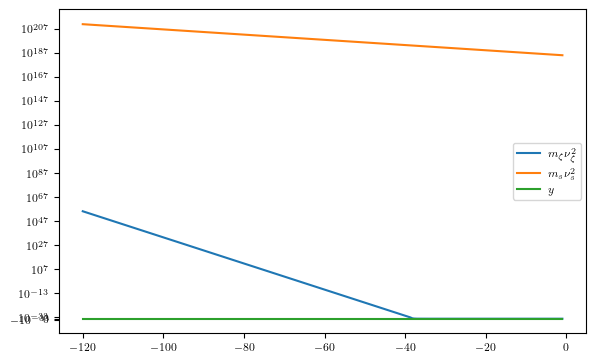

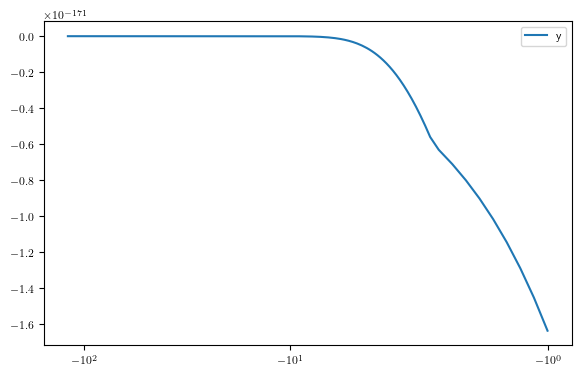

In [16]:
#plt.plot(alpha_c,rad_c.y,label='y')
plt.plot(alpha_c, dust_c.mnu2_z, label=r'$m_{\zeta}\nu^{2}_{\zeta}$')
plt.plot(alpha_c, dust_c.mnu2_s, label=r'$m_{s}\nu^{2}_{s}$')
plt.plot(alpha_c, dust_c.y, label=r'$y$')
plt.yscale('symlog', linthresh= 1e-33 )
plt.legend()
plt.show()

plt.plot(alpha_c,dust_c.y, label='y')
plt.xscale('symlog')
plt.legend()
plt.show()

Here, we see that $y$ is very small with respect to the mass-frequency squared $m_{\ell}\nu^{2}_{\ell}$. This happens due to the fact that the interaction is negligible in the single fluid case.

Now we shall analyze the eigenvalues $\nu_{1}, \nu_{2}$. As in the previous cases, the absolute scale makes it hard to compare results. We then plot it using a logarithmic scale to better visualize our results.

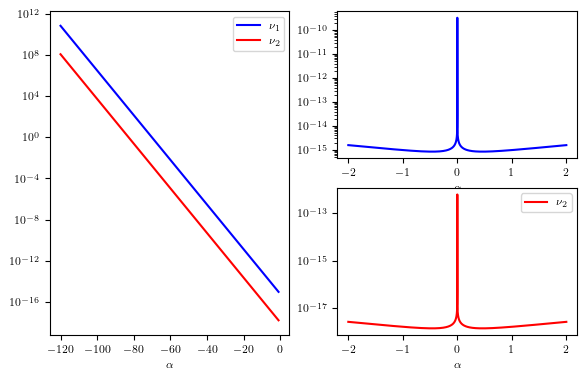

In [17]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, dust_c.nu1, c='b', label=r'$\nu_1$')    # plots nu1
ax1.plot(alpha_c, dust_c.nu2, c='r', label=r'$\nu_2$')        # plots nu2
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, dust_b.nu1, c='b', label=r'$\nu_1$')    # plots nuz1
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, dust_b.nu2, c='r', label=r'$\nu_2$')        # plots nus2
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

As in the previous case, the frequencies $\nu_{1}, \nu_{2}$ present very similar behavior, decreasing exponentially. This happens because they also differ only on the time dependent factor $F_{k}(t)$, with $\nu_{i} = c_{i}F_{k}(t)$. In particular, since $c_{2} \ll c_{1} \implies \nu_{2} \ll \nu_{1} $. Also, they decrease in the contraction phase and increase in the expanion one, right after the bounce. This amounts to a similar interpretation, but for the modes of the diagonalizing variables $Q_{1}, Q_{2}$, which become super-Hubble in the contraction phase and reenter the horizon in the future. In this case however, a bit of care is in order, since the effective frequency $\bar{\nu}^{2}_{i} \neq \nu^{2}_{i}$ for the diagonalizing variables.

We now illustrate their behavior by varying the mode number $k$.

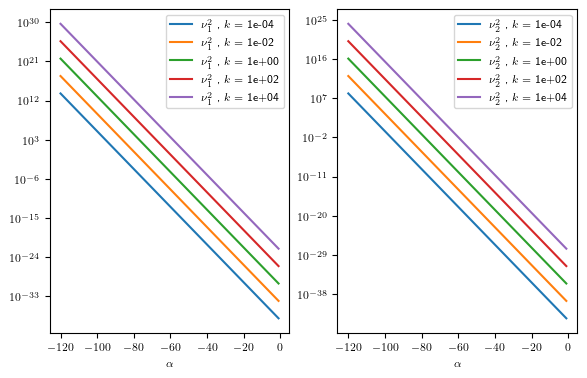

In [18]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  dust_k = model_evol(cosmo_dust,alpha_c,k)
  ax1.plot(alpha_c, dust_k.nu1 ** 2, label=r'$\nu^{2}_1$ , $ k = $ '+f"{k:.0e}")    # plots nuz
  ax2.plot(alpha_c, dust_k.nu2 ** 2, label=r'$\nu^{2}_2$ , $ k = $ '+f"{k:.0e}" )


ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

As one can observe, varying the mode number $k$ just translates the above graphs. Also, $\nu_{2} \ll \nu_{1}$ consistently for all cases.

### Effective Couplings



We now study the behavior of the effective Hubble radius $R_{H\ell}$ and couplings $\aleph_{\ell}, \beth_{\ell}$ compared to the frequencies $\nu^{2}_{\ell}$ of the adiabatic and entropy modes. We only plot the absolute values of each contribution.

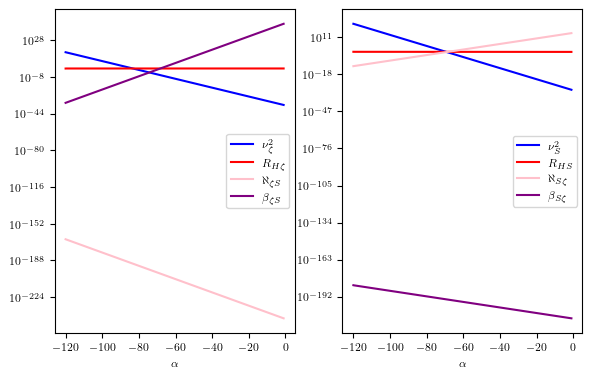

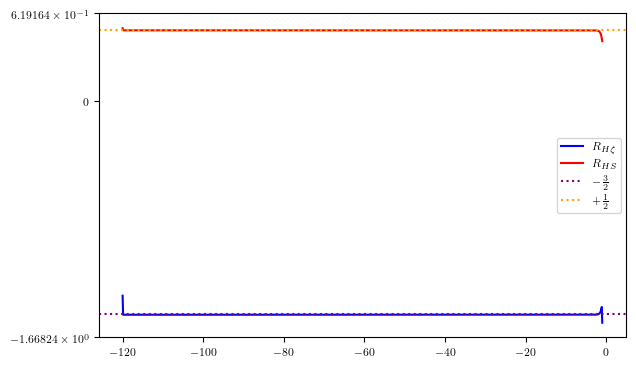

In [19]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot( alpha_c, dust_c.nuz ** 2, color='blue', label=r'$\nu^{2}_{\zeta}$')
ax1.plot( alpha_c, np.abs(dust_c.Rh_z), color='red', label=r'$R_{H\zeta}$')
ax1.plot( alpha_c, np.abs(dust_c.aleph_zs), color='pink', label=r'$\aleph_{\zeta S}$')
ax1.plot( alpha_c, np.abs(dust_c.beth_zs), color='purple', label=r'$\beta_{\zeta S}$')

ax2.plot( alpha_c, dust_c.nus ** 2, color='blue', label=r'$\nu^{2}_{S}$')
ax2.plot( alpha_c, dust_c.Rh_s, color='red', label=r'$R_{H S}$')
ax2.plot( alpha_c, np.abs(dust_c.aleph_sz), color='pink', label=r'$\aleph_{S\zeta}$')
ax2.plot( alpha_c, np.abs(dust_c.beth_sz), color='purple', label=r'$\beta_{S\zeta}$')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

plt.plot( alpha_c, dust_c.Rh_z, color='blue', label=r'$R_{H\zeta}$')
plt.plot( alpha_c, dust_c.Rh_s, color='red', label=r'$R_{H S}$')
plt.axhline( y = -3/2, color = 'purple', linestyle=':', label= r'$-\frac{3}{2}$' )
plt.axhline( y = 1/2, color = 'orange', linestyle=':', label= r'$+\frac{1}{2}$' )
plt.yscale('symlog')
plt.legend()
plt.show()

Now, note that, due to the discussed spectral behavior, the Hubble radiuses will be mode independent, while the frequencies will not. Therefore, each mode will cross the Hubble horizon at different times, as illustrated below. The Hubble Radiuses are plotted in black in the first two figures. In the last graph, one sees that the two effective Hubble Radiuses have very similar behavior, but with reverse sign. This happens due

\begin{align}
 m_{\zeta} \propto a^{3} & \implies \dot{m}_{\zeta} < 0 \implies R_{H\zeta} < 0, |Y| \ll 1\, , \\
 m_{S} \propto a^{-3} & \implies \dot{m}_{S} > 0\implies R_{H S} > 0, |Y| \ll 1\, .\\
\end{align}

In particular, one also sees that their behavior is well aproximated by the single fluid Hubble Radiuses, as expected. In the dust dominated case, we have:

\begin{align}
 R_{H\zeta} = -\frac{3}{2}(1-w), \, \, & w \approx 0 \, \, \implies R_{H\zeta} \approx -\frac{3}{2} \, ; \\
 R_{H S} = -1 + \frac{3}{2}(1+3w), \, \, & w \approx 0 \, \, \implies R_{H\zeta} \approx +\frac{1}{2} \, ; \\
\end{align}

which both agree to great precision with the plots, reinforcing the consistency of our model.

One also notices a reversed behavior for the couples, that is:

\begin{align}
  \text{ i) Early Past: } \, \, & \aleph_{\zeta S} < \beth_{\zeta S} < \nu^{2}_{\zeta} \, \, , \, \,  \beth_{S \zeta} < \aleph_{S \zeta} < \nu^{2}_{S}\, , \\
  \text{ ii) Late Future: } \, \, & \aleph_{\zeta S} < \nu^{2}_{\zeta} < \beth_{\zeta S} \, \, , \, \,  \beth_{S \zeta} < \nu^{2}_{S} < \aleph_{S \zeta} \, .  
\end{align}

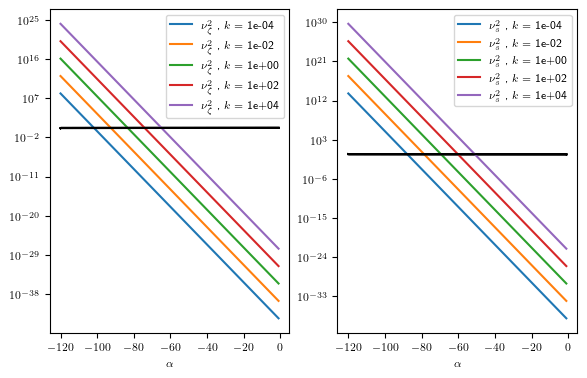

In [20]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  dust_k = model_evol(cosmo_dust,alpha_c,k)
  ax1.plot(alpha_c, dust_k.nuz ** 2, label=r'$\nu^{2}_\zeta$ , $ k = $ '+f"{k:.0e}")    # plots nuz
  ax1.plot(alpha_c, np.abs(dust_k.Rh_z), color='black')

  ax2.plot(alpha_c, dust_k.nus ** 2, label=r'$\nu^{2}_s$ , $ k = $ '+f"{k:.0e}" )
  ax2.plot(alpha_c, dust_k.Rh_s, color='black')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

And, similarly for $\beth_{\ell}$, which is mode independent (again ploted in black):

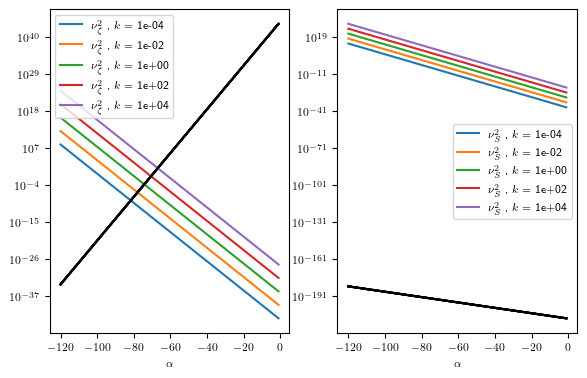

In [21]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  dust_k = model_evol(cosmo_dust,alpha_c,k)
  ax1.plot(alpha_c, dust_k.nuz ** 2, label=r'$\nu^{2}_{\zeta}$ , $ k = $ '+f"{k:.0e}")    # plots nuz
  ax1.plot(alpha_c, np.abs(dust_k.beth_zs), color='black')

  ax2.plot(alpha_c, dust_k.nus ** 2, label=r'$\nu^{2}_{S}$ , $ k = $ '+f"{k:.0e}" )
  ax2.plot(alpha_c, np.abs(dust_k.beth_sz), color='black')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

Here, one notices the non-trivial fact that the $\beth_{\zeta S}$ coupling is always increasing, while the $\beth_{S\zeta}$ is always decreasing. This occurs because the mass of the entropy mode is always increasing, so that it "feels less" the adiabatic mode, which is greatly affected by the interaction term that dominates the time evolution in the future. Note that this happens even for $|Y| \ll m_{\zeta}\nu_{\zeta}^{2},m_{S}\nu^{2}_{S}$ as we had just analyzed. This occurs due to the fact that $Y$ couples non-trivially in the equations of motion in association to the frequencies and masses.

Also, one notices that, for the interval $ k \in (10^{-4}, 10^{4}) $ the $\beth_{S\zeta}$ is practically negligible, with its effect becoming weaker and weaker, while $\beth_{\zeta S}$ starts negligible, but dominates the late evolution.

Finally, the relation to the frequencies $\nu^{2}_{\ell}$ and the $\aleph_{\ell}$ coupling amounts to a translation when we consider different modes:

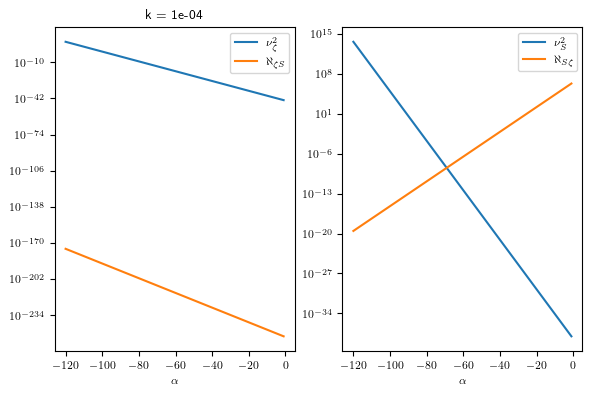

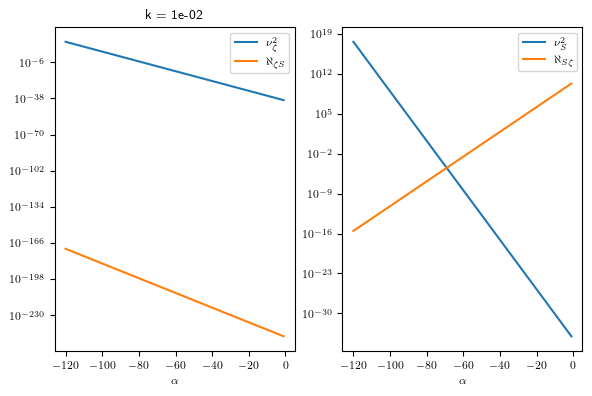

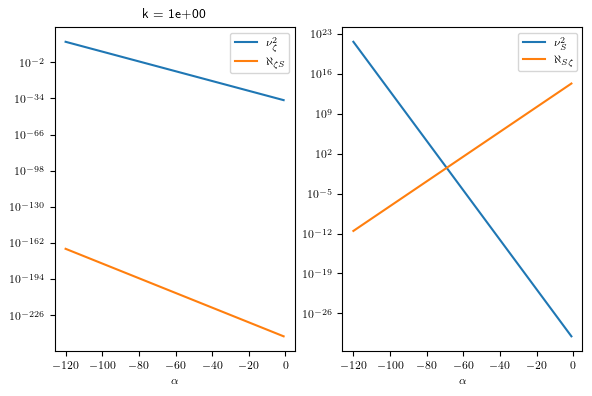

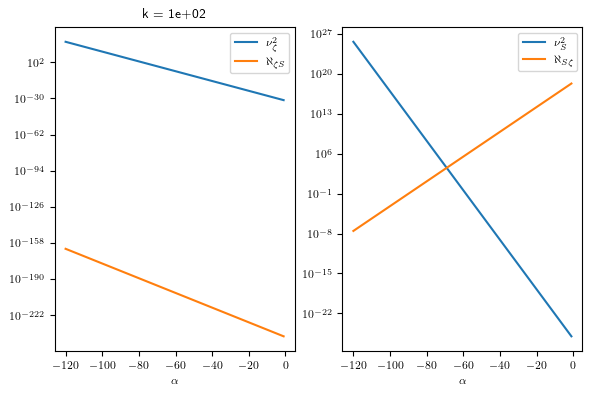

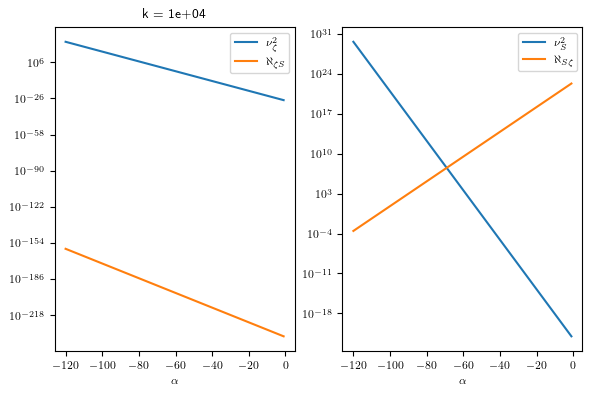

In [22]:
for k in k_list:
  set_rc_params_article(ncol=2)                             # sets the column number of the figure
  fig = plt.figure()
  dust_k = model_evol(cosmo_dust,alpha_c,k)

  ax1= fig.add_subplot(1,2,1)
  ax2= fig.add_subplot(1,2,2)
  ax1.plot(alpha_c, dust_k.nuz ** 2, label=r'$\nu^{2}_{\zeta}$')    # plots nuz
  ax1.plot(alpha_c, np.abs(dust_k.aleph_zs), label=r'$\aleph_{\zeta S}$')

  ax2.plot(alpha_c, dust_k.nus ** 2, label=r'$\nu^{2}_{S}$'  )
  ax2.plot(alpha_c, np.abs(dust_k.aleph_sz), label=r'$\aleph_{S\zeta}$')

  ax1.set_yscale('log')
  ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

  ax2.set_yscale('log')
  ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

  ax1.set_title('k = '+f"{k:.0e}")
  ax1.legend()
  ax2.legend()
  plt.show()

Here, one notices the consistent result that $ \aleph_{\zeta S} \ll \nu^{2}_{\zeta} $ for all times, while $\nu^{2}_{S}$ dominates the early evolution but is surpassed by $\aleph_{S \zeta}$ in the late future.

### Coupling Matrices

We now turn to explore the behavior of the coupling matrices $\gamma_{ij}, \tau_{ij}$. Recall that the Hamiltonian of our diagonalizing variables $\{ Q_{1}, Q_{2}, \Pi_{1}, \Pi_{2} \}$ is given by

\begin{equation}
  {\cal H} = \sum_{i=1}^{2}\left[  \frac{1}{2} \nu_{i}(P^{i})^{2} + \frac{1}{2}\nu_{i}(Q^{i})^{2}  \right] + \frac{1}{2}\sum_{i,j = 1}^{2}\left(  P^{i}\tau^{ij} - Q^{i}\gamma^{ij} \right)Q^{j}\, ,
\end{equation}

the associated equations of motion are then given by:

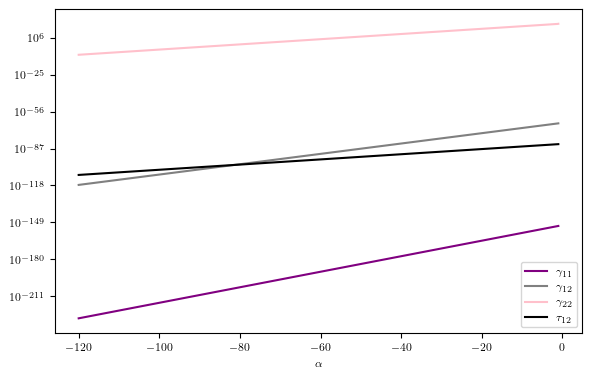

In [23]:
plt.plot(alpha_c, dust_c.gamma11, color='purple', label=r'$\gamma_{11}$')   # plot
plt.plot(alpha_c, dust_c.gamma12, color='grey', label=r'$\gamma_{12}$')   # plot
plt.plot(alpha_c, dust_c.gamma22, color='pink', label=r'$\gamma_{22}$')   # plot
plt.plot(alpha_c, dust_c.tau12, color='black', label=r'$\tau_{12}$')
plt.yscale('log')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In the above plot, one notices the relation

\begin{align}
   \text{ i) Early Past:} \, \, & \gamma_{11} < \gamma_{12} < \gamma_{22} \, , \\
   \text{ ii) Late Future:} \, \, & \gamma_{12} < \gamma_{11} < \gamma_{22} \, ,
\end{align}

which, is **mode independent**, since $\gamma_{ij} \sim k^{-2}$. The coordinate-momentum coupling $\tau_{ij} \sim k^{0} $ however, is mode independent. Therefore, one may estimate a critical $k$ value, $k_{\text{crit}}$, for which the $\tau_{ij}$ coupling is the dominant contribution in the late past. This shall be reproduced in the complete model during dust domination. We shall delay this idea until the complete 2 fluid model.

We now plot each component individually, to offer a different visualization.

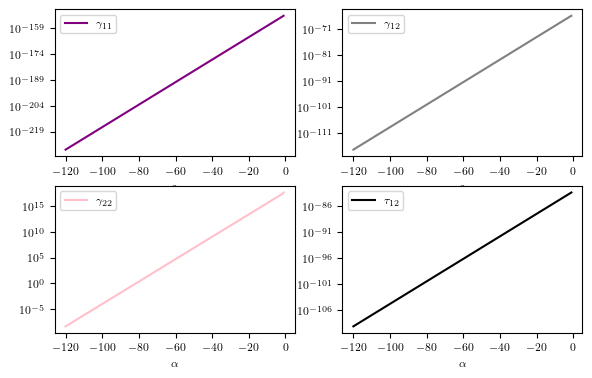

In [24]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, dust_c.gamma11, color='purple', label=r'$\gamma_{11}$')   # plot
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
#x1.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax1.set_yscale('log')

ax2.plot(alpha_c, dust_c.gamma12, color='grey', label=r'$\gamma_{12}$')   # plot
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')

ax3.plot(alpha_c, dust_c.gamma22, color='pink', label=r'$\gamma_{22}$')   # plot
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')

ax4.plot(alpha_c, dust_c.tau12, color='black', label=r'$\tau_{12}$')   # plot
ax4.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax4.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax4.set_yscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In the below cell we plot the behavior of the coupling matrices near the bounce. As previously discussed, they present discontinuities, which are associated to our choice of time in terms of the scale factor:

$$ \alpha(a) = \ln\left(\frac{a_{b}}{a}\right) $$

which implies that

$$ \epsilon = \frac{1}{NH} $$

is discontinuous near the bounce.

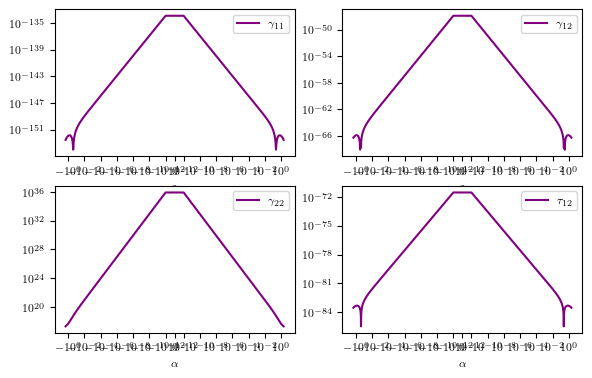

In [25]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_b, dust_b.gamma11, color='purple', label=r'$\gamma_{11}$')   # plot
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
ax1.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax1.set_yscale('log')


ax2.plot(alpha_b, np.abs(dust_b.gamma12), color='purple', label=r'$\gamma_{12}$')   # plot
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')

ax3.plot(alpha_b, dust_b.gamma22, color='purple', label=r'$\gamma_{22}$')   # plot
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')

ax4.plot(alpha_b, np.abs(dust_b.tau12), color='purple', label=r'$\tau_{12}$')   # plot
ax4.set_xlabel(r'$\alpha$')                                # sets the x legend
ax4.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax4.set_yscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

## ii) Radiation Domination $\Omega_{d} \approx 0$ case

We start by setting the parameters of our cosmological model.

In [26]:
cosmo_rad = Nc.HICosmoQGRW()                                    # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

k = 1.0
# these lines set the relevant cosmological parameters
cosmo_rad.props.w = 1.0e-6                                      # dust/dark matter equation of state
cosmo_rad.props.Omegar = 1.0                                    # radiation abundance today, set to 1
cosmo_rad.props.Omegaw = 1.0e-200                                # dust/dark matter abundance today, set to 0
cosmo_rad.props.xb = 1.0e30                                     # inverse scale factor x=1/a at the time of the bounce

In [27]:
rad_c = model_evol(cosmo_rad,alpha_c,k)      # evolves the equations of motion for during the contraction phase
rad_b = model_evol(cosmo_rad,alpha_b,k)      # evolves the equations of motion close to the bounce

# the result is a list of classes for each time alpha. Such classes then have attributes from which the relevant quantities can be direclty extracted
print(rad_c.gamma11[0])                               # prints the gamma11 result for the first value of alpha
print(rad_c.gamma12[0])                               # prints the gamma12 result for the first value of alpha

-2.948920227617414e-38
-1.1300831091068565e-34


We now extract the relevant quantities by applying the above defined functions.

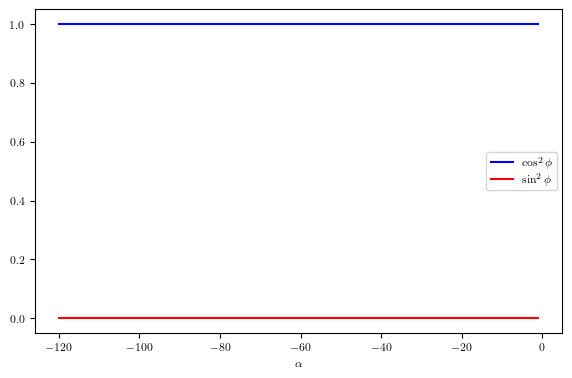

In [28]:
plt.plot(alpha_c, rad_c.cos2phi, color='blue', label=r'$\cos^{2}\phi$')
plt.plot(alpha_c, rad_c.sin2phi, color='red', label=r'$\sin^{2}\phi$')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

Note that, as expected, in the radiation dominated phase, $\rho_{1} + p_{1} \gg \rho_{2} + p_{2} \implies \phi =0$, so that

  \begin{align}
    \cos^{2}\phi & \approx 1\, , \\
    \sin^{2}\phi & \approx 0\, ,  
  \end{align}

with very good precision.

We now plot the sound velocities for our radiation dominated model.

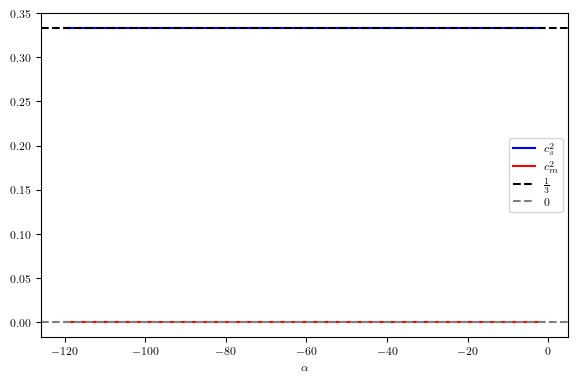

<NumCosmo.HIPertITwoFluidsEOM object at 0x7f1c7266fe90 (NcHIPertITwoFluidsEOM at 0x55b22165fc20)>

In [29]:
plt.plot(alpha_c, rad_c.cs2, color='blue', label=r'$c^{2}_{s}$')
plt.plot(alpha_c, rad_c.cm2, color='red', label=r'$c^{2}_{m}$')
plt.axhline(y=1/3, linestyle='--', color='black', label=r'$\frac{1}{3}$')
plt.axhline(y=0, linestyle='--', color='grey', label=r'$0$')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

cosmo.eom_eval(-120,1.0)

As one can observe, since $\phi \approx 0$, we have

\begin{align}
  c^{2}_{s} & \approx \frac{1}{3}\, , \\
  c^{2}_{m} & \approx w \ll 1\, ,
\end{align}

which corroborates the consistency of our model.

#### Mass Analysis

We now plot the masses $m_{s}, m_{\zeta}$, in a logarithmic scale, for their scales are way too different.

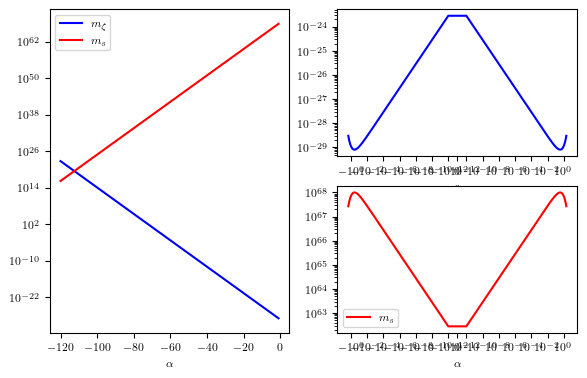

In [30]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, rad_c.mz, c='b', label=r'$m_\zeta$')    # plots mz
ax1.plot(alpha_c, rad_c.ms, c='r', label=r'$m_s$')        # plots ms
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, rad_b.mz, c='blue', label=r'$m_\zeta$')    # plots mz_b
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, rad_b.ms, c='red', label=r'$m_s$')        # plots ms_b
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

pass

From the above plots, one then sees that, in the testing single fluid dust case, the adiabatic mode's mass $m_{\zeta}$ decays exponentially, while the mass of the entropy mode $m_{s}$ grows exponentially. This essentially occurs due to the relations

\begin{align}
  m_{\zeta} & \propto a^{3}\, , \\
  m_{s} & \propto a^{-3}\, , \\
\end{align}

with $a$ being an always decreasing quantity in the bouncing phase. Not only that, but in the limit $\rho_{i} + p_{i} \rightarrow 0$, the mass of the entropy mode formalize diverges for any of the two fluids. This means that, in the single fluid case, the adiabatic mode dominates over the entropy mode, which is supermassive and has no relevant dynamics.

We now proceed to plot the frequencies of the adiabatic and entropy modes, $\nu_{\zeta}, \nu_{s}$.

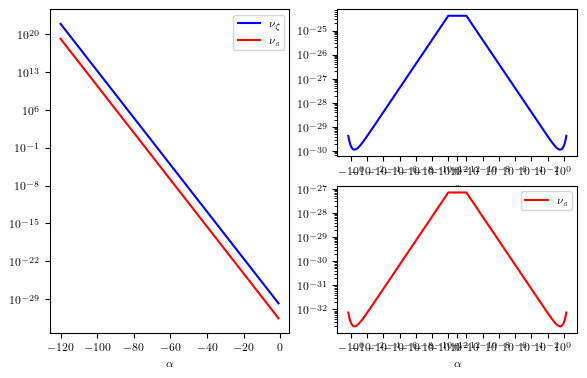

In [31]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, rad_c.nuz, c='b', label=r'$\nu_\zeta$')    # plots nuz
ax1.plot(alpha_c, rad_c.nus, c='r', label=r'$\nu_s$')        # plots nus
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, rad_b.nuz, c='b', label=r'$\nu_\zeta$')    # plots nuz_b
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, rad_b.nus, c='r', label=r'$\nu_s$')        # plots nus_b
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

One then sees that the frequencies $\nu_{s}, \nu_{\zeta}$ present very similar behavior, with both decreasing in time. This happens due to the fact that they differ only by the speeds of sound $c^{2}_{s}$, $c^{2}_{m}$ which are constant for the single fluid case, as we have just discussed. Furthermore, since they have a common time dependent factor $F_{k}(t)$ which is always decreasing. Said factor depends on the mode $k$, but such dependency is easy to analyze. Consider a quantity $q_{k} = qF_{k}(t)$ where $q$ is a constant. Then, in logarithmic scale:

\begin{align}
  q_{k} & = \frac{qk}{aH}\, \\
  \implies \ln q_{k} & = \ln q + \ln k + \ln(aH)\, ,
\end{align}

so that all time dependency is stored in $\ln(aH)$, which has linear behavior. The other contributions just translate the above graphs, as we observed in the above plot. Below, we also vary the mode number $k$ and plot the adiabatic and entropy frequencies for each case.

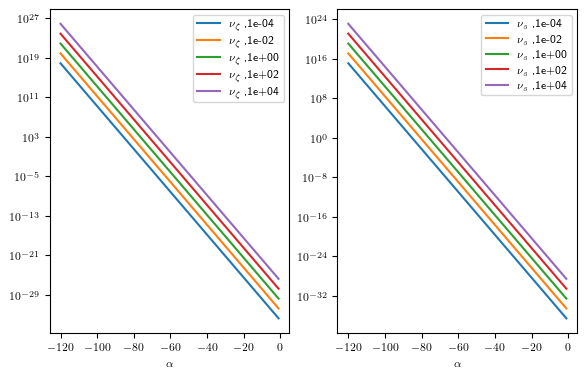

In [32]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  rad_k = model_evol(cosmo_rad,alpha_c,k)
  ax1.plot(alpha_c, rad_k.nuz, label=r'$\nu_\zeta$ ,'+f"{k:.0e}")    # plots nuz
  ax2.plot(alpha_c, rad_k.nus, label=r'$\nu_s$ ,'+f"{k:.0e}" )


ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

Let's now analyze the coupling $y$ compared to the masses $m_{z}\nu^{2}_{z}$, $m_{s}\nu^{2}_{s}$.

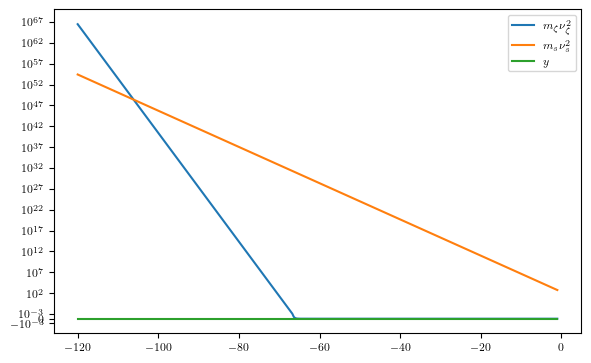

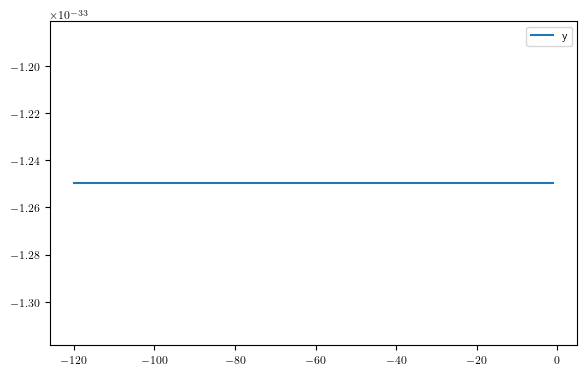

In [33]:
#plt.plot(alpha_c,rad_c.y,label='y')
plt.plot(alpha_c, rad_c.mnu2_z, label=r'$m_{\zeta}\nu^{2}_{\zeta}$')
plt.plot(alpha_c, rad_c.mnu2_s, label=r'$m_{s}\nu^{2}_{s}$')
plt.plot(alpha_c, rad_c.y, label=r'$y$')
plt.yscale('symlog', linthresh= 1e-3 )
plt.legend()
plt.show()

plt.plot(alpha_c,rad_c.y, label='y')
plt.legend()
plt.show()

Here, we see that $y$ amounts to a very small constant. This happens due to the fact that the interaction is negligible in the single fluid case.

Now we shall analyze the eigenvalues $\nu_{1}, \nu_{2}$. As in the previous cases, the absolute scale makes it hard to compare results. We then plot it using a logarithmic scale to better visualize our results.

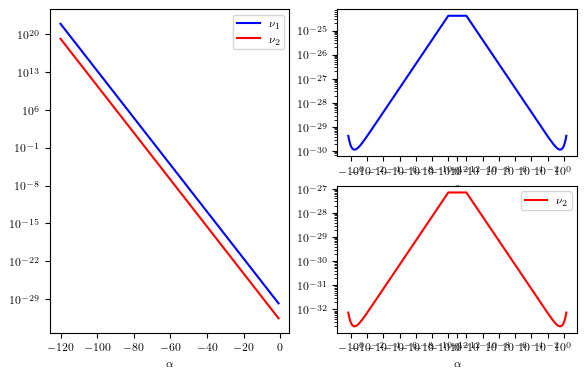

In [34]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, rad_c.nu1, c='b', label=r'$\nu_1$')    # plots nu1
ax1.plot(alpha_c, rad_c.nu2, c='r', label=r'$\nu_2$')        # plots nu2
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, rad_b.nu1, c='b', label=r'$\nu_1$')    # plots nuz1
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, rad_b.nu2, c='r', label=r'$\nu_2$')        # plots nus2
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

As in the previous case, the frequencies $\nu_{1}, \nu_{2}$ present very similar behavior, decreasing exponentially. This happens because they also differ only on the time dependent factor $F_{k}(t)$, with $\nu_{i} = c_{i}F_{k}(t)$. In particular, since $c_{2} \ll c_{1} \implies \nu_{2} \ll \nu_{1} $.

We now illustrate their behavior by varying the mode number $k$.

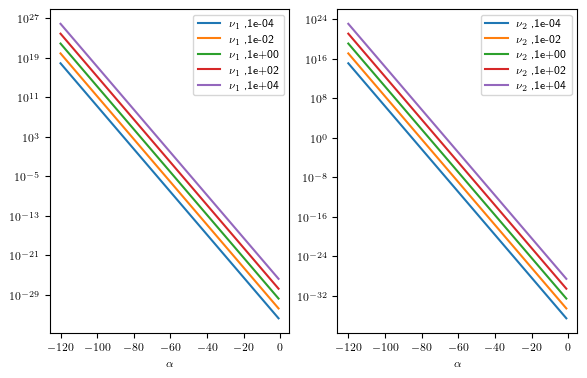

In [35]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  rad_k = model_evol(cosmo_rad,alpha_c,k)
  ax1.plot(alpha_c, rad_k.nu1, label=r'$\nu_1$ ,'+f"{k:.0e}")    # plots nuz
  ax2.plot(alpha_c, rad_k.nu2, label=r'$\nu_2$ ,'+f"{k:.0e}" )


ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

As one can observe, varying the mode number $k$ just translates the above graphs. Also, $\nu_{2} \ll \nu_{1}$ consistently for all cases.

#### Effective Couplings



We now study the behavior of the effective Hubble radius $R_{H\ell}$ and couplings $\aleph_{\ell}, \beth_{\ell}$ compared to the frequencies $\nu^{2}_{\ell}$ of the adiabatic and entropy modes.

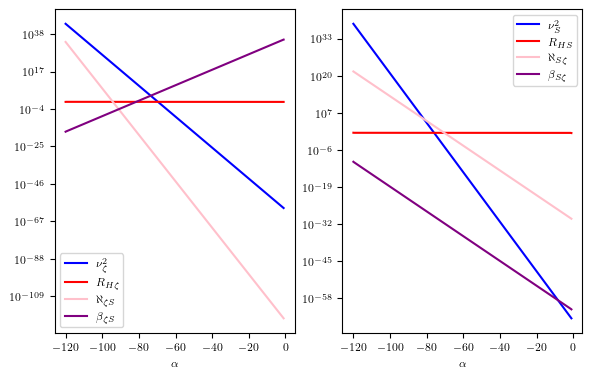

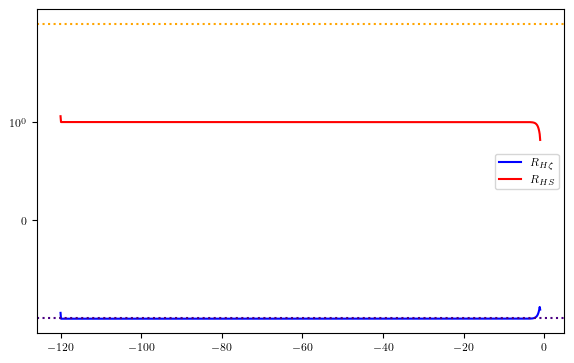

In [36]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot( alpha_c, rad_c.nuz ** 2, color='blue', label=r'$\nu^{2}_{\zeta}$')
ax1.plot( alpha_c, np.abs(rad_c.Rh_z), color='red', label=r'$R_{H\zeta}$')
ax1.plot( alpha_c, np.abs(rad_c.aleph_zs), color='pink', label=r'$\aleph_{\zeta S}$')
ax1.plot( alpha_c, np.abs(rad_c.beth_zs), color='purple', label=r'$\beta_{\zeta S}$')

ax2.plot( alpha_c, rad_c.nus ** 2, color='blue', label=r'$\nu^{2}_{S}$')
ax2.plot( alpha_c, rad_c.Rh_s, color='red', label=r'$R_{H S}$')
ax2.plot( alpha_c, np.abs(rad_c.aleph_sz), color='pink', label=r'$\aleph_{S\zeta}$')
ax2.plot( alpha_c, np.abs(rad_c.beth_sz), color='purple', label=r'$\beta_{S\zeta}$')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

plt.plot( alpha_c, rad_c.Rh_z, color='blue', label=r'$R_{H\zeta}$')
plt.plot( alpha_c, rad_c.Rh_s, color='red', label=r'$R_{H S}$')
plt.axhline( y = -1, linestyle=':', color='indigo')
plt.axhline( y = 2, linestyle=':', color='orange')
plt.yscale('symlog')
plt.legend()
plt.show()

Now, note that, due to the discussed spectral behavior, the Hubble radiuses will be mode independent, while the frequencies will not. Therefore, each mode will cross the Hubble horizon at different times, as illustrated below. The Hubble Radiuses are plotted in black in the first two figures. In the last graph, one sees that the two effective Hubble Radiuses have very similar behavior, but with reverse sign. This happens due

\begin{align}
 m_{\zeta} \propto a^{3} & \implies \dot{m}_{\zeta} < 0 \implies R_{H\zeta} < 0, |Y| \ll 1\, \\
 m_{S} \propto a^{-3} & \implies \dot{m}_{S} > 0\implies R_{H S} > 0, |Y| \ll 1\, \\
\end{align}

One also sees that their behavior is well aproximated by the single fluid Hubble Radiuses, as expected. In the dust dominated case, we have:

\begin{align}
 R_{H\zeta} = -\frac{3}{2}(1-w), \, \, & w = \frac{1}{3} \, \, \implies R_{H\zeta} = -1 \, ; \\
 R_{H S} = -1 + \frac{3}{2}(1+3w), \, \, & w = \frac{1}{3}  \, \, \implies R_{H\zeta} = +2  \, ; \\
\end{align}

which both agree to great precision with the plots, reinforcing the consistency of our model.

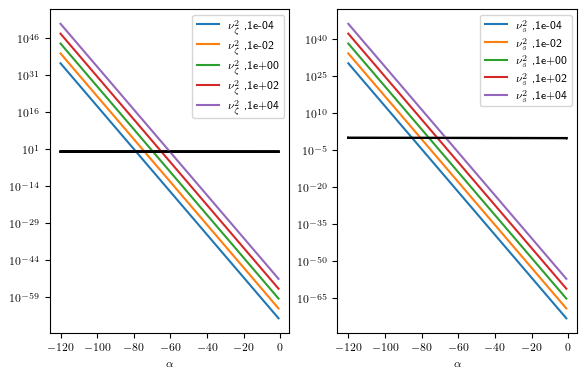

In [37]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  rad_k = model_evol(cosmo_rad,alpha_c,k)
  ax1.plot(alpha_c, rad_k.nuz ** 2, label=r'$\nu^{2}_\zeta$ ,'+f"{k:.0e}")    # plots nuz
  ax1.plot(alpha_c, np.abs(rad_k.Rh_z), color='black')

  ax2.plot(alpha_c, rad_k.nus ** 2, label=r'$\nu^{2}_s$ ,'+f"{k:.0e}" )
  ax2.plot(alpha_c, rad_k.Rh_s, color='black')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

And, similarly for $\beth_{\ell}$, which is mode independent (again ploted in black):

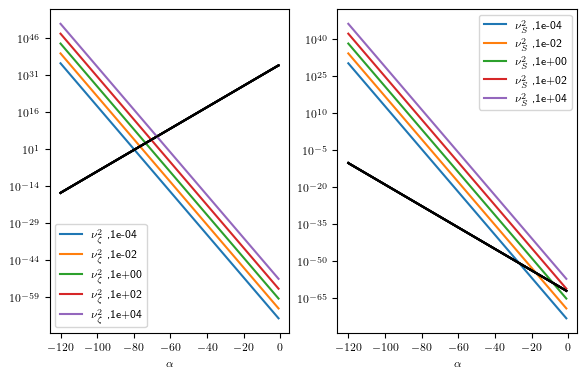

In [38]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  rad_k = model_evol(cosmo_rad,alpha_c,k)
  ax1.plot(alpha_c, rad_k.nuz ** 2, label=r'$\nu^{2}_{\zeta}$ ,'+f"{k:.0e}")    # plots nuz
  ax1.plot(alpha_c, np.abs(rad_k.beth_zs), color='black')

  ax2.plot(alpha_c, rad_k.nus ** 2, label=r'$\nu^{2}_{S}$ ,'+f"{k:.0e}" )
  ax2.plot(alpha_c, np.abs(rad_k.beth_sz), color='black')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

Here, one notices the non-trivial fact that the $\beth_{\zeta S}$ coupling is always increasing, while the $\beth_{S\zeta}$ is always decreasing. This occurs because the mass of the entropy mode is always increasing, so that it "feels less" the adiabatic mode, which is greatly affected by the interaction term that dominates the time evolution in the future. Note that this happens even for $|y| \ll m_{\zeta}\nu_{\zeta}^{2},m_{S}\nu^{2}_{S}$ as we had just analyzed. This occurs due to the fact that $y$ couples non-trivially in the equations of motion in association to the frequencies and masses.

Finally, the relation to the frequencies $\nu^{2}_{\ell}$ and the $\aleph_{\ell}$ coupling amounts to a translation when we consider different modes:

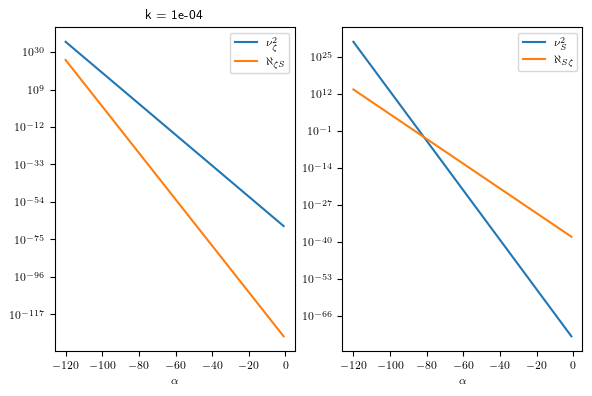

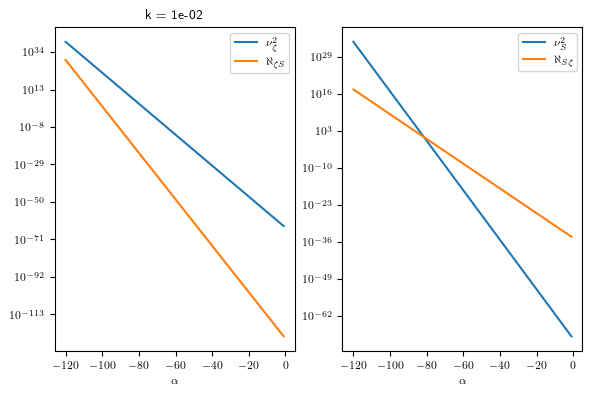

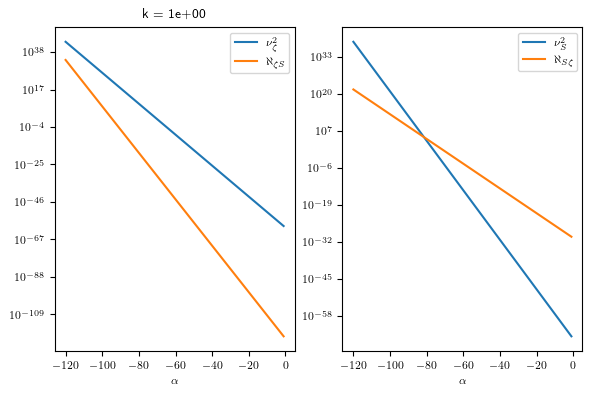

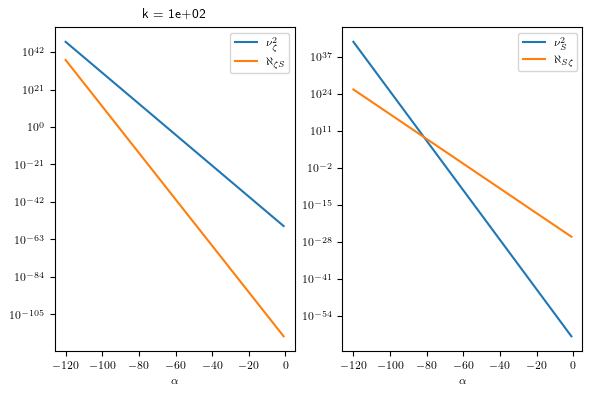

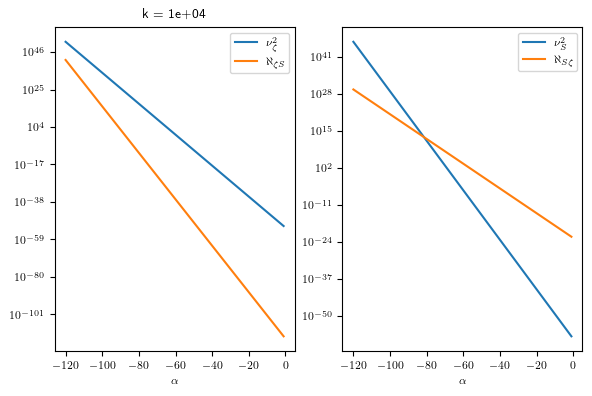

In [39]:
for k in k_list:
  set_rc_params_article(ncol=2)                             # sets the column number of the figure
  fig = plt.figure()
  rad_k = model_evol(cosmo_rad,alpha_c,k)

  ax1= fig.add_subplot(1,2,1)
  ax2= fig.add_subplot(1,2,2)
  ax1.plot(alpha_c, rad_k.nuz ** 2, label=r'$\nu^{2}_{\zeta}$')    # plots nuz
  ax1.plot(alpha_c, np.abs(rad_k.aleph_zs), label=r'$\aleph_{\zeta S}$')

  ax2.plot(alpha_c, rad_k.nus ** 2, label=r'$\nu^{2}_{S}$'  )
  ax2.plot(alpha_c, np.abs(rad_k.aleph_sz), label=r'$\aleph_{S\zeta}$')

  ax1.set_yscale('log')
  ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

  ax2.set_yscale('log')
  ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

  ax1.set_title('k = '+f"{k:.0e}")
  ax1.legend()
  ax2.legend()
  plt.show()

#### Coupling Matrices

We now turn to explore the behavior of the coupling matrices $\gamma_{ij}, \tau_{ij}$. Recall that the Hamiltonian of our diagonalizing variables $\{ Q_{1}, Q_{2}, \Pi_{1}, \Pi_{2} \}$ is given by

\begin{equation}
  {\cal H} = \sum_{i=1}^{2}\left[  \frac{1}{2} \nu_{i}(P^{i})^{2} + \frac{1}{2}\nu_{i}(Q^{i})^{2}  \right] + \frac{1}{2}\sum_{i,j = 1}^{2}\left(  P^{i}\tau^{ij} - Q^{i}\gamma^{ij} \right)Q^{j}\, ,
\end{equation}

the associated equations of motion are then given by:

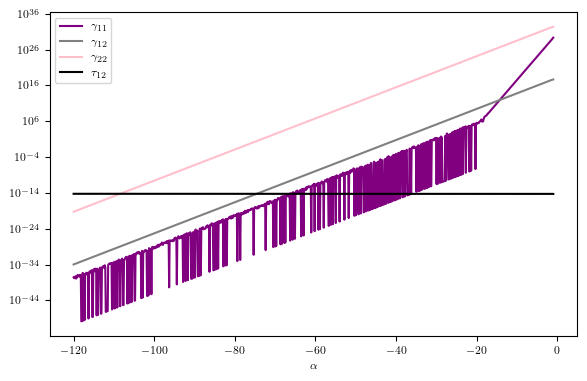

In [40]:
plt.plot(alpha_c, np.abs(rad_c.gamma11), color='purple', label=r'$\gamma_{11}$')   # plot
plt.plot(alpha_c, np.abs(rad_c.gamma12), color='grey', label=r'$\gamma_{12}$')   # plot
plt.plot(alpha_c, rad_c.gamma22, color='pink', label=r'$\gamma_{22}$')   # plot
plt.plot(alpha_c, rad_c.tau12, color='black', label=r'$\tau_{12}$')
plt.yscale('log')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In the above plot, one notices the relation

\begin{align}
   \text{ i) Early Past:} \, \, & \gamma_{11} < \gamma_{12} < \gamma_{22} \, , \\
   \text{ ii) Late Future:} \, \, & \gamma_{12} < \gamma_{11} < \gamma_{22} \, ,
\end{align}

which, is **mode independent**, since $\gamma_{ij} \sim k^{-2}$. The coordinate-momentum coupling $\tau_{ij} \sim $ however, is mode independent. Therefore, one may estimate a critical $k$ value, $k_{\text{crit}}$, for which the $\tau_{ij}$ coupling is the dominant contribution in the late past. This shall be reproduced in the complete model during dust domination. We shall delay this idea until the complete 2 fluid model. One also notices catasthropic oscillations for $\gamma_{11}$, which are probably associated to the fiducial single fluid behavior.

We now plot each component individually, to offer a different visualization.

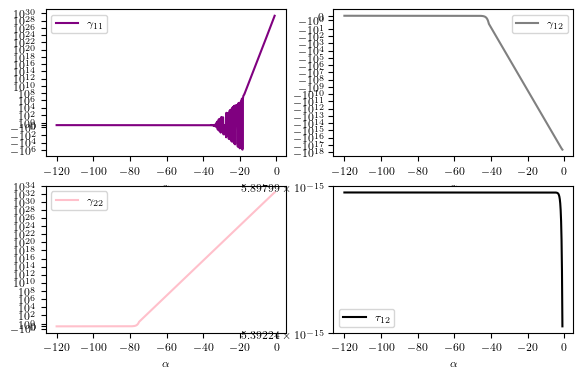

In [41]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, rad_c.gamma11, color='purple', label=r'$\gamma_{11}$')   # plot
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
#x1.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax1.set_yscale('symlog')

ax2.plot(alpha_c, rad_c.gamma12, color='grey', label=r'$\gamma_{12}$')   # plot
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('symlog')

ax3.plot(alpha_c, rad_c.gamma22, color='pink', label=r'$\gamma_{22}$')   # plot
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('symlog')

ax4.plot(alpha_c, rad_c.tau12, color='black', label=r'$\tau_{12}$')   # plot
ax4.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax4.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax4.set_yscale('symlog')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In the below cell we plot the behavior of the coupling matrices near the bounce. As previously discussed, they present discontinuities, which are associated to our choice of time in terms of the scale factor:

$$ \alpha(a) = \ln\left(\frac{a_{b}}{a}\right) $$

which implies that

$$ \epsilon = \frac{1}{NH} $$

is discontinuous near the bounce.

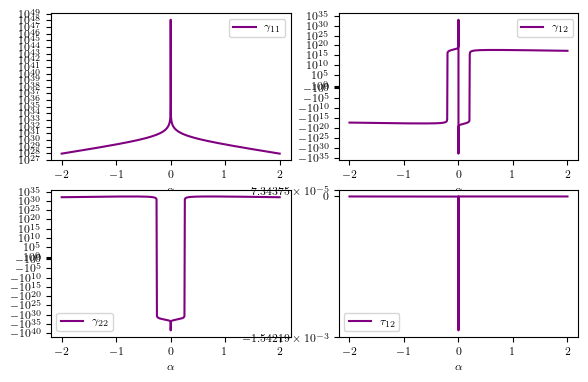

In [42]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_b, rad_b.gamma11, color='purple', label=r'$\gamma_{11}$')   # plot
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax1.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax1.set_yscale('symlog')


ax2.plot(alpha_b, rad_b.gamma12, color='purple', label=r'$\gamma_{12}$')   # plot
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('symlog')

ax3.plot(alpha_b, rad_b.gamma22, color='purple', label=r'$\gamma_{22}$')   # plot
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('symlog')

ax4.plot(alpha_b, rad_b.tau12, color='purple', label=r'$\tau_{12}$')   # plot
ax4.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax4.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax4.set_yscale('symlog')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

# 2 Fluid, $w \sim 10^{-4}$ Model

In this section we finally start to analyze a complete two fluid model. Here, the equation of state parameter $w$ of Dark Matter such that $p(\rho) = w\rho$ is a free parameter, which is constrained to satisfy $|w| < 10^{-5}$ (INSERT REFERENCE). However, we shall use $w \sim 10^{-4}$ in this introductory case, for the time to compute observables becomes very large for small $w$, which will be left for the final analysis. We begin by setting the parameters of our cosmological model.

In [43]:
twofluid = Nc.HICosmoQGRW()                                    # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

k = 1.0
# these lines set the relevant cosmological parameters
twofluid.props.w = 1.0e-4                                          # dust/dark matter equation of state
twofluid.props.Omegar = 1.0e-5                                 # radiation abundance today, set to approx 0
twofluid.props.Omegaw = 1.0 * ( 1.0 - 1.0e-5 )                 # dust/dark matter abundance today, set to 1.0
twofluid.props.xb = 1.0e30                                     # inverse scale factor x=1/a at the time of the bounce

In [44]:
twofluid_c = model_evol(twofluid,alpha_c,k)      # evolves the equations of motion for during the contraction phase
twofluid_b = model_evol(twofluid,alpha_b,k)      # evolves the equations of motion close to the bounce

# the result is a list of classes for each time alpha. Such classes then have attributes from which the relevant quantities can be direclty extracted
print(twofluid_c.gamma11[0])                               # prints the gamma11 result for the first value of alpha
print(twofluid_c.gamma12[0])                               # prints the gamma12 result for the first value of alpha

3.966077587783686e-36
3.136000271024414e-22


## Speeds of Sound $c^{2}_{m}, c^{2}_{S}$ and angular variable $\phi$

Let's see if the proposed model is indeed consistent by analyzing the behavior of the angle $\phi$ and the speeds of sound $c^{2}_{m}, c^{2}_{S}$. In particular, due to well known behavior for the energie densities of dust and radiation, respectively

\begin{align}
 \rho_{d} & \sim a^{-3}\, , \\
 \rho_{r} & \sim a^{-4}\, ,
\end{align}

one must expect a phase of dust domination $\rho_{2} + p_{2} \gg \rho_{1} + p_{1}$ followed by radiation domination $\rho_{2} + p_{2} \ll \rho_{1} + p_{1}$ due to the behavior of the scale factor $a(\alpha)$ during the contracting phase.

In [45]:
print(twofluid_c.trans())

[-60.67867867867868, -54.96096096096096]


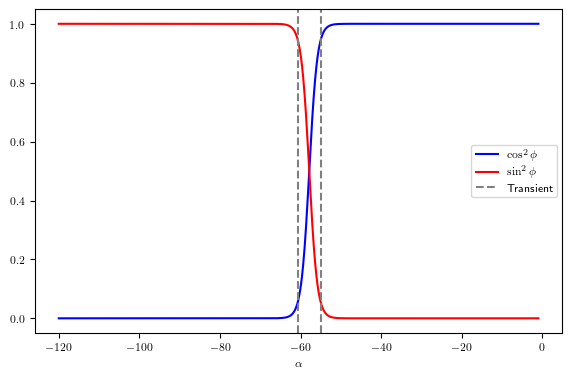

In [46]:
plt.plot(alpha_c, twofluid_c.cos2phi, color='blue', label=r'$\cos^{2}\phi$')
plt.plot(alpha_c, twofluid_c.sin2phi, color='red', label=r'$\sin^{2}\phi$')
plt.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
plt.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In [47]:
delta = np.abs( twofluid_c.trans()[1] - twofluid_c.trans()[0] )
print(delta)

5.7177177177177185


One observes that the model presents two different behaviors with a transient periods that lasts $\Delta = 5.71\alpha$, which is small with respect to the whole evolution during the interval $\alpha \in (-120,-1)$. In particular, we observe that


  \begin{align}
   \text{ i) Early Past: } \, \,  \cos^{2}\phi \approx 0, \sin^{2}\phi \approx 1 \iff & \phi \approx \frac{\pi}{2} \iff \rho_{2} + p_{2} \gg \rho_{1} + p_{1} \iff \, \, \text{Dust Domination} \, , \\
    %
    \text{ ii) Late Future: } \, \,  \cos^{2}\phi \approx 1, \sin^{2}\phi \approx 0 \iff & \phi \approx 0 \iff \rho_{2} + p_{2} \ll \rho_{1} + p_{1} , \iff \, \, \text{Radiation Domination} \, ,   
  \end{align}

with very good precision. Also, since we analyze the evolution only up to $\alpha = -1$, this period is still far from the bounce, so that said conclusions are valid independently of the bouncing mechanism.

We now proceed to analyze the speeds of sound of our two fluid model.

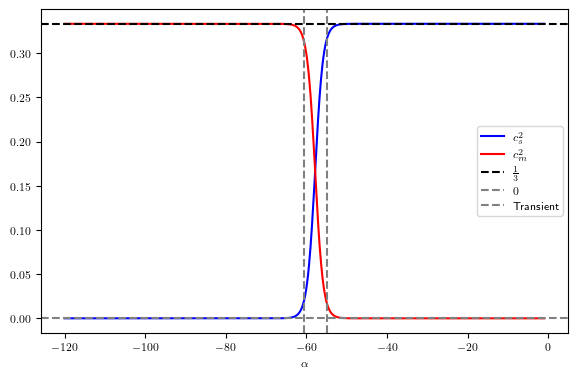

In [48]:
plt.plot(alpha_c, twofluid_c.cs2, color='blue', label=r'$c^{2}_{s}$')
plt.plot(alpha_c, twofluid_c.cm2, color='red', label=r'$c^{2}_{m}$')
plt.axhline(y=1/3, linestyle='--', color='black', label=r'$\frac{1}{3}$')
plt.axhline(y=0, linestyle='--', color='grey', label=r'$0$')
plt.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
plt.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In the above plot, one notices very similar behavior to the previos case, with two different periods connected by a fast transient. In particular

\begin{align}
   \text{ i) Early Past: } \, \,  c^{2}_{S} \approx 0, c^{2}_{m} \approx \frac{1}{3} \implies & \phi \approx \frac{\pi}{2} \iff \, \, \text{Dust Domination} \, , \\
    %
    \text{ ii) Late Future: } \, \, c^{2}_{S} \approx \frac{1}{3}, c^{2}_{m} \approx 0 \implies & \phi \approx 0 \iff \, \, \text{Radiation Domination} \, ,   
\end{align}

which further corroborates the consistency of our model. We now proceed to study the remaining background quantities. Due to this analysis, we shall now use the terminology


\begin{align}
   \text{ Early Past} \, \, & \iff \, \, \text{Dust Domination} \, , \\
    %
    \text{ Late Future} \, \, & \iff \, \, \text{Radiation Domination} \, ,   
\end{align}

interchangeably.


## Mass Analysis

We now plot the masses $m_{s}, m_{\zeta}$, in a logarithmic scale, for their scales are way too different.

In [49]:
type(twofluid_c.eq())

numpy.float64

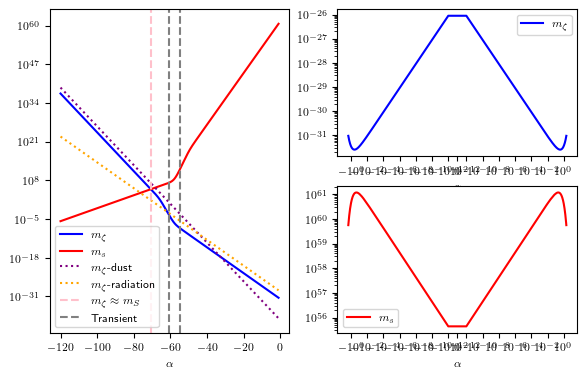

In [50]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, twofluid_c.mz, c='b', label=r'$m_\zeta$')    # plots mz
ax1.plot(alpha_c, twofluid_c.ms, c='r', label=r'$m_s$')        # plots ms
ax1.plot(alpha_c, dust_c.mz, c='purple', label=r'$m_\zeta$-dust', linestyle=':')
ax1.plot(alpha_c, rad_c.mz, c='orange', label=r'$m_\zeta$-radiation', linestyle=':')
#ax1.plot(alpha_c, dust_c.ms, c='indigo', label=r'$m_S$-dust', linestyle=':')
#ax1.plot(alpha_c, rad_c.ms, c='green', label=r'$m_S$-radiation', linestyle=':')
ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, twofluid_b.mz, c='blue', label=r'$m_\zeta$')    # plots mz_b
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, twofluid_b.ms, c='red', label=r'$m_s$')        # plots ms_b
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax2.legend()
ax3.legend()

pass

In the above plots, one sees that the dust and radiation evolution are asymptotes for the adiabatic mode mass $m_{\zeta}$ in the early past and late future, respectively, with a small transient connecting the two phases. The same does not apply for the entropy mode mass $m_{S}$ due to the fact that it formally diverges in the single fluid case. We also note that the two masses become of the same order before the transtition, still in the dust dominated phase, which is mode independent.

As in the previous cases, one observes that mass $m_{\zeta}$ decays, while the mass of the entropy mode $m_{s}$ grows without limits, which again are caused by the dependencies

\begin{align}
  m_{\zeta} & \propto a^{3}\, , \\
  m_{S} & \propto a^{-3}\, , \\
\end{align}

with $a$ being an always decreasing quantity in the bouncing phase.

The right side plots reveal the behavior of the masses near the bounce, which is essentially the same as in the previously studied radiation dominated model: since $a(\alpha)$ starts to grow, the adiabatic modes mass $m_{\zeta}$ start to grow, while the entropy mass $m_{S}$ start to decay.

## Frequency Analysis

We now proceed to plot the frequencies of the adiabatic and entropy modes, $\nu_{\zeta}, \nu_{s}$.

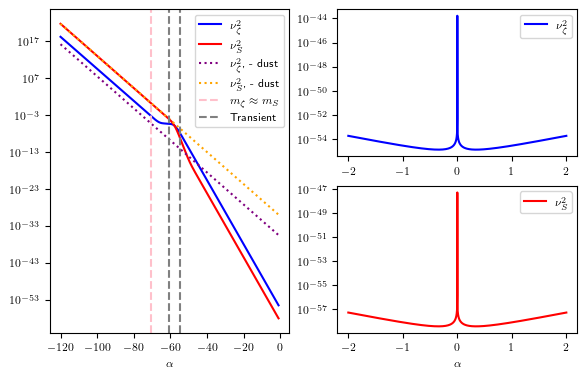

In [51]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, twofluid_c.nuz ** 2, c='b', label=r'$\nu^{2}_{\zeta}$')    # plots nuz
ax1.plot(alpha_c, twofluid_c.nus ** 2, c='r', label=r'$\nu^{2}_{S}$')        # plots nus
ax1.plot(alpha_c, dust_c.nuz ** 2, c='purple', label=r'$\nu^{2}_{\zeta}$, - dust', linestyle=':')    # plots nuz
ax1.plot(alpha_c, dust_c.nus ** 2, c='orange', label=r'$\nu^{2}_{S}$, - dust', linestyle=':')        # plots nus
ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
#ax1.plot(alpha_c, rad_c.nuz ** 2, c='indigo', label=r'$\nu^{2}_{\zeta}$, - radiation', linestyle=':')    # plots nuz
#ax1.plot(alpha_c, rad_c.nus ** 2, c='green', label=r'$\nu^{2}_{S}$, - radiation', linestyle=':')        # plots nus
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, twofluid_b.nuz ** 2, c='b', label=r'$\nu^{2}_{\zeta}$')    # plots nuz_b
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
#ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, twofluid_b.nus ** 2, c='r', label=r'$\nu^{2}_{S}$')        # plots nus_b
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax2.legend()
ax3.legend()

Again, one notices that the frequencies $\nu_{s}, \nu_{\zeta}$ present very similar behavior, with both decreasing in time due to the common tipe dependent factor $F_{k}(t)$. In particular, $F_{k}(t) \sim k$ implies that, for different modes, the above plots will only be translated, which we plot in the below cell.

One may also notice that the dust evolutions of the frequencies are good approximations in the dust dominated phase, which does not occur in the radiation dominated one. This is due to the fact that, even if radiation dominates in the future, the evolution presented a dust phase, which essentially amount to a change of initial conditions in the radiation dominated phase. Therefore, in the next plots we may only plot the dust domination evolutions as approximations for the early past of this model.

On the right plots, one again notices that a discontinuity is present due our choice of lapse function $N$, with both frequencies decreasing in time before the bounce, and starting to increase right after. This guarantees that modes that are super-Hubble right before the bounce reenter the horizon in the future.

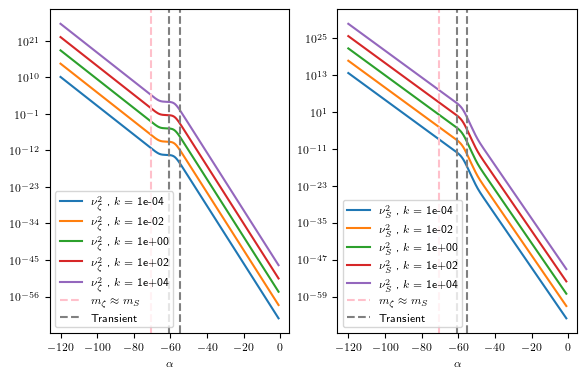

In [52]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  twofluid_k = model_evol(twofluid,alpha_c,k)
  ax1.plot(alpha_c, twofluid_k.nuz ** 2, label=r'$\nu^{2}_\zeta$ , $k =$ '+f"{k:.0e}")    # plots nuz
  ax2.plot(alpha_c, twofluid_k.nus ** 2, label=r'$\nu^{2}_S$ , $k =$ '+f"{k:.0e}" )

ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

Let's now analyze the coupling $Y$ compared to the masses time frequency squared $m_{z}\nu^{2}_{z}$, $m_{s}\nu^{2}_{s}$. In this case, since the interaction is relevant, we should expect non-trivial behavior due to the coupling $Y$.

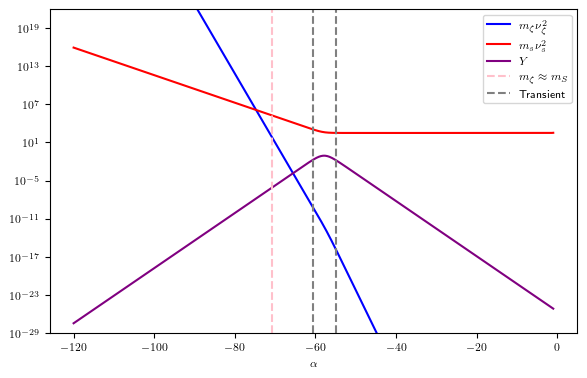

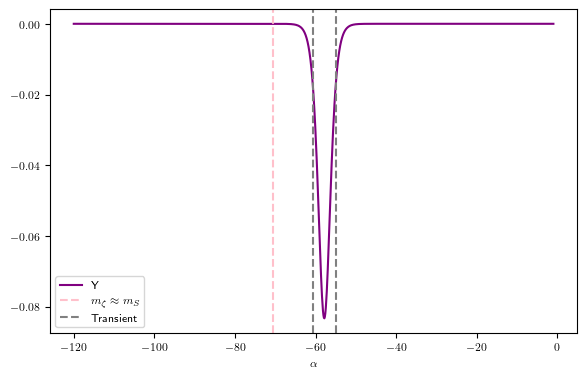

In [53]:
#plt.plot(alpha_c,rad_c.y,label='y')
plt.plot(alpha_c, twofluid_c.mnu2_z, color='blue' , label=r'$m_{\zeta}\nu^{2}_{\zeta}$')
plt.plot(alpha_c, twofluid_c.mnu2_s, color='red', label=r'$m_{s}\nu^{2}_{s}$')
plt.plot(alpha_c, np.abs(twofluid_c.y), color='purple', label=r'$Y$')
plt.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
plt.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
plt.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )

plt.yscale('log')
plt.xlabel(r'$\alpha$')
plt.ylim(1e-29,1e22)
plt.legend()
plt.show()

plt.plot(alpha_c,twofluid_c.y, label='Y', color='purple')
plt.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
plt.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
plt.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

As expected, one readily notices an interesting behavior for the coupling $Y$: it is negative for all values of $\alpha$ and its norm has a maximum in the transient period, quickly decaying to $0$ for single fluid domination. In particular, for the above mode $k=1.0$, one sees that the entropy mass frequency $m_{S}\nu^{2}_{S}$ is always greater than the coupling, with the same not holding for the adiabatic term $m_{\zeta}\nu^{2}_{\zeta}$. Note however that the above is mode dependent due to $\nu^{2}_{\ell} \sim k^{2}$. To visualize this, we repeat the above plot for different $k$ values in the below cell, with the coupling in black .

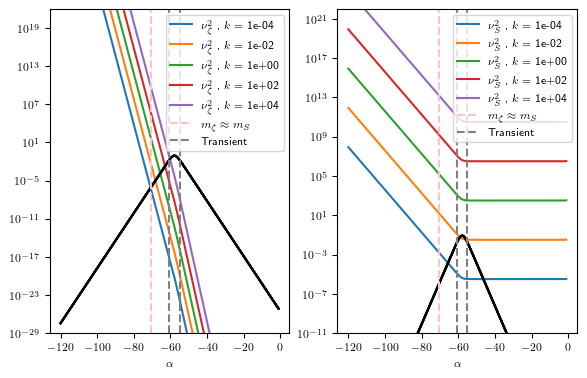

In [54]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

for k in k_list:
  twofluid_k = model_evol(twofluid,alpha_c,k)
  ax1.plot(alpha_c, twofluid_k.mnu2_z, label=r'$\nu^{2}_\zeta$ , $k =$ '+f"{k:.0e}")    # plots nuz
  ax1.plot(alpha_c, np.abs(twofluid_k.y), color='black')    # plots the coupling
  ax2.plot(alpha_c, twofluid_k.mnu2_s, label=r'$\nu^{2}_S$ , $k =$ '+f"{k:.0e}" )
  ax2.plot(alpha_c, np.abs(twofluid_k.y), color='black')    # plots the coupling

ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
ax1.set_ylim(1e-29,1e22)

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
ax2.set_ylim(1e-11,1e22)

ax1.legend()
ax2.legend()
plt.show()

In the above graph, one then sees that, for adiabatic modes, the mass-frequency squared $m_{\zeta}\nu^{2}_{\zeta}$ becomes negligible with respect to the coupling $Y$ in the late future, which happens only for a finite interval for the entropy terms $m_{S}\nu^{2}_{S}$, which become stationary in the far future.

At this point, one might expect that the above behavior has non-trivial consequences for the effective couplings, which shall be more relevant for the adiabatic modes in the future, at least in the above considered range. We shall analyze this by specific studying their behavior in the next cells. However, before we dwelve in the coupling behavior, we will quickly analyze the eigenvalues $\nu_{1},\nu_{2}$ of our two fluid model.

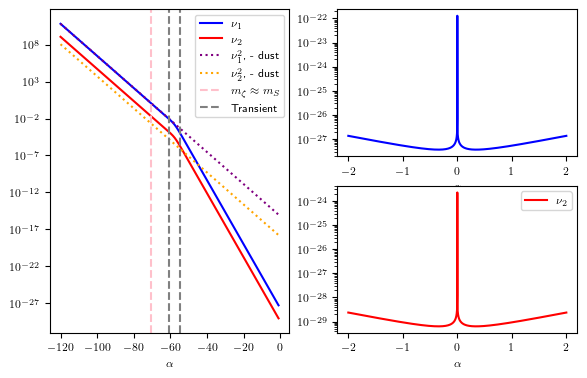

In [55]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, twofluid_c.nu1, c='b', label=r'$\nu_1$')    # plots nu1
ax1.plot(alpha_c, twofluid_c.nu2, c='r', label=r'$\nu_2$')        # plots nu2
ax1.plot(alpha_c, dust_c.nu1, c='purple', label=r'$\nu^{2}_{1}$, - dust', linestyle=':')    # plots nuz
ax1.plot(alpha_c, dust_c.nu2, c='orange', label=r'$\nu^{2}_{2}$, - dust', linestyle=':')        # plots nus
ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
#ax1.plot(alpha_c, rad_c.nu1, c='indigo', label=r'$\nu^{2}_{1}$, - radiation', linestyle=':')    # plots nuz
#ax1.plot(alpha_c, rad_c.nu2, c='green', label=r'$\nu^{2}_{2}$, - radiation', linestyle=':')        # plots nus
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, twofluid_b.nu1, c='b', label=r'$\nu_1$')    # plots nuz1
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, twofluid_b.nu2, c='r', label=r'$\nu_2$')        # plots nus2
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

As in the previous case, the frequencies $\nu_{1}, \nu_{2}$ present very similar behavior, decreasing due to the common time dependent factor $F_{k}(t)$, with $\nu_{i} = c_{i}F_{k}(t)$. In particular, since $c_{2} \ll c_{1} \implies \nu_{2} \ll \nu_{1} $ for all times, before and after the transiction period. Also, they decrease in the contraction phase and increase in the expansion one, right after the bounce. Again, one sees that the dust phase behavior is a good approximation for the evolution of the two fluid model, while the same does not hold for the radiation one.

We now illustrate their behavior by varying the mode number $k$.

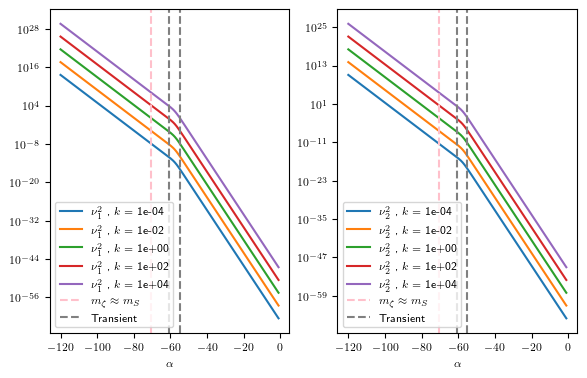

In [56]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  twofluid_k = model_evol(twofluid,alpha_c,k)
  ax1.plot(alpha_c, twofluid_k.nu1 ** 2, label=r'$\nu^{2}_1$ , $ k = $ '+f"{k:.0e}")    # plots nuz
  ax2.plot(alpha_c, twofluid_k.nu2 ** 2, label=r'$\nu^{2}_2$ , $ k = $ '+f"{k:.0e}" )

ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

As one can observe, varying the mode number $k$ just translates the above graphs. Also, $\nu_{2} \ll \nu_{1}$ consistently for all cases.

## Effective Couplings



We now study the behavior of the effective Hubble radius $R_{H\ell}$ and couplings $\aleph_{\ell}, \beth_{\ell}$ compared to the frequencies $\nu^{2}_{\ell}$ of the adiabatic and entropy modes. We only plot the absolute values of each contribution. In the two fluid case, the behavior of the couplings will be non-trivial compared to the previously studied single fluid ones, which may to interesting consequences for the modes.

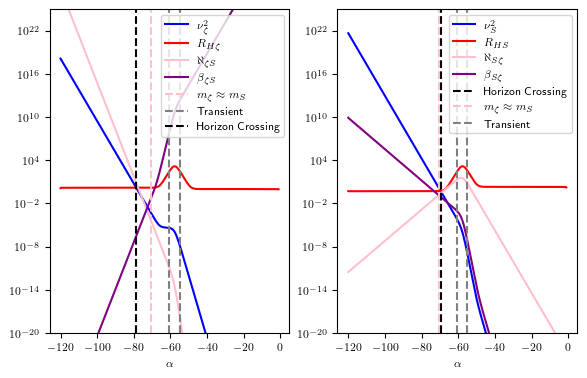

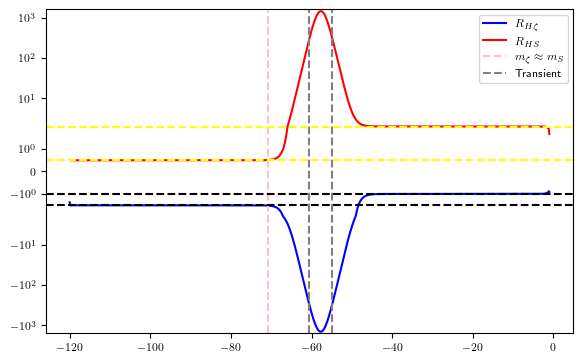

In [57]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot( alpha_c, twofluid_c.nuz ** 2, color='blue', label=r'$\nu^{2}_{\zeta}$')
ax1.plot( alpha_c, np.abs(twofluid_c.Rh_z), color='red', label=r'$R_{H\zeta}$')
ax1.plot( alpha_c, np.abs(twofluid_c.aleph_zs), color='pink', label=r'$\aleph_{\zeta S}$')
ax1.plot( alpha_c, np.abs(twofluid_c.beth_zs), color='purple', label=r'$\beta_{\zeta S}$')

ax2.plot( alpha_c, twofluid_c.nus ** 2, color='blue', label=r'$\nu^{2}_{S}$')
ax2.plot( alpha_c, twofluid_c.Rh_s, color='red', label=r'$R_{H S}$')
ax2.plot( alpha_c, np.abs(twofluid_c.aleph_sz), color='pink', label=r'$\aleph_{S\zeta}$')
ax2.plot( alpha_c, np.abs(twofluid_c.beth_sz), color='purple', label=r'$\beta_{S\zeta}$')

ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
ax1.axvline( x = -78.66566566566567, color='black', linestyle='--', label='Horizon Crossing' )
ax2.axvline( x = twofluid_c.cross_s(), color='black', linestyle='--', label='Horizon Crossing' )
ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
ax1.set_ylim(1e-20,1e25)

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
ax2.set_ylim(1e-20,1e25)

ax1.legend()
ax2.legend()
plt.show()

plt.plot( alpha_c, twofluid_c.Rh_z, color='blue', label=r'$R_{H\zeta}$')
plt.plot( alpha_c, twofluid_c.Rh_s, color='red', label=r'$R_{H S}$')
plt.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
plt.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
plt.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
plt.axhline( y = -1.0, color='black', linestyle='--' )
plt.axhline( y = 0.5, color='yellow', linestyle='--' )
plt.axhline( y = -1.5, color='black', linestyle='--' )
plt.axhline( y = 2, color='yellow', linestyle='--' )
plt.yscale('symlog')
plt.legend()
plt.show()

The above plots convey lots of interesting information. For the adiabatic modes, one notices the following relations:

\begin{align}
  \text{Adiabatic Modes } &\zeta_{k}& \\
 & \text{ i) Dust Domination : } \beth_{\zeta S}< R_{H\zeta} < \nu_{\zeta}^{2} < \aleph_{\zeta S}\, ;  \\
 & \text{ ii) Radiation Domination : }    \aleph_{\zeta S} < \nu_{\zeta}^{2} \ll R_{H\zeta} \ll \beth_{\zeta S}\, ; \\
 %
 \text{Entropy Modes } &Q_{k}& \\
 & \text{ i) Dust Domination : } \aleph_{\zeta S} < R_{H\zeta} < \beth_{\zeta S} < \nu_{S}^{2} \, ;  \\
 & \text{ ii) Radiation Domination : }      \nu_{S}^{2} < \aleph_{\zeta S} \ll \beth_{S\zeta} \ll R_{H S} \, ;
\end{align}

First and foremost, one sees that the relevant quantities for the Dust Domination phase are $\nu^{2}_{\ell}, \aleph_{\ell}$, which means that the modes are still in their sub-Hubble regime. Similarly, $R_{H\ell}, \beth_{\ell}$ are more relevant for the end of Radiation Domination, which means that the modes achieved a super-Hubble regime.

Remarkably, the adiabatic modes are heavily influenced by the sub-Hubble coupling $\aleph_{\zeta S}$ in the past, which does not apply for the entropy mode due to $\aleph_{S \zeta} \ll \nu^{2}_{S}$. Similarly in the future, the super-Hubble coupling $\beth_{\zeta S}$ is very powerful, while $\beth_{S \zeta} \ll R_{H S}$ is not. This means that the adiabatic mode $\zeta$ "feels" the interactions more strongly than the entropy one. This then leads to an interesting situation, where the entropy modes are excited and transfer energy to the adiabatic ones. In this case however, one is naturally lead to the question: if the entropy modes are first excited, why are they not relevant to describe the CMB spectrum? The answer lies in the relation between the adiabatic and entropic mass.

In the above plot, one first notices that the entropic Effective Hubble Radius is positive, while leads to a damping super-Hubble behavior, while the adiabatic one is negative, implying on amplifying effects on the super-Hubble regime. To see this, recall that

\begin{align}
    & \frac{ 1 }{ m_{\zeta}m_{S} } = f(\phi)\, , \\
    %
    & \implies -\ln m_{\zeta} - \ln m_{S} = \ln f(\phi)\, , \\
    & \implies \ln m_{S} = -\ln m_{\zeta} - \ln f(\phi)\, , \\
    & \implies \frac{\dot{m}_{S}}{m_{S}} = -\frac{ \dot{m}_{\zeta} }{ m_{\zeta} } - \frac{ f'(\phi) }{ f(\phi) }\dot{\phi} \, , \\
\end{align}

now, since in the single fluid domination $\phi \approx \text{const} \implies \dot{\phi} \approx 0$ and $Y \approx 0$, one obtains that

\begin{equation}
 R_{H S} \approx -R_{H\zeta} + \text{small const.} \, ,
\end{equation}

which can be readily visualized in the above plot. This means that our model produces a natural mechanism to explain why adiabatic modes are more proeminent than the entropy ones, even if they are not excited. In fact, similar results can be expected for other bouncing models, which also present the contracting behavior of $a(\alpha)$ that lead to a decay of the adiabatic mass $m_{\zeta}$ and amplification of the entropy one $m_{S}$. It would then be interesting to consider the effect of the bounce on entropy modes of other models to observe if they can reproduce similar effects.

To conclude, note that the relations between $\aleph_{\ell}, \nu^{2}_{\ell} \sim k^{2}$ and $R_{H\ell}, \beth_{\ell} \sim k^{0}$ are mode independent. However, the relation between a member of the first pair with one of the second is mode dependent, which we shall analyze in the below cells.

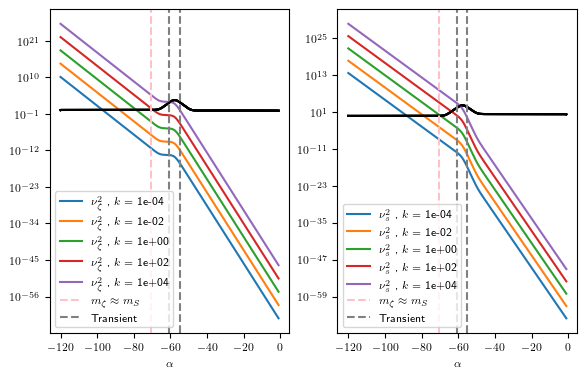

In [58]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  twofluid_k = model_evol(twofluid,alpha_c,k)
  ax1.plot(alpha_c, twofluid_k.nuz ** 2, label=r'$\nu^{2}_\zeta$ , $ k = $ '+f"{k:.0e}")    # plots nuz
  ax1.plot(alpha_c, np.abs(twofluid_k.Rh_z), color='black')

  ax2.plot(alpha_c, twofluid_k.nus ** 2, label=r'$\nu^{2}_s$ , $ k = $ '+f"{k:.0e}" )
  ax2.plot(alpha_c, twofluid_k.Rh_s, color='black')

ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )


ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

From the above plot, one readily notices that both adiabatic and entropy modes start their evolution in the sub-Hubble regime in the sense that $\nu^{2}_{\ell} \gg R_{H \ell}$, with reversed behavior for latter times, which means that they entered their super-Hubble phase. Note that, as one expects, the horizon crossing moment $\nu^{2}_{\ell} \approx R_{H\ell}$ occurs later and later in the future, scaling with the mode number $k$. As previously discussed, this means that, in the late future, the entropy modes will present a small amplification and then a "freezing" effect, while the adiabatic modes will be amplied both due to the bounce and due to the coupling with the entropy modes.

We now repeat the above for $\beth_{\ell}$, which is mode independent (again ploted in black):

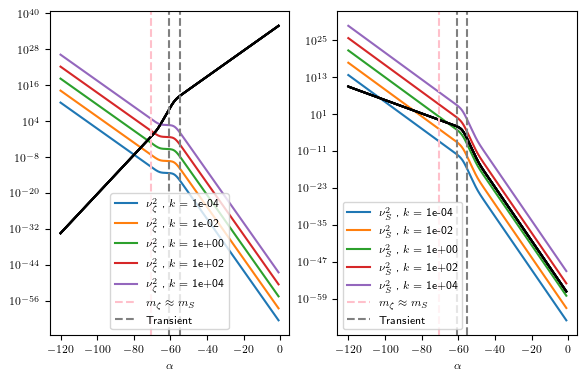

In [59]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  twofluid_k = model_evol(twofluid,alpha_c,k)
  ax1.plot(alpha_c, twofluid_k.nuz ** 2, label=r'$\nu^{2}_{\zeta}$ , $ k = $ '+f"{k:.0e}")    # plots nuz
  ax1.plot(alpha_c, np.abs(twofluid_k.beth_zs), color='black')

  ax2.plot(alpha_c, twofluid_k.nus ** 2, label=r'$\nu^{2}_{S}$ , $ k = $ '+f"{k:.0e}" )
  ax2.plot(alpha_c, np.abs(twofluid_k.beth_sz), color='black')

ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

Here, one notices the non-trivial fact that the $\beth_{\zeta S}$ coupling is always increasing, while the $\beth_{S\zeta}$ is always decreasing. This occurs because the mass of the entropy mode is always increasing, so that it "feels less" the adiabatic mode, which is greatly affected by the interaction term that dominates the time evolution in the future. Note that this happens even for $|Y| \ll m_{\zeta}\nu_{\zeta}^{2},m_{S}\nu^{2}_{S}$ as we had just analyzed. This occurs due to the fact that $Y$ couples non-trivially in the equations of motion in association to the frequencies and masses.

Also, one notices that, for the interval $ k \in (10^{-4}, 10^{4}) $ the $\beth_{S\zeta}$ is practically negligible, with its effect becoming weaker and weaker, while $\beth_{\zeta S}$ starts negligible, but dominates the late evolution.

Finally, the relation to the frequencies $\nu^{2}_{\ell}$ and the $\aleph_{\ell}$ coupling amounts to a translation when we consider different modes:

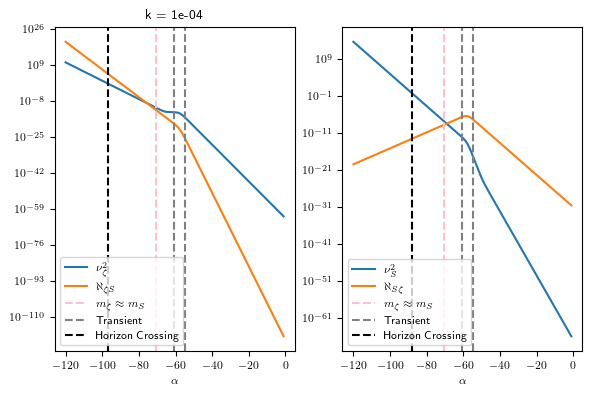

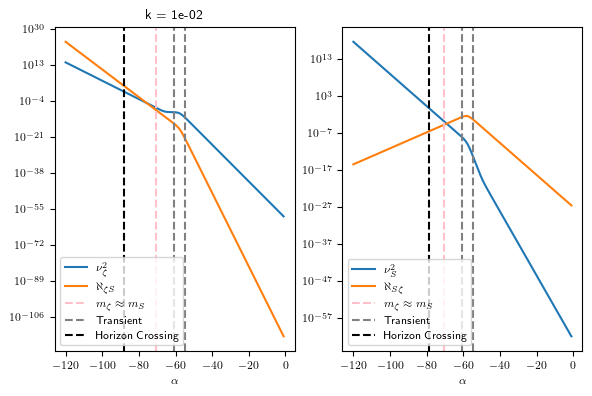

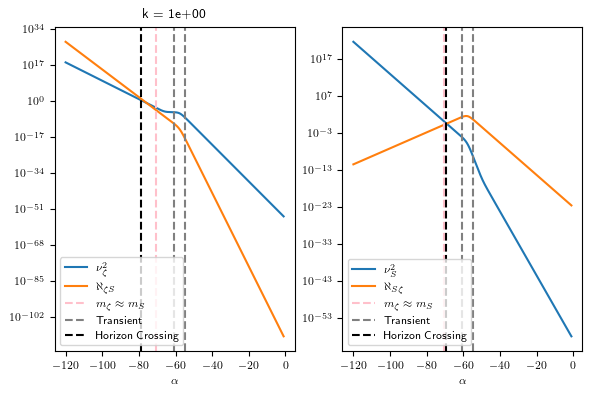

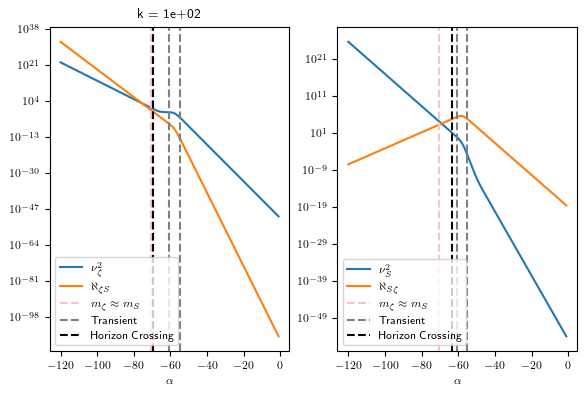

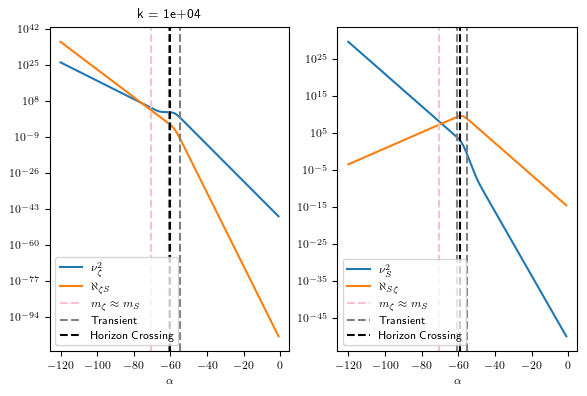

In [60]:
for k in k_list:
  set_rc_params_article(ncol=2)                             # sets the column number of the figure
  fig = plt.figure()
  twofluid_k = model_evol(twofluid,alpha_c,k)

  ax1= fig.add_subplot(1,2,1)
  ax2= fig.add_subplot(1,2,2)
  ax1.plot(alpha_c, twofluid_k.nuz ** 2, label=r'$\nu^{2}_{\zeta}$')    # plots nuz
  ax1.plot(alpha_c, np.abs(twofluid_k.aleph_zs), label=r'$\aleph_{\zeta S}$')

  ax2.plot(alpha_c, twofluid_k.nus ** 2, label=r'$\nu^{2}_{S}$'  )
  ax2.plot(alpha_c, np.abs(twofluid_k.aleph_sz), label=r'$\aleph_{S\zeta}$')

  ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
  ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
  ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
  ax1.axvline( x = twofluid_k.cross_z(), color='black', linestyle='--', label='Horizon Crossing' )
  ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
  ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
  ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
  ax2.axvline( x = twofluid_k.cross_s(), color='black', linestyle='--', label='Horizon Crossing' )

  ax1.set_yscale('log')
  ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

  ax2.set_yscale('log')
  ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

  ax1.set_title('k = '+f"{k:.0e}")
  ax1.legend()
  ax2.legend()
  plt.show()

Here, one notices the consistent result that $ \aleph_{\zeta S} \ll \nu^{2}_{\zeta} $ at the beginning of the evolution of the adiabatic modes. This means that, even in the sub-Hubble limit, the $\aleph_{\zeta S}$ is relevant, so that the adiabatic mode is influenced by the entropy mode. On the other hand $\nu^{2}_{S}$ dominates the early evolution but is surpassed by $\aleph_{S \zeta}$ in the late future, when the modes are already in their super-Hubble phase.

The previous analyzes mean that the adiabatic mode always "feels" the interaction more strongly than the entropy mode, which excites the adiabatic one both in the sub-Hubble and super-Hubble phase.

To conclude this discussion, one notices that, as expected, the horizon crossing moment occurs later and later in the future, scaling with $k$.
It is also possible to note that, for modes with $k \sim 10^{4}$, the sub-Hubble to super-Hubble transiction occurs right before the transient period or even during the transiction. This means that, for those modes, non-trivial effects will occur during the transition due to the change of fluid dominance. To understand this effect better, let's plot the moment of horizon crossing $t_{\text{cross}}$ as a function of the mode number $k$, which may give further insight in the power spectrum behavior.

In [61]:
k_interval = np.geomspace(1e-4, 1e4, 1000)
cross_z_list = []
cross_s_list = []
for k in k_interval:
  twofluid_k = model_evol(twofluid,alpha_c,k)
  cross_z_list.append( twofluid_k.cross_z() )
  cross_s_list.append( twofluid_k.cross_s() )

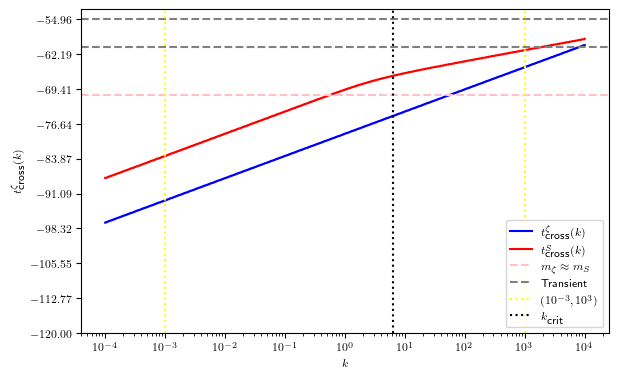

In [62]:
#set_rc_params_article(ncol=2)                             # sets the column number of the figure
#fig = plt.figure()                                        # defines a Numpy figure object

#ax1= fig.add_subplot(1,2,1)
#ax2= fig.add_subplot(1,2,2)

plt.plot(k_interval, cross_z_list, color='blue', label=r'$t_{ \hbox{cross} }^{\zeta}(k)$')
plt.plot(k_interval, cross_s_list, color='red', label=r'$t_{ \hbox{cross} }^{S}(k)$')

plt.axhline( y = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
plt.axhline( y = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
plt.axhline( y = twofluid_c.trans()[1], color='grey', linestyle='--' )
plt.axvline( x = 1e-3, color='yellow', linestyle=':', label=r'$(10^{-3},10^{3})$' )
plt.axvline( x = 1e3, color='yellow', linestyle=':' )
plt.axvline( x = 6.263207452198692, color='black', linestyle=':', label=r'$k_{ \hbox{crit} }$' ) # critical value of k

#ax2.axhline( y = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
#ax2.axhline( y = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
#ax2.axhline( y = twofluid_c.trans()[1], color='grey', linestyle='--' )
#ax2.axvline( x = 1e-3, color='yellow', linestyle=':', label=r'$(10^{-3},10^{3})$' )
#ax2.axvline( x = 1e3, color='yellow', linestyle=':' )

plt.xscale('log')
#plt.yscale('symlog')
plt.xlabel(r'$k$')                                # sets the x legend
plt.ylabel(r'$t_{ \hbox{cross} }^{\zeta}(k)$')
plt.yticks(ticks=np.linspace( -120 , twofluid_c.trans()[1] ,10))

#ax2.set_xscale('log')
#ax2.set_yscale('symlog')
#ax2.set_xlabel(r'$k$')                                # sets the x legend
#ax2.set_ylabel(r'$t_{ \hbox{cross} }^{S}(k)$')
#ax2.set_yticks(ticks=np.linspace( -120 , twofluid_c.trans()[1] ,10))


#ax1.legend()
#ax2.legend()
#fig.tight_layout()
plt.legend()
plt.show()

# in the below graph, one is using the corrected horizon crossing time, where the coupling is small. Need to see which is more important

From the above plots, one sees that most modes have their sub-Hubble to super-Hubble transition at the matter dominated phase, with just a very small portion crossing during the transition period. This is more pronounced for entropy modes, which also present a small transition after the equivalence moment $m_{\zeta} \approx m_{S}$. Also, no modes cross the horizon in the radiation period. Furthermore, since the observed $k$ interval in the CMB is given by $k \in (10^{-3}, 10^{3})$ the transition period does not affect the observed modes, for they are already in their super-Hubble phase, where the Hubble radius dominates over the couplings.

Another interesting consequence of the above plot is that entropy modes cross the horizon always **after** the adiabatic modes. Therefore, since the adiabatic ones feel the coupling strongly, this means that, during the crossing period, sub-Hubble entropy modes impact the evolution of the already super-Hubble adiabatic modes. In practice, this may lead to oscillations even on the "proper" super-Hubble regime of adiabatic modes. Therefore, to proper consider a true super-Hubble regime, where the adiabatic modes stop oscillating, a possibility would be to consider the entropy crossing time, so that an adiabatic mode will be considered sub-Hubble only if

$$ R_{H \zeta} \gg \nu^{2}_{\zeta} \, \, \text{ and } R_{H S} \gg \nu^{2}_{S}\, ,  $$

which is necessary due to the relevant coupling between adiabatic and entropy modes as the system approaches the fluid transition. To observe the relevance of the coupling, in the below cell we plot the behavior of the $\aleph_{\ell}$ couplings with respect to the Hubble radiuses $R_{H\ell}$.

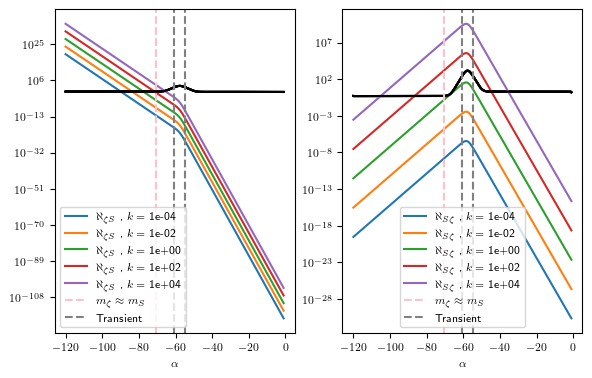

In [63]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  twofluid_k = model_evol(twofluid,alpha_c,k)
  ax1.plot(alpha_c, np.abs(twofluid_k.aleph_zs), label=r'$\aleph_{\zeta S}$ , $ k = $ '+f"{k:.0e}")    # plots nuz
  ax1.plot(alpha_c, np.abs(twofluid_k.Rh_z), color='black')

  ax2.plot(alpha_c, np.abs(twofluid_k.aleph_sz), label=r'$\aleph_{S\zeta}$ , $ k = $ '+f"{k:.0e}" )
  ax2.plot(alpha_c, np.abs(twofluid_k.Rh_s), color='black')

ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

In the above plot, one sees that adiabatic modes are not influenced by the $\aleph_{\zeta S}$ after the adiabatic Hubble radius $R_{H\zeta}$ becomes relevant. The same however is not true for the entropy modes, whose $\aleph_{S\zeta}$ coupling is still relevant even after horizon crossing. This means that sub-Hubble entropy modes are affect by the already super-Hubble adiabatic modes, but not the contrary, until the $\aleph_{S\zeta}$ couplings decays in the late future.

Note however that the above behavior is mode dependent: some modes do not feel said interaction as strongly as others, and are devised by a critical value $k_{\text{crit}}$, which we now estimate. To obtain such value, let's analyze the maximum point of both coupling and Hubble radius, which occurs during the transition period.

In [64]:
dif = []
hubble_max = np.max(twofluid_c.Rh_s)

for k in k_interval:
  #print(k)
  twofluid_k = model_evol(twofluid,alpha_c,k)
  aleph_max = np.max( np.abs(twofluid_k.aleph_sz) )
  #print(aleph_max)
  dif.append( np.abs( ( aleph_max - hubble_max ) / ( hubble_max ) ) )

#print(dif)
min_dif = np.min(dif)
for i in range( len(k_interval) ):
  if dif[i] == min_dif:
    k_crit =  k_interval[i]
    break

print(k_crit)

# maximum of coupling is proportional to k

6.263207452198692


Let's also analyze the behavior of the couplings $\aleph_{\ell}, \beth_{\ell}$ for different $k$.

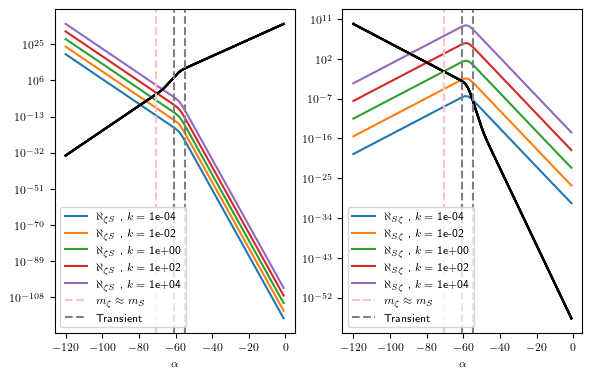

In [65]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
for k in k_list:
  twofluid_k = model_evol(twofluid,alpha_c,k)
  ax1.plot(alpha_c, np.abs(twofluid_k.aleph_zs), label=r'$\aleph_{\zeta S}$ , $ k = $ '+f"{k:.0e}")    # plots nuz
  ax1.plot(alpha_c, np.abs(twofluid_k.beth_zs), color='black')

  ax2.plot(alpha_c, np.abs(twofluid_k.aleph_sz), label=r'$\aleph_{S\zeta}$ , $ k = $ '+f"{k:.0e}" )
  ax2.plot(alpha_c, np.abs(twofluid_k.beth_sz), color='black')

ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )

ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

ax1.legend()
ax2.legend()
plt.show()

It is then possible to see that, as expected, the $\aleph_{\ell}$ coupling is more relevant in the past. This happens because modes are still on their sub-Hubble $\nu^{2}_{\ell} \gg R_{H\ell}$ phase. However, in the future, the $\beth_{\ell}$ couplings are more powerful due to the fact that the modes are aready in their super-Hubble limit $R_{H\ell} \gg \nu^{2}_{\ell}$. Note however that said behavior is $k$ dependent, with the $\aleph_{\ell}$ being more relevant for more time for larger $k$. That said, the above discussed behavior is valid for the relevant interval $k \in (10^{-3}, 10^{3})$.

To conclude this section, let's combine the above plots for the various couplings by varying the mode number $k$. Also, note that the critical value is of order one $k_{\text{crit}} \sim 1$, so that one can observe the behavior transition in the above plots.

k = 0.0001


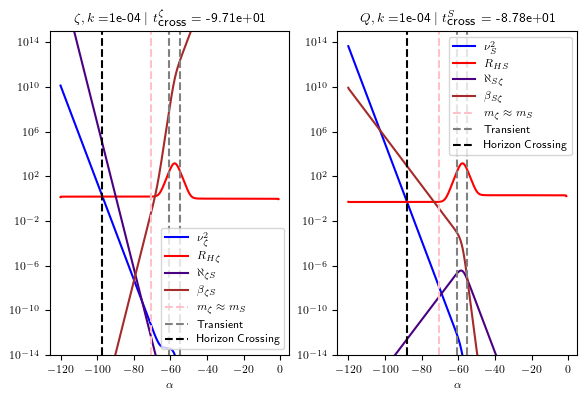

k = 0.01


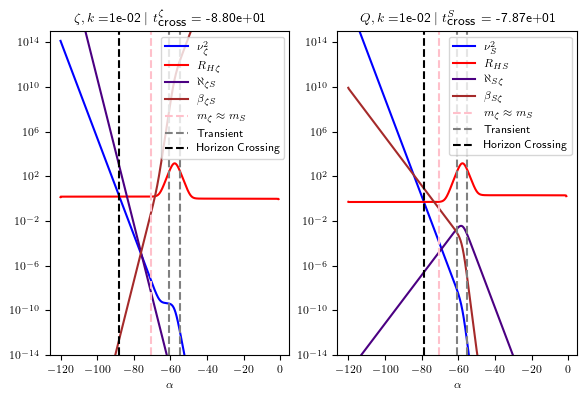

k = 1


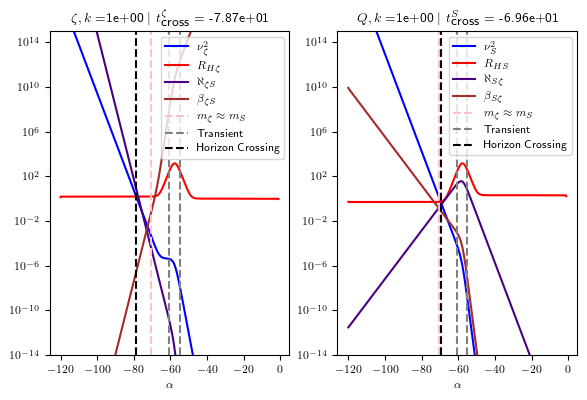

k = 100.0


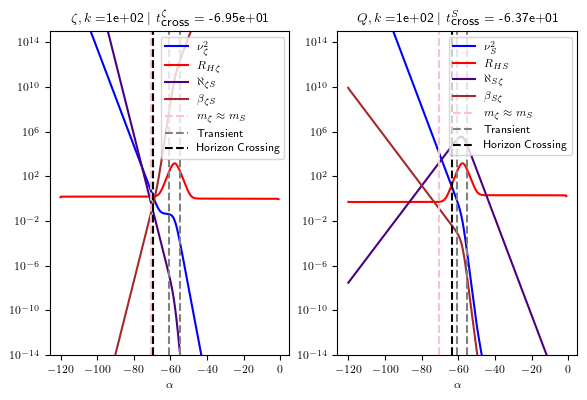

k = 10000.0


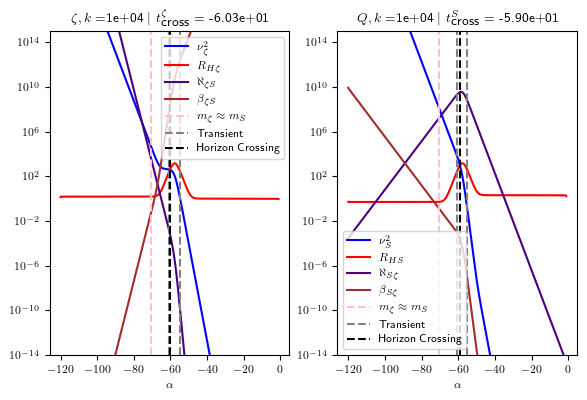

In [66]:
for k in k_list:
  set_rc_params_article(ncol=2)                             # sets the column number of the figure
  fig = plt.figure()
  twofluid_k = model_evol(twofluid,alpha_c,k)

  print('k = '+str(k))
  ax1= fig.add_subplot(1,2,1)
  ax2= fig.add_subplot(1,2,2)

  ax1.plot(alpha_c, twofluid_k.nuz ** 2, label=r'$\nu^{2}_{\zeta}$', color='blue')    # plots nuz
  ax1.plot(alpha_c, np.abs(twofluid_k.Rh_z), label=r'$R_{H\zeta}$', color='red')
  ax1.plot(alpha_c, np.abs(twofluid_k.aleph_zs), label=r'$\aleph_{\zeta S}$', color='indigo')
  ax1.plot(alpha_c, np.abs(twofluid_k.beth_zs), label=r'$\beta_{\zeta S}$', color='brown')

  ax2.plot(alpha_c, twofluid_k.nus ** 2, label=r'$\nu^{2}_{S}$', color='blue'  )
  ax2.plot(alpha_c, twofluid_k.Rh_s, label=r'$R_{H S}$', color='red')    # plots nuz
  ax2.plot(alpha_c, np.abs(twofluid_k.aleph_sz), label=r'$\aleph_{S\zeta}$', color='indigo')
  ax2.plot(alpha_c, np.abs(twofluid_k.beth_sz), label=r'$\beta_{S\zeta}$', color='brown')

  ax1.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
  ax1.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
  ax1.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
  ax1.axvline( x = twofluid_k.cross_z(), color='black', linestyle='--', label='Horizon Crossing' )
  ax2.axvline( x = twofluid_c.eq(), color='pink', linestyle='--' , label=r'$m_{\zeta} \approx m_{S}$')
  ax2.axvline( x = twofluid_c.trans()[0], color='grey', linestyle='--' , label='Transient')
  ax2.axvline( x = twofluid_c.trans()[1], color='grey', linestyle='--' )
  ax2.axvline( x = twofluid_k.cross_s(), color='black', linestyle='--', label='Horizon Crossing' )

  ax1.set_yscale('log')
  ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

  ax2.set_yscale('log')
  ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

  ax1.set_title(r'$\zeta, k = $'+f"{k:.0e}  "+r' $|$ '+r'  $t^{\zeta}_{\hbox{cross}}$ = '+f"{twofluid_k.cross_z():.2e}")
  ax1.legend()
  ax1.set_ylim(1e-14,1e15)
  ax2.set_title(r'$Q, k = $'+f"{k:.0e}  "+r' $|$ '+r'  $t^{S}_{\hbox{cross}}$ = '+f"{twofluid_k.cross_s():.2e}")
  ax2.set_ylim(1e-14,1e15)
  ax2.legend()
  plt.show()

As in the above, this last set of graphs conveys lots of information, which we now discuss. First, note that a consistent result for all modes is the following asymptotic behavior:

\begin{align}
  \text{Adiabatic Modes } &\zeta_{k}& \\
 & \text{ i) Far Past: } \beth_{\zeta S}< R_{H\zeta} \ll \nu_{\zeta}^{2} \ll \aleph_{\zeta S}\, ;  \\
 & \text{ ii) Far Future : }    \aleph_{\zeta S} < \nu_{\zeta}^{2} \ll R_{H\zeta} \ll \beth_{\zeta S}\, ; \\
 %
 \text{Entropy Modes } &Q_{k}& \\
 & \text{ i) Far Past : } \aleph_{S\zeta} < R_{H\zeta} \ll \beth_{S\zeta} \ll \nu_{S}^{2} \, ;  \\
 & \text{ ii) Far Future : }      \nu_{S}^{2} < \aleph_{S\zeta} \ll \beth_{S\zeta} \ll R_{H S} \, .
\end{align}

Therefore, one may approximate the equations of motion by

\begin{align}
  & \text{Far Past  } \, \, \, \, & \\
 \ddot{\zeta} + \nu^{2}_{\zeta}\zeta & = -\aleph_{\zeta S}Q\, ;  \\
 \ddot{Q} + \nu^{2}_{S}Q & = 0 \, ; \\
 %
 & \text{Far Future } & \\
 \ddot{\zeta} + R_{H,\zeta}\dot{\zeta} & = \beth_{\zeta S}\dot{Q} \, ;  \\
 \ddot{Q} + R_{H,S}\dot{Q} & = 0 \, ,
\end{align}

so that one may solve for the entropy modes, which then excite the adiabatic modes through the couplings.

...

It is important to note, however, that as one gets closer to the transition period, the couplings become more and more relevant. In particular, as already pointed out, since the entropy modes cross the horizon later than the adiabatic ones, the entropy modes feel the effects of super-Hubble behavior still in their sub-Hubble phase, mainly due to the $\aleph_{S\zeta}$ coupling, which becomes of particular importance for $k \gg k_{ \text{crit} } \sim 1$. The other couplings are also of importance in the period right before the transition, but their individual effects will be hard to analyze.


In [67]:
# WKB analysis

def wkb_test(freq,t):
  result = (3/4) * ( np.gradient(freq,t) / freq ) ** 2 - (1/2) * ( ( np.gradient( np.gradient(freq,t), t ))/ freq )
  return result

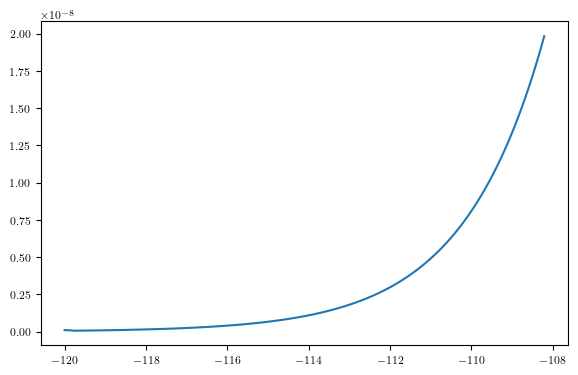

1000


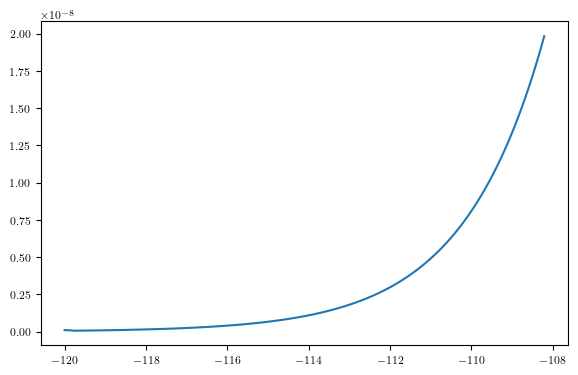

In [68]:
freqq = twofluid_c.nuz
n = 100
test = wkb_test(twofluid_c.nus, alpha_c)
plt.plot( alpha_c[:n], np.abs(test/freqq)[:n] )
plt.show()
print(len(alpha_c))

test = wkb_test(twofluid_c.nuz, alpha_c)
plt.plot( alpha_c[:n], np.abs(test/freqq)[:n] )

## Coupling Matrices

We now turn to explore the behavior of the coupling matrices $\gamma_{ij}, \tau_{ij}$. Recall that the Hamiltonian of our diagonalizing variables $\{ Q_{1}, Q_{2}, \Pi_{1}, \Pi_{2} \}$ is given by

\begin{equation}
  {\cal H} = \sum_{i=1}^{2}\left[  \frac{1}{2} \nu_{i}(P^{i})^{2} + \frac{1}{2}\nu_{i}(Q^{i})^{2}  \right] + \frac{1}{2}\sum_{i,j = 1}^{2}\left(  P^{i}\tau^{ij} - Q^{i}\gamma^{ij} \right)Q^{j}\, ,
\end{equation}

the associated equations of motion are then given by:

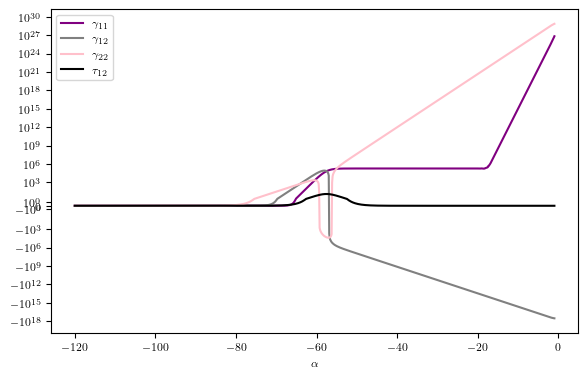

In [69]:
plt.plot(alpha_c, twofluid_c.gamma11, color='purple', label=r'$\gamma_{11}$')   # plot
plt.plot(alpha_c, twofluid_c.gamma12, color='grey', label=r'$\gamma_{12}$')   # plot
plt.plot(alpha_c, twofluid_c.gamma22, color='pink', label=r'$\gamma_{22}$')   # plot
plt.plot(alpha_c, twofluid_c.tau12, color='black', label=r'$\tau_{12}$')
plt.yscale('symlog')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In the above plot, one notices the relation

\begin{align}
   \text{ i) Early Past:} \, \, & \gamma_{11} < \gamma_{12} < \gamma_{22} \, , \\
   \text{ ii) Late Future:} \, \, & \gamma_{12} < \gamma_{11} < \gamma_{22} \, ,
\end{align}

which, is **mode independent**, since $\gamma_{ij} \sim k^{-2}$. The coordinate-momentum coupling $\tau_{ij} \sim k^{0} $ however, is mode independent. Therefore, one may estimate a critical $k$ value, $k_{\text{crit}}$, for which the $\tau_{ij}$ coupling is the dominant contribution in the late past. This shall be reproduced in the complete model during dust domination. We shall delay this idea until the complete 2 fluid model.

We now plot each component individually, to offer a different visualization.

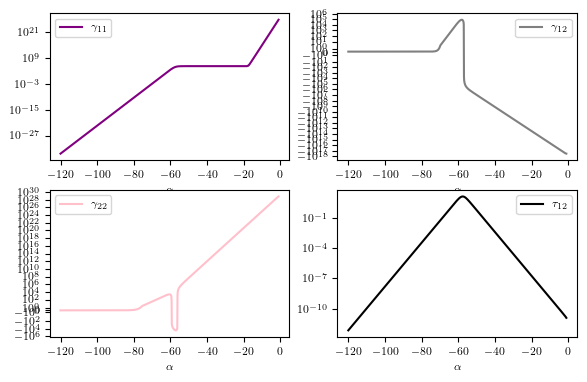

In [70]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, twofluid_c.gamma11, color='purple', label=r'$\gamma_{11}$')   # plot
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
#x1.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax1.set_yscale('log')

ax2.plot(alpha_c, twofluid_c.gamma12, color='grey', label=r'$\gamma_{12}$')   # plot
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('symlog')

ax3.plot(alpha_c, twofluid_c.gamma22, color='pink', label=r'$\gamma_{22}$')   # plot
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('symlog')

ax4.plot(alpha_c, twofluid_c.tau12, color='black', label=r'$\tau_{12}$')   # plot
ax4.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax4.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax4.set_yscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In the below cell we plot the behavior of the coupling matrices near the bounce. As previously discussed, they present discontinuities, which are associated to our choice of time in terms of the scale factor:

$$ \alpha(a) = \ln\left(\frac{a_{b}}{a}\right) $$

which implies that

$$ \epsilon = \frac{1}{NH} $$

is discontinuous near the bounce.

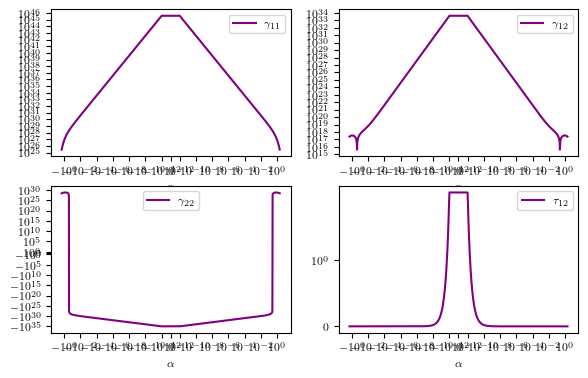

In [71]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_b, twofluid_b.gamma11, color='purple', label=r'$\gamma_{11}$')   # plot
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
ax1.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax1.set_yscale('symlog')


ax2.plot(alpha_b, np.abs(twofluid_b.gamma12), color='purple', label=r'$\gamma_{12}$')   # plot
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('symlog')

ax3.plot(alpha_b, twofluid_b.gamma22, color='purple', label=r'$\gamma_{22}$')   # plot
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('symlog')

ax4.plot(alpha_b, np.abs(twofluid_b.tau12), color='purple', label=r'$\tau_{12}$')   # plot
ax4.set_xlabel(r'$\alpha$')                                # sets the x legend
ax4.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax4.set_yscale('symlog')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

## Perturbative Quantities

### Approximate Solutions

We now proceed to numerically solve our equations of motion and interpret our results, which will be relevant to study the to be calculated power spectrum. However, due to the previously studied coupling behavior, it's also possible to obtain analytical solutions for some cases. Let's then solve the equations numerically, and compare the solutions with the analytical ones.

In [72]:
#return (alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2, Q11, Q21, Q12, Q22)
#integrate_system(cosmo,k):

k = 1e-3
twofluid_c = model_evol(twofluid,alpha_c,k)
test = integrate_system(twofluid,k)
alpha_evol = test[0]
zeta1 = test[1]
S1 = test[2]
zeta2 = test[3]
S2 = test[4]


Time evolution:   0%|                                   | 0/999 [00:00<?, ?it/s]
                                                                                

/home/luizdemetrio/miniforge3/envs/numcosmo_developer/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/luizdemetrio/miniforge3/envs/numcosmo_developer/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


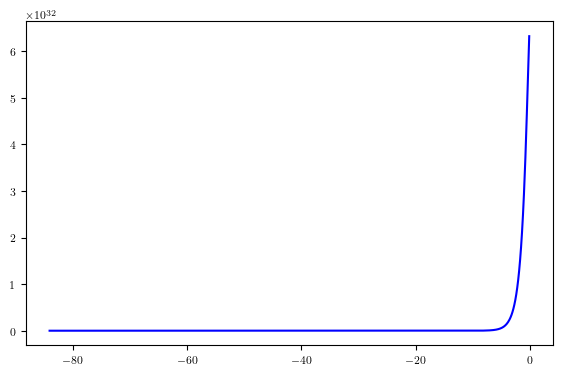

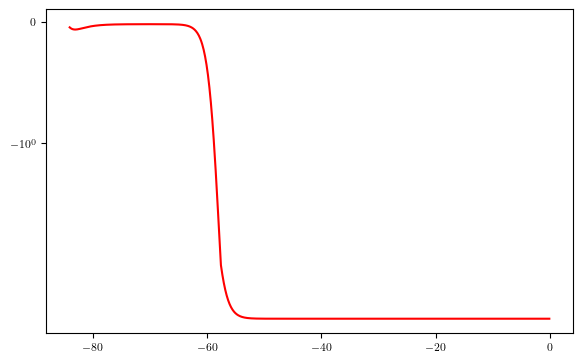

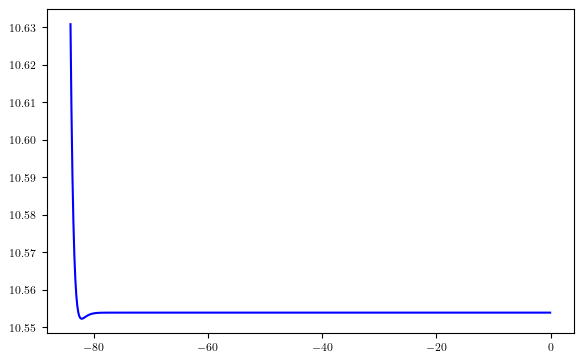

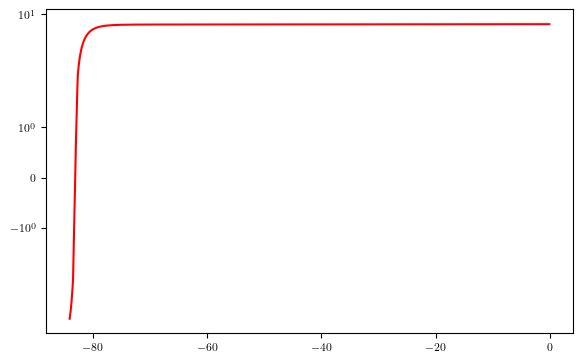

In [ ]:
plt.plot(alpha_evol, zeta1, color='blue')
plt.show()
plt.plot(alpha_evol, S1, color='red')
plt.yscale('symlog')
plt.show()

plt.plot(alpha_evol, zeta2, color='blue')
plt.show()
plt.plot(alpha_evol, S2, color='red')
plt.yscale('symlog')

#### Super-Hubble Solutions

We saw that, due to the coupling behavior, the equations of motion assume the form

\begin{align}
  & \text{Far Past  } \, \, \, \, & \\
 \ddot{\zeta} + \nu^{2}_{\zeta}\zeta & = -\aleph_{\zeta S}Q\, ;  \\
 \ddot{Q} + \nu^{2}_{S}Q & = 0 \, ; \\
 %
 & \text{Far Future } & \\
 \ddot{\zeta} + R_{H,\zeta}\dot{\zeta} & = \beth_{\zeta S}\dot{Q} \, ;  \\
 \ddot{Q} + R_{H,S}\dot{Q} & = 0 \, ,
\end{align}

One then sees that it would be possible to solve for the entropy mode $Q$, and then use said solution as an inhomogeneous term for the adiabatic equation of motion. Let's start by analyzing the super-Hubble limit. Using the fact that $R_{H S} = \hbox{const.} =\beta < 0$, and defining $x \equiv \dot{Q}$ we have:

$$ \dot{x} + \beta x = 0 $$
$$ \implies x(t) = Ae^{-\beta t} $$

with $A = x_{0}e^{-\beta t_{0}}$ . The general solution is then given by integrating the above result:

\begin{align}
 Q(\alpha) & = Q_{0} + \int_{\alpha_{0}}^{\alpha} \dot{Q}_{0}e^{-\beta(\alpha'-t_{0})}d\alpha'\, , \\
           & = \left( Q_{0} + \frac{\dot{Q}_{0}}{\beta} \right) -\frac{\dot{Q}_{0}}{\beta}e^ {-\beta(\alpha-\alpha_0)}  \, , \\
\end{align}

and saturates to the value

$$ Q(\alpha) =  Q_{0} + \frac{ \dot{Q}_{0} }{\beta}\, , $$

after $\alpha - \alpha_{0} > {2}/{\beta}$. Now, since for the radiation case we found $\beta = 2$, this amounts to $\alpha - \alpha_{0} > 1$.

We may now use the above solution for the entropy mode on the adiabatic equation of motion. In this case:

$$ \ddot{\zeta} + R_{H,\zeta}\dot{\zeta} = \beth_{\zeta S}\dot{Q}_{0}e^{-2(\alpha-\alpha_{0})}\, .$$

Recall that the coupling is explicitly given by

$$\beth_{\zeta S} = \frac{m_{S}}{m_{\zeta}}\frac{d}{dt}(m_{\zeta}Y)\, , $$

and that $R_{H S} = \frac{\dot{m}_{S}}{m_{S}} = +2 \implies m_{S}(\alpha) = m_{S0}e^{+2\alpha}, m_{S0} = e^{-2\alpha_{0}}$. Therefore

\begin{align} \beth_{\zeta S}\dot{Q}_{0}e^{-2(\alpha-\alpha_{0})} & = \frac{m_{S}}{m_{\zeta}}\frac{d}{dt}(m_{\zeta}Y)\frac{m_{S0}\dot{Q}_{0}}{m_{S}}\, \\
%
& = \frac{m_{S0}\dot{Q}_{0}}{m_{\zeta}}\frac{d}{dt}(m_{\zeta}Y)\, .\end{align}

Furthermore, the above equation can be integrated using the integrating factor technique:

\begin{align}
  \ddot{\zeta} + \frac{ \dot{m}_{\zeta} }{m_{\zeta}}\dot{\zeta} & = \frac{m_{S0}\dot{Q}_{0}}{m_{\zeta}}\frac{d}{dt}(m_{\zeta}Y)\, , \\
  %
  \implies m_{\zeta}\ddot{\zeta} + \dot{m}_{\zeta}\dot{\zeta} & = m_{S0}\dot{Q}_{0}\frac{d}{dt}(m_{\zeta}Y)\, , \\
  %
  \implies \frac{ d }{ dt }(m_{\zeta}\dot{\zeta}) & = m_{S0}\dot{Q}_{0}\frac{d}{dt}(m_{\zeta}Y)\, , \\
  %
  \implies m_{\zeta}\dot{\zeta} & = (m_{\zeta 0}\dot{\zeta}_{0} - m_{S0}\dot{Q_{0}}m_{\zeta 0}Y_{0} )+ m_{S0}\dot{Q}_{0}m_{\zeta}Y\, , \\
  %
  \implies \zeta & = \zeta_{0} + (m_{\zeta 0}\dot{\zeta}_{0} - m_{S0}\dot{Q_{0}}m_{\zeta 0}Y_{0} )\int^{t}_{t_{0}}\frac{dt}{m_{\zeta}} + m_{S0}\dot{Q}_{0}\int^{t}_{t_0} Y dt\, , \\
\end{align}

(ABOVE IS VALID ONLY WAY AFTER TRANSITION, WHEN $R_{H\ell} \approx \dot{m}_{\ell}/m_{\ell}$, NEED TO CONSIDER MORE GENERAL CASE)

In this case, however, $\beta_{\zeta} = -1 < 0$, therefore, the solution is given by

$$ \zeta(\alpha) = \left(\alpha_{0} - 1\right) + e^{(\alpha - \alpha_{0})}\, , $$

which is an ever increasing exponential, that does not saturate. In fact, due to the saturation, after $\alpha - \alpha_{0} > 1, \dot{Q}(\alpha) \approx 0$, so that the entropy mode does not affect the adiabatic mode anymore, which follows a natural exponential amplification.

As for the past sub-Hubble phase

\begin{align}
 \ddot{\zeta} + \nu^{2}_{\zeta}\zeta = -\aleph_{\zeta S}Q\, , \\
 \ddot{Q} + \nu^{2}_{S}Q = 0\, ,
\end{align}

a similar behavior occurs, with the entropy mode influenting the adiabatic one but not the contrary. In this case however, due to the non-trivial nature of the frequencies $\nu^{2}_{\ell}$, a general solution may not be found. One can however use a WKB approximation to solve for the entropy mode, and then use the WKB solution as an inhomogeneous contribution to the adiabatic one. The solutions in this case are then going to be given by

\begin{align}
 Q(\alpha) & = Q_{\text{WKB}}(\alpha) \, , \\
 \zeta(\alpha) & = \zeta_{\text{WKB}}(\alpha) + \zeta_{p}(\alpha) \, ,
\end{align}

where $\zeta_{p}(\alpha)$ is a particular solution of the adiabatic equation of motion with a WKB inhomogeneity. Although those solutions are only approximate, they enable one to impose definite initial conditions on the system, which in turn means an adiabatic vacuum state can be used for quantization.

$Y, \dot{Y}$ are of same order, $Y \sim \sin 2\phi, \dot{\phi} \sim \sin 2\phi$.

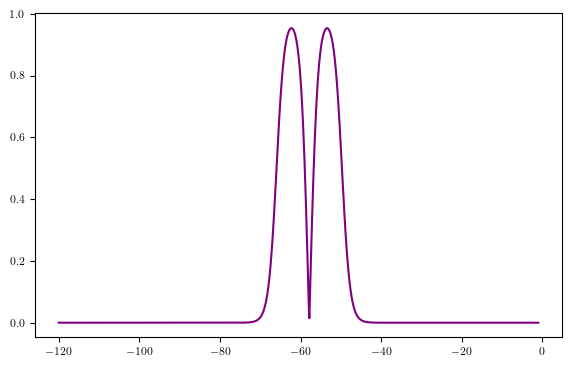

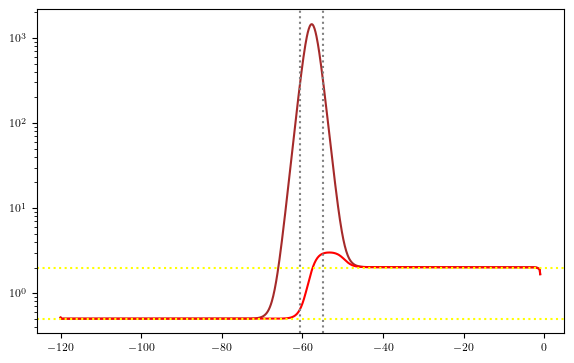

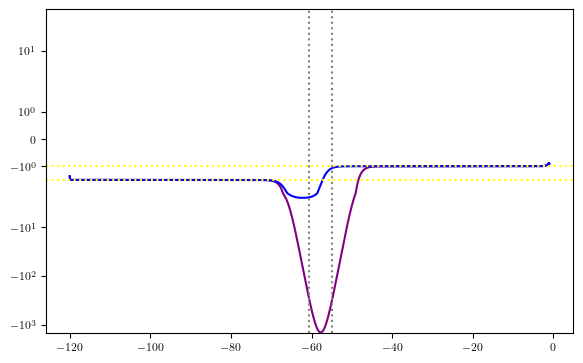

In [ ]:
d = np.gradient( twofluid_c.y, twofluid_c.time )

#plt.plot(twofluid_c.time, np.abs(d)  , color='black' )
#plt.plot(twofluid_c.time, np.abs(twofluid_c.y)  , color='brown' )
plt.plot(twofluid_c.time, np.abs(d * twofluid_c.y * twofluid_c.mz * twofluid_c.ms)  , color='purple' )
plt.show()

#plt.plot(twofluid_c.time, np.abs(twofluid_c.y) )
plt.plot(twofluid_c.time, twofluid_c.Rh_s, color='brown' )
plt.plot(twofluid_c.time, np.gradient( twofluid_c.ms, twofluid_c.time )/twofluid_c.ms, color='red' )
#plt.plot(twofluid_c.time, np.abs(d * twofluid_c.y * twofluid_c.mz * twofluid_c.ms)  , color='purple' )
plt.axvline( x = twofluid_c.trans()[0], linestyle=':', color='grey')
plt.axvline( x = twofluid_c.trans()[1], linestyle=':', color='grey')
plt.axhline( y = 1/2, linestyle=':', color='yellow')
plt.axhline( y = 2, linestyle=':', color='yellow')
plt.yscale('log')

n = 10
#print(twofluid_c.y[:n])
#print(d[:n])

plt.show()

#plt.plot(twofluid_c.time, np.abs(twofluid_c.y) )
plt.plot(twofluid_c.time, twofluid_c.Rh_z, color='purple' )
plt.plot(twofluid_c.time, np.gradient( twofluid_c.mz, twofluid_c.time )/twofluid_c.mz, color='blue' )
#plt.plot(twofluid_c.time, np.abs(d * twofluid_c.y * twofluid_c.mz * twofluid_c.ms)  , color='purple' )
plt.axvline( x = twofluid_c.trans()[0], linestyle=':', color='grey')
plt.axvline( x = twofluid_c.trans()[1], linestyle=':', color='grey')
plt.axhline( y = -1, linestyle=':', color='yellow')
plt.axhline( y = -3/2, linestyle=':', color='yellow')
plt.yscale('symlog')

In [ ]:
k = 1e-3
twofluid_c = model_evol(twofluid,alpha_c,k)
test = integrate_system(twofluid,k)
alpha_evol = test[0]
zeta1 = test[1]
S1 = test[2]
zeta2 = test[3]
S2 = test[4]


Time evolution:   0%|                                   | 0/999 [00:00<?, ?it/s]
                                                                                

In [ ]:
#plt.plot(alpha_evol[j:], m )
n = 20
plt.plot(alpha_evol[j:], np.abs(prim( np.exp(m) , alpha_evol[j:] ) ) )
plt.yscale('log')

NameError: name 'j' is not defined

In [ ]:
j = 20
m = np.linspace(-2,4,len(alpha_evol[j:]))
test = np.abs( prim( m , alpha_evol[j:]  ) )

plt.plot(alpha_evol[j:], np.abs(test) )


In [ ]:
twofluid_c = model_evol(twofluid,alpha_evol,k)
t0 = twofluid_c.cross_sb() + 20
for i in range(len(alpha_evol)):
  dif = np.abs(alpha_evol - t0)
  if dif[i] == np.min(dif):
    j = i
    s10 = S1[i]
    s20 = S2[i]
    q10 = np.gradient(S1,alpha_evol)[i]
    q20 = np.gradient(S2,alpha_evol)[i]
    t_nice = alpha_evol[i]

    break


#beta = 2
#test1 = (s10 + q10/beta ) - (q10/beta) * np.exp( -beta * ( alpha_evol - t_nice ) )
#test2 = (s20 + q20/beta ) - (q20/beta) * np.exp( -beta * ( alpha_evol - t_nice ) )

m = prim( twofluid_c.Rh_s[j:] , alpha_evol[j:])
#test1 = s10 + q10 * prim( np.exp(-m) , alpha_evol[j:])
#test2 = s20 + q20 * prim( np.exp(-m) , alpha_evol[j:])
test1 = q10 * np.exp(-m)
test2 = q20 * np.exp(-m)

print('approx derivative1: '+str( np.gradient(test1, alpha_evol[j:])[0] ))
print('approx derivative2: '+str( np.gradient(test2, alpha_evol[j:])[0] ))

print('TRUE derivative1: '+str( np.gradient(S1, alpha_evol)[j] ))
print('TRUE derivative2: '+str( np.gradient(S2, alpha_evol)[j] ))

print(r'j = '+str(j)+r' => α = '+str(alpha_evol[j]))
print('init value1'+str(s10))
print('approx init value1'+str(test1[0]))

#print(S1[-1])
#print(test1[-1])
print(' FINAL: '+str(S1[-1])+' , '+str(test1[-1]))
print('CROSSING TIME: '+str(twofluid_c.cross_s()))

print('----------------------------')

print('init value2:'+str(s20))
print('approx init value2'+str(test2[0]))
print(' FINAL: '+str(S2[-1])+' , '+str(test2[-1]))

plt.plot(alpha_evol, np.gradient(S1,alpha_evol), color='blue', label='Cond1')
plt.plot(alpha_evol[j:], test1, color='indigo', label='approx1', linestyle='--')
plt.yscale('symlog')
plt.axvline(x=t_nice, color='black', linestyle='--')
plt.axvline(x=twofluid_c.cross_s(), color='yellow', linestyle=':')
plt.axvline(x=twofluid_c.cross_sb(), color='brown', linestyle=':')
#plt.xlim(-40 , -1)
plt.show()

plt.plot(alpha_evol, np.gradient(S2,alpha_evol), color='red', label='Cond2')
plt.plot(alpha_evol[j:], test2, color='purple', label='approx2', linestyle='--')
plt.axvline(x=t_nice, color='black', linestyle='--')
plt.axvline(x=twofluid_c.cross_s(), color='yellow', linestyle=':')
plt.axvline(x=twofluid_c.cross_sb(), color='brown', linestyle=':')
#plt.plot(alpha_evol, S1, color='orange', label='approx1', linestyle='--')
plt.yscale('symlog')

plt.show()

plt.plot(alpha_evol, twofluid_c.Rh_s, color='red')
plt.plot(alpha_evol, np.abs(twofluid_c.beth_sz), color='purple')
plt.plot(alpha_evol, twofluid_c.nus ** 2, color='blue', linestyle='--')
plt.axvline(x=t_nice, color='black', linestyle='--')
plt.axvline(x=twofluid_c.cross_s(), color='yellow', linestyle=':')
plt.axvline(x=twofluid_c.cross_sb(), color='brown', linestyle=':')
plt.yscale('log')

In [ ]:
def integral(y,x):
  def integrand(xi):
    for i in range(len(x)):
      if xi == x[i]:
        return y[i]
        break


  values = []
  for i in range(len(x)):
    print(i)
    values.append( quad(integrand,x[0],x[i])[0] )
    print(values)
  return np.array(values)

In [ ]:
plt.plot(x,x**2/2)
plt.plot(x,integral(x,x))

In [ ]:
def integrand(x):
  return x**3/3

for i in range(8):
 result = quad(integrand,0,i)[0]
 print(result)

In [ ]:
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)

def integrand(xi):
    for i in range(len(x)):
      if x[i] == xi:
        print('BREAK')
        return y[i]
      #return y[i]

#def integrand(x):
#  return x**3/3

values = []
for i in range(len(x)):
  print(i)
  values.append( quad(integrand,x[0],x[i])[0] )
print(values)

In [ ]:
x = np.linspace(-5,5,100)
y = np.exp(x)
f = x**2/2
#f = np.exp(x)

print(f[2], (prim(x,x) + f[0])[2] )

plt.plot(x, f, color='blue')
plt.plot(x, prim(x,x) + f[0], color='red', linestyle='--')
#x0 = x[0]

plt.show()

g = x**3
#g = np.exp(x)
plt.plot(x, g, color='blue')
plt.plot(x, prim( prim(x,x) + f[0], x) + g[0], color='red', linestyle='--' )
#plt.plot(x, prim( prim(x,x), x ) + (x0**2/2) * x - x0**3/6 + x0**3/2, color='red', linestyle='--' )
plt.show()

plt.plot(x,g, color='blue' )
plt.plot(x, prim( 3*(x**2), x ) + g[0], color='red', linestyle='--')

In [ ]:
x = np.linspace(-5,5,100)
f = x**2/2

test = np.gradient(f,x)
testt = (x**3)/6

blah = prim( prim(x,x), x )

final = np.gradient( blah, x )

#plt.plot(x,x, color='blue')
#plt.plot(x,f, color='red')
plt.plot(x, blah + testt[0], color='purple', linestyle='--')
plt.plot(x, testt ,color='black')
#plt.plot(x, final/2, color='olive')
#plt.plot(x, np.gradient(testt, x), color='yellow', linestyle='--')
#plt.plot(x,test,color='yellow')

plt.show()

In [ ]:
print( np.log10( np.abs( twofluid_c.beth_sz[j] ) ) )

plt.plot(alpha_c, np.abs( twofluid_c.aleph_sz ), color='red')
plt.plot(alpha_c, np.abs( twofluid_c.Rh_s ), color='black')
plt.plot(alpha_c, np.abs( twofluid_c.beth_sz ), color='purple')
plt.axvline(x = t0, color='black', linestyle=':')
plt.axhline(y = twofluid_c.beth_sz[j], color='black', linestyle=':')
plt.axvline(x = twofluid_c.cross_s(), color='yellow', linestyle=':')
#plt.axhline(y=1e-5, color='black', linestyle=':')
plt.yscale('log')
plt.ylim(0 , 1e5)
plt.show()

In [ ]:
print( np.abs( twofluid_c.beth_sz[j] ) * np.abs( np.gradient(zeta1,alpha_c)[j])  )

print( np.abs( np.gradient(zeta1,alpha_c)[j] ) )
print( np.abs(twofluid_c.beth_sz[j]) )
print( np.abs( np.gradient( np.gradient(S1,alpha_c), alpha_c) )[j] )
print( np.abs( twofluid_c.nus**2 * np.gradient(S1,alpha_c) )[j] )

plt.plot(alpha_evol, zeta1, color='blue')
plt.yscale('symlog')
plt.show()
plt.plot(alpha_evol, S1, color='red')
plt.yscale('symlog')
plt.show()

#### WKB solutions?

In [ ]:
k = 1e4

alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2, Q11, Q21, Q12, Q22 = integrate_system(twofluid, k)
twofluid_k = model_evol(twofluid, alpha_evol, k)

In [ ]:
def integral(f,x):
  value_list = []
  for i in range(len(x)):
    value = np.trapz(f[:i], x[:i])
    value_list.append(value)
  return np.array(value_list)

def WKB(freq2,t, x0, v0):
  freq = np.sqrt(freq2)
  w0 = freq[0]
  dwdt0 = np.gradient(freq,t)[0]
  C1 = x0 * np.sqrt( w0 )
  C2 = ( 1/np.sqrt(w0) ) * ( ( dwdt0 / (2 * w0) ) * x0 +  v0 )

  f0 = C1/np.sqrt(w0)
  df0 = -( dwdt0/ (2 * w0**(3/2)) ) * C1 + np.sqrt(w0) * C2
  print(f0)
  print(df0)

  wkb =  (1 / np.sqrt(freq) ) * (C1 * np.cos(integral(freq, t) ) + C2 * np.sin(integral(freq, t))  )

  return wkb

def wkb_test(freq2,t):
  freq = np.sqrt(freq2)
  result = (3/4) * ( np.gradient(freq,t) / freq ) ** 2 - (1/2) * ( ( np.gradient( np.gradient(freq,t), t ))/ freq )
  return result

In [ ]:
#del(j)
def WKB(freq2,t, x0, v0):
  j = 1j
  freq = np.sqrt(freq2)
  w0 = freq[0]
  dwdt0 = np.gradient(freq,t)[0]
  #C1 = 1/2 * ( np.sqrt(w0) * x0 - v0/np.sqrt(w0)*j )    # constants are wrong, took the wrong derivative
  #C2 = 1/2 * ( np.sqrt(w0) * x0 + v0/np.sqrt(w0)*j )

  C1 = (1/2) * ( x0 * np.sqrt(w0) + ( v0 + dwdt0/(2 * w0) * x0 ) * (-j/np.sqrt(w0)) )
  C2 = (1/2) * ( x0 * np.sqrt(w0) + ( v0 + dwdt0/(2 * w0) * x0 ) * (j/np.sqrt(w0)) )

  # the derivative is not correct. don't know if the problem is numerical or with my calculations

  f0 = (C1 + C2)/np.sqrt(w0)
  df0 = np.sqrt(w0) * (C1 - C2)*j - dwdt0/(2 * w0) * f0
  print(f0)
  print(df0)

  wkb =  (1 / np.sqrt(freq) ) * (C1 * np.exp(prim(freq, t)*j ) + C2 * np.exp(-prim(freq, t)*j )  )

  return wkb

In [ ]:
wkb = WKB(twofluid_k.nus**2, alpha_evol, S2[0], np.gradient(S2,alpha_evol)[0])

print('-----------')


print(wkb[0])
print(np.gradient(wkb,alpha_evol)[0])

print('-----------')

print(S2[0])
print(np.gradient(S2,alpha_evol)[0])

In [ ]:
t = alpha_evol
test = t**2/2
plt.plot(t,test, color='blue')
plt.plot(t,prim(t,t), color='red')

In [ ]:
n = 50
plt.plot(alpha_evol[:n], (S2)[:n], color='blue', label='$S_{2}$')
plt.plot(alpha_evol[:n], (wkb[:n]), color='red', linestyle='--', label='$S_{WKB}$')
plt.yscale('symlog')
plt.legend()
plt.show()

In [ ]:
plt.plot(alpha_evol[:n], wkb_test( (twofluid_k.nuz**2)[:n] , alpha_evol[:n]))

### Mode Analysis

In this section we discuss the behavior of various numerical solutions to the perturbative equations. We then interpret their behavior based on the previous discussion about the various couplings of our system.

In [ ]:
#k_list = [1e-4, 1, 1e4]
k_list = [1e-8, 1e-4, 1e-2, 1, 1e2, 1e4, 1e8]
#k_list = [1e-3, 1e-1, 1 * 100, 1e3 * 100]
#k_list = [1e-3]
alpha_c = np.geomspace(-120,-1,100)

for k_value in k_list:
  twofluid_k = model_evol(twofluid, alpha_c, k_value)

  k_other = [k_value * 1e-2, k_value,  k_value * 1e2 ]
  #k_other = [1]

  r = 3
  c = 2
  fig, ax = plt.subplots(r,c, figsize=(8, 12))

  ax[2,0].plot(alpha_c, twofluid_k.nuz ** 2, label = r'$\nu^{2}_{\zeta}$', color='blue')
  ax[2,0].plot(alpha_c, np.abs(twofluid_k.Rh_z), label=r'$R_{H\zeta}$', color='purple')
  ax[2,0].plot(alpha_c, np.abs(twofluid_k.aleph_zs), label=r'$\aleph_{\zeta S}$', color='indigo')
  ax[2,0].plot(alpha_c, np.abs(twofluid_k.beth_zs), label=r'$\beta_{\zeta S}$', color='violet')
  ax[2,0].set_title(r'$\nu^{2}_{\zeta}, R_{H\zeta}, \aleph_{\zeta S}, \beta_{\zeta S}$')

  ax[2,1].plot(alpha_c, twofluid_k.nus ** 2, label = r'$\nu^{2}_{S}$', color='red')
  ax[2,1].plot(alpha_c, twofluid_k.Rh_s, label=r'$R_{H S}$', color='orange')
  ax[2,1].plot(alpha_c, np.abs(twofluid_k.aleph_sz), label=r'$\aleph_{S\zeta}$', color='green')
  ax[2,1].plot(alpha_c, np.abs(twofluid_k.beth_sz), label=r'$\beta_{S\zeta}$', color='purple')
  ax[2,1].set_title(r'$\nu^{2}_{S}, R_{H S}, \aleph_{S\zeta}, \beta_{S\zeta}$')

  for i in range(r):
    for j in range(c):
      if j == 0:
        ax[i,j].axvline(x = twofluid_k.cross_z(), color='black', linestyle='--', label=r'$t^{\zeta}_{ \hbox{cross} }$ = ' + f"{twofluid_k.cross_z():.2e}" ) # f"{k:.2e}
      else:
        ax[i,j].axvline(x = twofluid_k.cross_s(), color='black', linestyle='--', label=r'$t^{S}_{ \hbox{cross} }$ = ' + f"{twofluid_k.cross_s():.2e}" )
      if i < 2:
        ax[i,j].set_yscale('symlog')
        ax[i,j].axvline(x = twofluid_k.eq(), color='pink', linestyle=':', label=r'$m_{\zeta} \approx m_{S}$' )
      else:
        ax[i,j].set_yscale('log')
      ax[i,j].axvline(x = twofluid_k.trans()[0], color='grey', linestyle=':')
      ax[i,j].axvline(x = twofluid_k.trans()[1], color='grey', linestyle=':', label=r'Transition' )
      ax[i,j].set_xlabel(r'$\alpha$')

  for k in k_other:
    alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2 = integrate_system(twofluid, k)

    ax[0,0].plot(alpha_evol, np.real( zeta1 ) , label=f"{k:.2e}")                          # adiabatic modes are amplified because the adiabatic mass decresas exponentially
    ax[0,1].plot(alpha_evol, np.real( S1 ), label=f"{k:.2e}")

    ax[1,0].plot(alpha_evol, np.real( zeta2 ), label=f"{k:.2e}")                          # adiabatic modes are amplified because the adiabatic mass decresas exponentially
    ax[1,1].plot(alpha_evol, np.real( S2 ), label=f"{k:.2e}")


  print('k ~ '+str(k_value))

  ax[0,0].set_title(r'$\zeta_{1}$')
  ax[0,1].set_title(r'$S_{1}$')
  ax[1,0].set_title(r'$\zeta_{2}$')
  ax[1,1].set_title(r'$S_{2}$')
  for i in range(r):
    for j in range(c):
      ax[i,j].legend()

  plt.show()

  #print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

1. It appears that $\beth_{S\zeta}$ induces oscillations on the entropy mode $S$. Therefore, a proper super-Hubble is characterized for $S$ only if $\nu^{2}_{S} < R_{H S}$ and $\beth_{S\zeta} < R_{H S}$. However, this applies only to initial condition 1. Initial condition 2 oscillates way less than the first one.

## Sandro's functions

In [73]:
def integrate_mode1(k, max_time=-1.0):
    # Defining relative tolerance for integration
    prec = 1.0e-7
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-13

    pert = Nc.HIPertTwoFluids.new()
    pert.set_stiff_solver(True)
    pert.props.reltol = prec
    pert.set_mode_k(k)
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)
    ci = Ncm.Vector.new(8)
    alphai = pert.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, cross_size)
    pert.get_init_cond_zetaS(cosmo, alphai, 1, 0.25 * math.pi, ci)
    pert.set_init_cond(cosmo, alphai, 1, False, ci)

    res = pert.evolve_array(cosmo, max_time)
    res_a = np.array(res.dup_array()).reshape(-1,9)

    return res_a

def integrate_mode2(k, max_time=-1.0):
    # Defining relative tolerance for integration
    prec = 1.0e-7
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-5

    pert = Nc.HIPertTwoFluids.new()
    pert.set_stiff_solver(True)
    pert.props.reltol = prec
    pert.set_mode_k(k)
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)
    ci = Ncm.Vector.new(8)
    alphai = pert.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try, cross_size)
    pert.get_init_cond_zetaS(cosmo, alphai, 2, 0.25 * math.pi, ci)
    pert.set_init_cond(cosmo, alphai, 2, False, ci)

    res = pert.evolve_array(cosmo, max_time)
    res_a = np.array(res.dup_array()).reshape(-1,9)

    return res_a

In [74]:
pert = Nc.HIPertTwoFluids.new()

In [75]:
pert.evolve

gi.FunctionInfo(evolve, bound=<NumCosmo.HIPertTwoFluids object at 0x7f1c7db0e940 (NcHIPertTwoFluids at 0x55b22003bce0)>)

In [76]:
res1_a = integrate_mode1(1.0e8, -1.0)
res2_a = integrate_mode2(1.0e8, -1.0)

AttributeError: 'HIPertTwoFluids' object has no attribute 'evolve_array'

## Power Spectrum

In [77]:
def get_zeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.ZETA_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.ZETA_I)

def get_S(v):
    return v.get(Nc.HIPertITwoFluidsVars.S_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.S_I)

def get_Pzeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.PZETA_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.PZETA_I)

def get_PS(v):
    return v.get(Nc.HIPertITwoFluidsVars.PS_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.PS_I)


def spec_params(Omegars = 1.0e-5, w = 1.0e-3, E0 = 1.0):
    cosmo.props.w = w
    cosmo.props.Omegar = E0 * Omegars
    cosmo.props.Omegaw = E0 * (1.0 - Omegars)

    pert = Nc.HIPertTwoFluids.new()
    pert.props.reltol = 1.0e-9

    spec1 = pert.compute_zeta_spectrum(cosmo, 1, -cosmo.abs_alpha(1.0e-14), -1.0, 1.0e-3, 1.0e14, 100)
    spec2 = pert.compute_zeta_spectrum(cosmo, 2, -cosmo.abs_alpha(1.0e-14), -1.0, 1.0e-3, 1.0e14, 100)

    return spec1, spec2

specs1 = []
specs2 = []
for Omegars in np.geomspace(1.0e-2, 1.0e-8, 10):
#for E0 in np.geomspace(1.0e-1, 1.0e1, 10):

    spec1, spec2 = spec_params(Omegars, 1.0e-5, 1.0)
    specs1.append(spec1)
    specs2.append(spec2)


AttributeError: 'HIPertTwoFluids' object has no attribute 'compute_zeta_spectrum'

In [ ]:
pert = Nc.HIPertTwoFluids.new()

In [ ]:
def integrate_system(k):
    # Defining relative tolerance for integration
    prec = 1.0e-10
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-9

    # New perturbations object
    pert1 = Nc.HIPertTwoFluids.new()
    pert2 = Nc.HIPertTwoFluids.new()
    # Setting reltol
    pert1.props.reltol = prec
    pert2.props.reltol = prec
    # Setting k
    pert1.set_mode_k(k)
    pert2.set_mode_k(k)

    # Choose an initial condition
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)

    # New vector to store initial conditions
    # 8 dimensional (Q_1, Q_2, P_1, P_2), real and imaginary parts
    ci1 = Ncm.Vector.new(8)
    ci2 = Ncm.Vector.new(8)

    alphai1 = pert1.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, cross_size)
    alphai2 = pert2.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try, cross_size)

    # Compute initial conditions at alpha_try store at ci and use normalization factor
    # pi/4
    pert1.get_init_cond_zetaS(cosmo, alphai1, 1, 0.25 * math.pi, ci1)
    pert2.get_init_cond_zetaS(cosmo, alphai2, 2, 0.25 * math.pi, ci2)

    # Use the previously computed initial conditions to start the system at alpha_try
    pert1.set_init_cond(cosmo, alphai1, 30, False, ci1)
    pert2.set_init_cond(cosmo, alphai2, 30, False, ci2)
    # print(f"Setting initial conditions for zeta1 and S1 at {alphai1}")
    # print(f"Setting initial conditions for zeta2 and S2 at {alphai2}")

    if alphai2 > alphai1:
        pert1.evolve(cosmo, alphai2)
        ci1, _ = pert1.peek_state(cosmo)
    else:
        pert2.evolve(cosmo, alphai1)
        ci2, _ = pert2.peek_state(cosmo)

    alphai = max(alphai1, alphai2)

    # Create a array of times to integrate the system over
    alpha_evol = np.linspace(alphai, -1.0e-1, 1000)

    # Integrate the system by stepping through alpha_evol using .evolve
    zeta1_a = [get_zeta(ci1)]
    S1_a = [get_S(ci1)]
    Pzeta1_a = [get_Pzeta(ci1)]
    PS1_a = [get_PS(ci1)]

    zeta2_a = [get_zeta(ci2)]
    S2_a = [get_S(ci2)]
    Pzeta2_a = [get_Pzeta(ci2)]
    PS2_a = [get_PS(ci2)]

    for alpha in tqdm(alpha_evol[1:], desc="Time evolution", position=1, leave=False):
        pert1.evolve(cosmo, alpha)
        pert2.evolve(cosmo, alpha)
        v1, _alphac1 = pert1.peek_state(cosmo)
        v2, _alphac2 = pert2.peek_state(cosmo)

        zeta1_a.append(get_zeta(v1))
        S1_a.append(get_S(v1))
        Pzeta1_a.append(get_Pzeta(v1))
        PS1_a.append(get_PS(v1))

        zeta2_a.append(get_zeta(v2))
        S2_a.append(get_S(v2))
        Pzeta2_a.append(get_Pzeta(v2))
        PS2_a.append(get_PS(v2))

    zeta1 = np.array(zeta1_a)
    S1 = np.array(S1_a)
    Pzeta1 = np.array(Pzeta1_a)
    PS1 = np.array(PS1_a)

    zeta2 = np.array(zeta2_a)
    S2 = np.array(S2_a)
    Pzeta2 = np.array(Pzeta2_a)
    PS2 = np.array(PS2_a)

    return (alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2)

In [ ]:
alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2 = integrate_system(1.0)


Time evolution:  91%|█████████████████████  | 914/999 [00:00<00:00, 9130.71it/s]
                                                                                

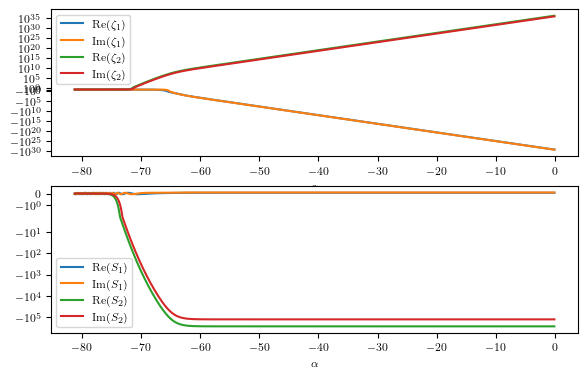

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

ax1.plot(alpha_evol, np.real(zeta1), label=r'$\mathrm{Re}(\zeta_1)$')
ax1.plot(alpha_evol, np.imag(zeta1), label=r'$\mathrm{Im}(\zeta_1)$')
ax1.plot(alpha_evol, np.real(zeta2), label=r'$\mathrm{Re}(\zeta_2)$')
ax1.plot(alpha_evol, np.imag(zeta2), label=r'$\mathrm{Im}(\zeta_2)$')
ax1.set_yscale('symlog')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_evol, np.real(S1), label=r'$\mathrm{Re}(S_1)$')
ax2.plot(alpha_evol, np.imag(S1), label=r'$\mathrm{Im}(S_1)$')
ax2.plot(alpha_evol, np.real(S2), label=r'$\mathrm{Re}(S_2)$')
ax2.plot(alpha_evol, np.imag(S2), label=r'$\mathrm{Im}(S_2)$')
ax2.set_yscale('symlog')
ax2.set_xlabel(r'$\alpha$')
ax2.legend()


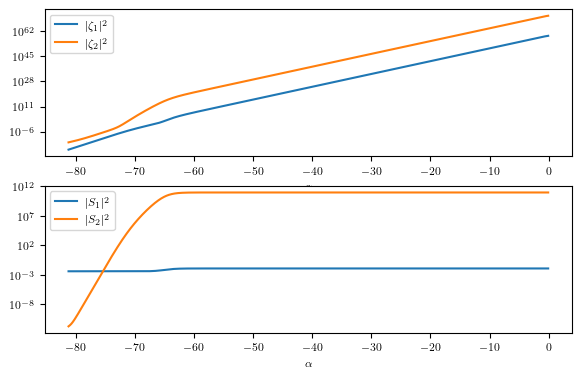

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

ax1.plot(alpha_evol, np.abs(zeta1)**2, label=r'$|\zeta_1|^2$')
ax1.plot(alpha_evol, np.abs(zeta2)**2, label=r'$|\zeta_2|^2$')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_evol, np.abs(S1)**2, label=r'$|S_1|^2$')
ax2.plot(alpha_evol, np.abs(S2)**2, label=r'$|S_2|^2$')
ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

pass

In [ ]:
k_a = np.geomspace(1.0e-3, 1.0e3, 100)

PI_zeta1 = []
PI_zeta2 = []
PI_S1 = []
PI_S2 = []

for k in tqdm(k_a, desc= "Mode evolution", position=0):
    alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2 = integrate_system(k)
    PI_zeta1.append(np.abs(zeta1[-1])**2)
    PI_zeta2.append(np.abs(zeta2[-1])**2)
    PI_S1.append(np.abs(S1[-1])**2)
    PI_S2.append(np.abs(S2[-1])**2)

Mode evolution:  18%|████▋                     | 18/100 [03:28<15:48, 11.56s/it]


KeyboardInterrupt: 

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

ax1.plot(k_a, k_a**3 * PI_zeta1, label=r'$\Pi_{\zeta_1}$')
ax1.plot(k_a, k_a**3 * PI_zeta2, label=r'$\Pi_{\zeta_2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$k$')
ax1.legend()

ax2.plot(k_a, k_a**3 * PI_S1, label=r'$\Pi_{S_1}$')
ax2.plot(k_a, k_a**3 * PI_S2, label=r'$\Pi_{S_2}$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$k$')
ax2.legend()

pass

# Symmetric case, $w = 10^{-4}$ Analysis

## Defining the Model

In [ ]:
k_a = np.geomspace(1.0e-3, 1.0e3, 100)
#k_a = np.geomspace(1.0e-3, 1.0e3, 15)
alpha_new = np.linspace(min_alpha_c, max_alpha_c, 100)
alpha_c = alpha_new
cosmosym = Nc.HICosmoQGRW()                                    # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

# these lines set the relevant cosmological parameters
cosmosym.props.w = 1.0e-4                                      # dust/dark matter equation of state
cosmosym.props.Omegar = 1.0 * (1.0e-5)                         # radiation abundance today
cosmosym.props.Omegaw = 1.0 * (1.0 - 1.0e-5)                   # dust/dark matter abundance today
cosmosym.props.xb = 1.0e31                                     # inverse scale factor x=1/a at the time of the bounce

In [ ]:
k = 1.0
sym = model_evol(cosmosym,alpha_c,k)      # evolves the equations of motion for during the contraction phase
sym_b = model_evol(cosmosym,alpha_b,k)      # evolves the equations of motion close to the bounce

We now extract the relevant quantities by applying the above defined functions.

In [ ]:
# Extracts the mass of the adiabatic and entropy modes
cos2phi_sym = cos2phi(sym)
sin2phi_sym = sin2phi(sym)
y_sym = y(sym)
mz_sym= mz(sym)                    # extracts the mz parameter
ms_sym = ms(sym)                    # extracts the ms parameter
mnu2_z_sym = mnu2_z(sym)
mnu2_s_sym = mnu2_s(sym)
nu_1_sym = nu1(sym)
nu_2_sym = nu2(sym)
nu_z_sym = nu_z(sym)
nu_s_sym = nu_s(sym)

# coupling matrices
gamma11_sym = gamma11(sym)
gamma12_sym = gamma12(sym)
gamma22_sym = gamma22(sym)
tau12_sym = tau12(sym)

In [ ]:
# Extracts the mass of the adiabatic and entropy modes
cos2phi_sym_b = cos2phi(sym_b)
sin2phi_sym_b = sin2phi(sym_b)
mz_sym_b= mz(sym_b)                    # extracts the mz parameter
ms_sym_b = ms(sym_b)                    # extracts the ms parameter
mnu2_z_sym_b = mnu2_z(sym_b)
mnu2_s_sym_b = mnu2_s(sym_b)
nu_1_sym_b = nu1(sym_b)
nu_2_sym_b = nu2(sym_b)
nu_z_sym_b = nu_z(sym_b)
nu_s_sym_b = nu_s(sym_b)

# coupling matrices
gamma11_sym_b = gamma11(sym_b)
gamma12_sym_b = gamma12(sym_b)
gamma22_sym_b = gamma22(sym_b)
tau12_sym_b = tau12(sym_b)

In [ ]:
t_list = []
for i in range(len(cos2phi_sym)):
  d = np.sqrt( (cos2phi_sym[i] - sin2phi_sym[i] )**2 )
  if d < 0.9:
    print(cos2phi_sym[i])
    print(sin2phi_sym[i])
    print('i = '+str(i))
    #print(alpha_c[i])
    print(d)
    t_list.append(alpha_c[i])

t1 = t_list[0]
t2 = t_list[-1]

In [ ]:
plt.plot(alpha_c, cos2phi_sym, color='blue', label=r'$\cos^{2}\phi$')
plt.plot(alpha_c, sin2phi_sym, color='red', label=r'$\sin^{2}\phi$')
#plt.axvline(x = -58, color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
plt.axvline(x = t1, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
plt.axvline(x = t2, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

## Mass Analysis

The above plots make it hard to direcly compare the masses $m_{s}, m_{\zeta}$, for their scales are way too different. To remedy this, we now repeat the above plots in a logarithmic scale.

In [ ]:
d = np.sqrt( (( ms_sym - mz_sym ) / mz_sym )**2 )
for i in range(len(d)):
  if d[i] == np.min(d):
    ts = alpha_c[i]

set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, mz_sym, c='b', label=r'$m_\zeta$')    # plots mz
ax1.plot(alpha_c, ms_sym, c='r', label=r'$m_s$')        # plots ms
#ax1.axvline(x = ts, color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax1.axvline(x = t1, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = t2, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#-72.81178117811781
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, mz_sym_b, c='b', label=r'$m_\zeta$')    # plots mz_b
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

#adds a ms plot near the bounce
ax3.plot(alpha_b, ms_sym_b, c='r', label=r'$m_s$')        # plots ms_b
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

pass

From the above plots, one then sees that, in the testing single fluid dust case, the adiabatic mode's mass $m_{\zeta}$ decays exponentially, while the mass of the entropy mode $m_{s}$ grows exponentially. This happens due to the fact that, in the single fluid case, the adiabatic mode dominates over the entropy mode.

In [ ]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, nu_z_sym, c='b', label=r'$\nu_\zeta$')    # plots nuz
ax1.plot(alpha_c, nu_s_sym, c='r', label=r'$\nu_s$')        # plots nus
#ax1.axvline(x = -58, color = 'black', label = '$\phi = \pi/4$', linestyle='--')
ax1.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
ax1.axvline(x = t2, color = 'grey', linestyle=':')
ax1.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
ax1.set_ylim(1e-28, 1e12)
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, nu_z_sym_b, c='b', label=r'$\nu_\zeta$')    # plots nuz_b
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, nu_s_sym_b, c='r', label=r'$\nu_s$')        # plots nus_b
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

One then sees that the frequencies $\nu_{s}, \nu_{\zeta}$ present very similar behavior, with both decreasing in time. Is this associated to sub-Hubble -> super-Hubble transition?

Let's now analyze the coupling $y$ compared to the masses $m_{z}\nu^{2}_{z}$, $m_{s}\nu^{2}_{s}$. In the contracting phase, $y$ is naturally negative. Therefore, let's analyze its norm.

In [ ]:
plt.plot(alpha_c, mnu2_z_sym, label=r'$m_{\zeta}\nu^{2}_{\zeta}$', color='blue')
plt.plot(alpha_c, mnu2_s_sym, label=r'$m_{s}\nu^{2}_{s}$', color='red')
plt.plot(alpha_c,np.abs(y_sym), label='y', color='black')
plt.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
plt.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
plt.axvline(x = t2, color = 'grey', linestyle=':')
plt.yscale('log')
plt.ylim(-5,1e55)
plt.legend()
plt.show()

plt.plot(alpha_c,y_sym, label='y', color='black')
#plt.yscale('symlog')
plt.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
plt.axvline(x = t2, color = 'grey', linestyle=':')
plt.show()

Now we shall analyze the eigenvalues $\nu_{1}, \nu_{2}$. As in the previous cases, the absolute scale makes it hard to compare results. We then plot it using a logarithmic scale to better visualize our results.

In [ ]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, nu_1_sym, c='b', label=r'$\nu_1$')    # plots nu1
ax1.plot(alpha_c, nu_2_sym, c='r', label=r'$\nu_2$')        # plots nu2
ax1.axvline(x = ts, color = 'purple', label = r'$m_{\zeta} = m_{s}$', linestyle='--')
ax1.axvline(x = t1, color = 'grey',  label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
ax1.axvline(x = t2, color = 'grey', linestyle=':')
ax1.set_ylim(1e-28, 1e12)
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, nu_1_sym_b, c='b', label=r'$\nu_1$')    # plots nuz1
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, nu_2_sym_b, c='r', label=r'$\nu_2$')        # plots nus2
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

As in the previous case, the frequencies $\nu_{1}, \nu_{2}$ present very similar behavior, decreasing semi-exponentially in time.

## Coupling Matrices

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

ax1.plot(alpha_c, gamma11_sym, label=r'$\gamma_{11}$', color='blue')
ax1.plot(alpha_c, gamma22_sym, label=r'$\gamma_{22}$', color='red')   # plot
ax1.plot(alpha_c, gamma12_sym, label=r'$\gamma_{12}$', color='purple')   # plot
ax1.plot(alpha_c, tau12_sym, label=r'$\tau_{12}$')

ax1.axvline(x = ts, color = 'purple', label = r'$m_{\zeta} = m_{s}$', linestyle='--')
ax1.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
ax1.axvline(x = t2, color = 'grey', linestyle=':')
ax1.set_ylim(-1e20, 1e30)
ax1.set_yscale('symlog', linthresh=1e-20)
plt.legend()
plt.show()

Note that we have the following order:

Past:  $\gamma_{11} < \gamma_{12} < \gamma_{22}$

Future: $\gamma_{12} < \gamma_{11} < \gamma_{22}$

which is **mode independent**, since they depend on the mode only on $F^{-1}_{k}$. Since $\tau_{ij}$ does not depend on the mode, it will essentially be translated in the above graph for each mode. This also enables us to obtain a critical $k = k_{\text{crit}}$ for which the $\gamma$'s are negligible with respect to $\tau_{ij}$. We now proceed to do so

In [ ]:
t0 = alpha_c[0]
k_interval = np.geomspace(1e-20,1e20)
dif = []
for k in k_interval:
  gamma12k = cosmosym.eom_eval(t0,k).gammabar12
  tau12k = cosmosym.eom_eval(t0,k).taubar
  dif_value = np.abs(gamma12k - tau12k)
  dif.append(dif_value)

for i in range(len(k_interval)):
  if dif[i] == np.min(dif):
    kcrit = k_interval[i]

print(kcrit)

One then sees that the model has a transiction between two phases, each dominated by a kind of coupling:

\begin{align}
  \text{ i) } k & \ll k_{\text{crit}} \implies |\tau_{ij}| \ll |\gamma_{ij}| \, , \\
  \text{ ii) } k & \gg k_{\text{crit}} \implies |\tau_{ij}| \gg |\gamma_{ij}|\, , \\
\end{align}

 which may lead to non-trivial effects at perturbative level.
We now proceed to plot each of the couplings individually.

In [ ]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, gamma11_sym, color='purple', label=r'$\gamma_{11}$')   # plot
#ax1.plot(alpha_c, gamma11_rad_c, color='yellow', label=r'$\gamma_{11}$rad', linestyle=':')
#ax1.plot(alpha_c, gamma11_dust_c, color='green', label=r'$\gamma_{11}$dust', linestyle=':')
ax1.axvline(x = t1, color = 'grey',  label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
ax1.axvline(x = t2, color = 'grey', linestyle=':')
ax1.axvline(x = ts, color = 'purple', label = '$\phi = \pi/4$', linestyle='--')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax1.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
#ax1.set_ylim(-1e-4, 1e30)
ax1.set_yscale('symlog')


ax2.plot(alpha_c, gamma12_sym, color='grey', label=r'$\gamma_{12}$')   # plot
#ax2.plot(alpha_c, gamma12_dust_c, color='yellow', label=r'$\gamma_{12}$', linestyle=':')   # plot
#ax2.plot(alpha_c, gamma12_rad_c, color='green', label=r'$\gamma_{12}$rad', linestyle=':')   # plot
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
ax2.axvline(x = t1, color = 'grey',  label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
ax2.axvline(x = t2, color = 'grey', linestyle=':')
ax2.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('symlog')

ax3.plot(alpha_c, gamma22_sym, color='pink', label=r'$\gamma_{22}$')   # plot
#ax3.plot(alpha_c, gamma22_dust_c, color='yellow', label=r'$\gamma_{22}$dust', linestyle=':')
#ax3.plot(alpha_c, gamma22_rad_c, color='green', label=r'$\gamma_{22}$rad', linestyle=':')
#ax3.axvline(x = -58 , color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend
ax3.axvline(x = t1, color = 'grey',  label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
ax3.axvline(x = t2, color = 'grey', linestyle=':')
ax3.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_ylim(-1e8, 1e28)
ax3.set_yscale('symlog')

ax4.plot(alpha_c, tau12_sym, color='black', label=r'$\tau_{12}$')   # plot
#ax4.plot(alpha_c, tau12_rad_c, color='yellow', label=r'$\tau_{12}$rad', linestyle=':')   # plot
#ax4.plot(alpha_c, tau12_dust_c, color='green', label=r'$\tau_{12}$dust', linestyle=':')   # plot
#ax4.axvline(x = -58 , color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax4.set_xlabel(r'$\alpha$')                                # sets the x legend
ax4.axvline(x = t1, color = 'grey',  label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
ax4.axvline(x = t2, color = 'grey', linestyle=':')
ax4.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax4.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
#ax4.set_yscale('symlog')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c,gamma11_sym, color = 'blue', label=r'$\gamma_{11}$')
ax1.plot(alpha_c,nu_1_sym, color = 'purple', label=r'$\nu_{1}$')
ax1.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = ts, color = 'purple', label = '$\phi = \pi/4$', linestyle='--')
#ax1.set_xscale('log')
#ax1.set_ylim(-1e8, 1e10)
ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_c,gamma22_sym, color = 'red', label=r'$\gamma_{22}$')
ax2.plot(alpha_c,nu_2_sym, color = 'orange', label=r'$\nu_{2}$')
ax2.axvline(x = t1, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax2.axvline(x = t2, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax2.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax2.set_xscale('log')
ax2.set_ylim(-1e8, 1e24)
ax2.set_yscale('symlog', linthresh=1e-30)
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

plt.show()

## Mode Analysis & Power Spectrum

In [ ]:
p = spectrum(cosmosym,k_a)

In [ ]:
for i in range(4):
  print(p[i])

In [ ]:
print(p[-2])
print(p[-1])

In [ ]:
#[ns1, As1, ns2, As2, PI_zeta1, PI_S1, PI_zeta2, PI_S2, alpha_evol]

zeta1 = p[5]
zeta2= p[7]
zeta = np.sqrt( np.array( zeta2 ) ** 2 )

ns = np.polyfit(np.log(k_a),np.log(k_a**3 * zeta),1)[0] + 1
print(ns)
ns2 = np.polyfit(np.log(k_a),np.log(k_a**3 * zeta2),1)[0] + 1
print(ns2)

plt.plot(alpha_evol, np.real(Pzeta1), label=r'$\Pi_{\zeta}_{1}$')
    plt.plot(alpha_evol, np.real(PS1), label=r'$\Pi_{Q}_{1}$')
    plt.yscale = 'log'
    plt.show()
  
    print('------------------')

    print('Initial Condition 2')

    plt.plot(alpha_evol, np.real(zeta1), label=r'$\zeta_{1}$')
    plt.plot(alpha_evol, np.real(S1), label=r'$\Q_{1}$')
    plt.yscale = 'log'
    plt.show()

    plt.plot(alpha_evol, np.real(Pzeta2), label=r'$\Pi_{\zeta}_{2}$')
    plt.plot(alpha_evol, np.real(PS2), label=r'$\Pi_{Q}_{2}$')
    plt.yscale = 'log'
    plt.show()

In [ ]:
#alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2 = integrate_system(cosmosym, k)

In [ ]:
k_list = []
for i in range(10):
  power = 3 * i - 10
  k_list.append( 10 ** (-power) )
  k_list.append( 5 * 10 ** (-power) )

## Spectrum Analysis

In [ ]:
#k_list.reverse()
#k_list = [1e-4, 1e-2, 1, 1e2, 1e4]
k_crit = 1.3556017853293773e-09
k_list = [k_crit * 1e-10, k_crit * 1e-5, k_crit, k_crit * 1e5, k_crit * 1e10, k_crit * 1e15, k_crit * 1e20]

for k_value in k_list:
  k_other = [k_value * 1e-2, k_value,  k_value * 1e2 ]

  #for k in k_list:
  #  gamma12k = gamma12( model_evol(cosmosym, alpha_c, k ) )
  #  plt.plot(alpha_c,np.abs(gamma12k), label=r'$ k = $'+str(k))
  #  plt.yscale('log')
  #  plt.plot(alpha_c, np.abs(tau12k), label=r'$\tau$')
  #  plt.legend()
  #  plt.show()

  #k_other = [1 * k_value]
  set_rc_params_article(ncol=2)
  fig = plt.figure( figsize=(8.0,10.0) )
  fig.tight_layout()
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)

  ax1= fig.add_subplot(5,2,1)
  ax2= fig.add_subplot(5,2,2)
  ax3= fig.add_subplot(5,2,3)
  ax4= fig.add_subplot(5,2,4)
  ax5= fig.add_subplot(5,2,5)
  ax6= fig.add_subplot(5,2,6)
  ax7= fig.add_subplot(5,2,7)
  ax8= fig.add_subplot(5,2,8)
  ax9= fig.add_subplot(5,2,9)
  ax10= fig.add_subplot(5,2,10)

  k = k_value

  gamma11k = gamma11( model_evol(cosmosym, alpha_c, k ) )
  nu1k = nu1( model_evol(cosmosym, alpha_c, k ) )
  d1 = np.sqrt( ( gamma11k - nu1k )**2 )
  for i in range(len(nu1k)):
    if d1[i] == np.min(d1):
      t1k = alpha_c[i]


  gamma22k = gamma22( model_evol(cosmosym, alpha_c, k ) )
  nu2k = nu2( model_evol(cosmosym, alpha_c, k ) )
  d2 = np.sqrt( ( gamma22k - nu2k )**2 )
  for i in range(len(nu2k)):
    if d2[i] == np.min(d2):
      t2k = alpha_c[i]


  gamma12k = gamma12( model_evol(cosmosym, alpha_c, k_value ) )
  tau12k = tau12( model_evol(cosmosym, alpha_c, k_value ) )

  mnu2_zk = mnu2_z( model_evol(cosmosym, alpha_c, k ) )
  mnu2_sk = mnu2_s( model_evol(cosmosym, alpha_c, k ) )
  yk = y( model_evol(cosmosym, alpha_c, k ) )

  # "Hubble Radius" gammaii
  ax5.plot(alpha_c, gamma11k, label=r'$\gamma_{11} , $'+str(k))
  ax5.plot(alpha_c, nu1k , label=r'$\nu_{1} , $'+str(k), linestyle='--')
  ax5.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  ax6.plot(alpha_c, gamma22k , label=r'$\gamma_{22} , $'+str(k))
  ax6.plot(alpha_c, nu2k , label=r'$\nu_{2} , $'+str(k), linestyle='--')
  ax6.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  # Couplings
  #ax7.plot(alpha_c, mnu2_zk , label=r'$m_{\zeta}\nu^{2}{\zeta} , $'+str(k))
  #ax7.plot(alpha_c, np.abs(yk), label=r'$ y , $'+str(k_value) )
  ax7.plot(alpha_c, np.abs(gamma12k) , label=r'$\gamma_{12} , $'+str(k), color='grey')
  ax7.plot(alpha_c, np.abs(tau12k), label=r'$ \tau_{12} , $'+str(k_value) )

  ax8.plot(alpha_c, mnu2_sk , label=r'$m_{s}\nu^{2}{s} , $'+str(k))
  ax8.plot(alpha_c, np.abs(yk) , label=r'$ y , $'+str(k))

  for k in k_other:
    alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2, Q11, Q21, Q12, Q22 = integrate_system(cosmosym, k)

    ax1.plot(alpha_evol, np.abs( np.real(k**(3/2) * zeta1) ), label=str(k))
    ax2.plot(alpha_evol, np.abs( np.real(k**(3/2) * S1) ), label=str(k))

    #print(r'Initial Condition 1, ns = '+str(p[0]))
    #print(r'Initial Condition 2, ns = '+str(p[2]))
    ax3.plot(alpha_evol, np.abs( np.real(k**(3/2) * zeta2) ), label=str(k))
    ax4.plot(alpha_evol, np.abs( np.real(k**(3/2) * S2) ), label=str(k))

    #ax9.plot(alpha_evol, Q11)
    #ax10.plot(alpha_evol, Q21)

    ax9.plot(alpha_evol, Q12)
    ax10.plot(alpha_evol, Q22)

  k = k_value

  #ax1.set_ylabel(r'$\zeta_{1}$')
  #ax2.set_ylabel(r'$Q_{1}$')
  #ax3.set_ylabel(r'$\zeta_{2}$')
  #ax4.set_ylabel(r'$Q_{2}$')

  ax1.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax1.axvline(x = t2, color = 'grey', linestyle=':')
  ax1.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax1.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')

  ax2.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax2.axvline(x = t2, color = 'grey', linestyle=':')
  ax2.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax2.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')

  ax3.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax3.axvline(x = t2, color = 'grey', linestyle=':')
  ax3.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax3.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')

  ax4.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax4.axvline(x = t2, color = 'grey', linestyle=':')
  ax4.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax4.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')

  ax5.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax5.axvline(x = t2, color = 'grey', linestyle=':')
  ax5.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax5.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')

  ax6.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax6.axvline(x = t2, color = 'grey', linestyle=':')
  ax6.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax6.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')

  ax7.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax7.axvline(x = t2, color = 'grey', linestyle=':')
  ax7.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax7.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')

  ax8.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax8.axvline(x = t2, color = 'grey', linestyle=':')
  ax8.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax8.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')

  ax1.set_yscale('log')
  ax1.set_xlabel(r'$\alpha$')
  ax1.set_title(r'$\zeta_{1}$')
  ax1.set_xlim(None, -50)
  ax1.relim()
  ax1.autoscale()
  #ax1.legend()

  ax2.set_yscale('log')
  ax2.set_xlabel(r'$\alpha$')
  ax2.set_title(r'$Q_{1}$')
  ax2.set_xlim(None, -50)
  ax2.relim()
  ax2.autoscale()
  #ax2.legend()

  ax3.set_yscale('log')
  ax3.set_xlabel(r'$\alpha$')
  ax3.set_title(r'$\zeta_{2}$')
  ax3.set_xlim(None, -50)
  ax3.relim()
  ax3.autoscale()
  #ax3.legend()

  ax4.set_yscale('log')
  ax4.set_xlabel(r'$\alpha$')
  ax4.set_title(r'$Q_{2}$')
  ax4.set_xlim(None, -50)
  ax4.relim()
  ax4.autoscale()
  #ax4.legend()

  ax5.set_yscale('symlog')
  ax5.set_xlabel(r'$\alpha$')
  ax5.set_title(r'$\gamma_{11}, \nu_{1}$')
  ax5.set_yscale('log')
  #ax5.set_ylim(-1e6,1e6)
  ax5.legend()

  #ax2.set_yscale('symlog', linthresh=1e-30)
  ax6.set_yscale('log')
  ax6.set_xlabel(r'$\alpha$')
  ax6.set_title(r'$\gamma_{22}, \nu_{2}$')
  #ax6.set_ylim(-1e14,1e6)
  ax6.legend()

  ax7.set_yscale('log')
  ax7.set_xlabel(r'$\alpha$')
  ax7.set_title(r'$m_{\zeta}\nu^{2}_{\zeta}, y$')
  ax7.set_yscale('log')
  #ax7.set_ylim(-1e6,1e6)
  ax7.legend()

  ax8.set_yscale('log')
  ax8.set_xlabel(r'$\alpha$')
  ax8.set_title(r'$m_{s}\nu^{2}_{s}, y$')
  ax8.set_yscale('log')
  #ax7.set_ylim(-1e6,1e6)
  ax8.legend()

  ax9.set_yscale('symlog')
  ax9.set_xlabel(r'$\alpha$')
  ax9.set_title(r'$m_{s}\nu^{2}_{s}, y$')
  #ax7.set_ylim(-1e6,1e6)
  ax9.legend()

  ax10.set_yscale('symlog')
  ax10.set_xlabel(r'$\alpha$')
  ax10.set_title(r'$m_{s}\nu^{2}_{s}, y$')
  #ax7.set_ylim(-1e6,1e6)
  ax10.legend()

  print('k ~ '+str(k_value))
  plt.show()

  print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

Qualitative Results from the above graphs:

  1. If the natural frequency $m_{\zeta}\nu^{2}_{\zeta}$ or $m_{s}\nu^{2}_{s}$ is smaller than the coupling $y$, the amplitude of the mode is amplified. This is analogous to a forced oscillator: if the external force dominates, the amplitude is amplified. This is consistently observed for adiabatic modes since the frequency always decreases, with the same effect occuring for entropy ones, but not in the late future;

  2. Defining sub-Hubble/super-Hubble in terms of $\gamma_{ij}$ is non-trivial. It appears that two twings makes the modes oscillate $\nu_{i} > \gamma_{ij} , \gamma_{ii}$  **OR** $\gamma_{ii} \approx \gamma_{ij}$. In particular, adiabatic modes start with $\gamma_{ij} > \gamma_{ii}$, which leads to a transient period $\gamma_{ii} \approx \gamma_{ij}$. However, using this to define sub-Hubble/super-Hubble behavior for adiabatic and entropy modes is questionable, for they are associated to the diagonalized variables, and not to the adiabatic/entropy perturbations themselves;

  3. Initial Condition 1 makes the modes oscillate more than Initial Condition 2 (or I'm using a wrong scale). Since the first leads to a blue spectrum and the second to a red one, maybe those are correlated;

  4. Apparently, if $\gamma_{ij} \gg \tau_{ij}$, the spectrum is nearly scale invariant. This is opposite to the explanation that Sandro proposed in the last meeting (01/02). We need to understand why this is so.

## Spectral Analysis of $A_{\ell i}$

Consider the proposed initial conditions:

$$ A_{\ell\ell} = a_{\ell}e^{i\sigma_{i} } + ia^{*}_{\ell}\left( \frac{1}{2}i\bar{\gamma}_{ \ell\ell } - \dot{\alpha}_{\ell} \right)\frac{ e^{-i\sigma_{\ell} } }{ 2\dot{ \sigma }_{\ell} }  \, , \\  
%
A_{\ell i} = \frac{1}{2}\left( \frac{ i\bar{\tau}_{i\ell} + \bar{\gamma}_{ i\ell } }{
\dot{\sigma}_{i} - \dot{\sigma}_{\ell} }e^{i\sigma_{\ell}}a_{ \ell } - \frac{ \gamma_{ i\ell}   }{ \dot{\sigma}_{i} + \dot{\sigma}_{\ell} } \right)e^{-i\sigma_{\ell} }a^{*}_{ \ell }   \, .
$$

The denominator may be rewritten as

\begin{align}
    \frac{1}{ \dot{\sigma}_{i} - \dot{\sigma}_{\ell} } & = \frac{ 1 }{ \nu_{i} - \frac{1}{2}\gamma_{ii} - \nu_{\ell} + \frac{1}{2}\gamma_{\ell\ell} } \\
    %
    & = \frac{ 1 }{ (\nu_{i} - \nu_{\ell}) - \frac{1}{2}(\gamma_{\ell\ell} - \gamma_{ii} ) }\, ,
\end{align}

where we used the definition

\begin{align}
  \sigma_{i} & \equiv \int^{t}_{t_{0}} \left( \nu_{i} - \frac{1}{2}\gamma_{ii} \right)dt\, , \\
  %
  \implies \dot{\sigma}_{i} & = \nu_{i} - \frac{1}{2}\gamma_{ii}\, .
\end{align}

Turning our attention to the sub-dominant initial condition $A_{\ell i}$, we get

$$ A_{\ell i} \sim  \frac{ i\bar{\tau}_{i\ell} + \bar{\gamma}_{ i\ell } }{ (\nu_{i} - \nu_{\ell}) - \frac{1}{2}(\gamma_{\ell\ell} - \gamma_{ii} ) } \, , $$

where we disconsidered the oscillatory contributions and the second term (which has similar behavior) to focus on its spectral properties, that is, its dependency on $k$. One sees that, due to the spectral dependency

  $$ \nu_{i} \sim k\, , $$
  $$ \gamma_{ij} \sim \frac{1}{k} \, ,   $$
  $$ \tau_{ij} \sim 1\, , $$
  
the dependency of the sub-dominant mode $A_{\ell i}$  may have three different regimes, namely

$$ \text{i)} \, \, k \ll k_{1} \implies \tau_{ij}, \nu_{i} \ll \gamma_{ij} \implies A_{\ell i} \sim 1\,  ,   $$
$$ \text{ii)} \, \, k_{1} < k < k _{2} \implies \tau_{ij} > \gamma_{ij}, \nu_{i} < \gamma_{ij} \implies A_{\ell i} \sim k\, ,   $$
$$ \text{iii)} \, \, k_{2} \ll k <   \implies \tau_{ij} \gg \gamma_{ij}, \nu_{i} \gg \gamma_{ij} \implies A_{\ell i} \sim \frac{ 1 }{ k }\, ,  $$

where $k_{1}, k_{2}$ refers to critical values of $k$ for which

$$ k = k_{1} \implies \gamma_{ij} \approx \tau_{ij}, $$
$$ k = k_{2} \implies \gamma_{ij} \approx \nu_{i}, $$    

. Recall the spectral dependency of the power spectrum is given by

$$ {\cal P}_{\zeta}(k) \sim k^{3}|\zeta_{k}|^{2}  $$

and that the modes carry and additional $1/\sqrt{k}$ factor. Therefore, for each case:

$$ \text{i)} \, \, k \ll k_{1} \implies {\cal P}_{\zeta}(k) \sim k^{3}\frac{1}{k}\left( 1 \right) \sim k^{2} \,  ,   $$
$$ \text{ii)} \, \, k_{1} < k < k_{2} \implies {\cal P}_{\zeta}(k) \sim k^{3}\frac{1}{k}\left( k^{2} \right) \sim k^{4}  \,  ,   $$
$$ \text{iii)} \, \, k \gg k_{\text{crit}} \implies {\cal P}_{\zeta}(k) \sim k^{3}\frac{1}{k}\left( \frac{1}{k^{2}} \right) \sim 1  \,  ,   $$

and one sees that the sub-dominant mode spectrum will be approximately scale invariant for $k \gg k_{1}, k_{2}$.

It is also interesting to point out that $k < k_{2} \implies \dot{ \sigma_{i} } < 0$ for the initial time instant, which would lead to super-Hubble behavior. Also, since $\gamma_{ii} \sim 1/\nu_{i}, \nu_{i} \sim c_{i}$, we have that

$$ \nu_{1} < \nu_{2} $$
$$ \gamma_{11} < \gamma_{22}$$

due to $c_{2} < c_{1}$, which is consistent with the observed graphical behavior. Also, note that the above is mode independent. This leads to

\begin{align}
  k < k_{2} \implies \dot{\sigma}_{1} & \approx \bar{\nu}^{2}_{1} < \bar{\nu}^{2}_{2} \approx \dot{\sigma}_{2}\, , \\
  k > k_{2} \implies \dot{\sigma}_{1} & \approx \bar{\nu}^{2}_{1} > \bar{\nu}^{2}_{2} \approx \dot{\sigma}_{2}\, ,
\end{align}

 My estimatives reveal $k_{1} \approx k_{2} = k_{\text{crit}} \sim 10^{-9}$, which means that the modes that contribute to the ${\cal P}_{\zeta}(k) \sim k^{2}$ blue spectrum are negligible.

In summary, we have the following phases:

$$ \, \, \,  \text{i)} \, \, k \ll k_{\text{crit}} \implies {\cal P}_{\zeta}(k)  \sim \frac{1}{k^{2}} \,  , \sigma_{1} < \sigma_{2} , \bar{\nu}^{2}_{i} < 0\, ,  $$
$$ \text{ii)}  k \gg k_{\text{crit}} \implies {\cal P}_{\zeta}(k) \  \sim 1  \,  \, \, \, \, \, \, \, , \sigma_{1} > \sigma_{2}, \bar{\nu}^{2}_{i} > 0 . $$

where the above holds for the initial time instant $t_{0}$ where the initial conditions are set up.

From the analysis of the graphs, one sees that the $\sigma_{i}$ behavior is consistent with the above, while the power spectrum properties appear to be inverted.

I shall now turn to the analysis of said prediction for the power spectrum of the sub-dominant variables $Q_{12}, Q_{21}$. However, I don't know if the results for $k \ll k_{\text{crit}}$ will be reliable due to the super-Hubble behavior, which may spoil the initial conditions prescription.

### Old Analysis

In [ ]:
c1 = np.sqrt(1/3)
c2 = np.sqrt(1e-4)
A = (c1 * cos2phi_sym[0] )
B = (c2 * sin2phi_sym[0] )
C = (c1 * sin2phi_sym[0] )
D = (c2 * cos2phi_sym[0] )
print(A,B)
print(C,D)

In [ ]:
k = 1
alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2, Q11, Q21, Q12, Q22 = integrate_system(cosmosym, k)

In [ ]:
print( A * Q11[0], B * Q21[0] )
print( C * Q11[0], D * Q21[0] )

print('XXXXXXXXXXXXX')

print( A * Q12[0], B * Q22[0] )
print( C * Q12[0], D * Q22[0] )

In [ ]:
test = cosmosym.tv_eval(alpha_evol[100],1)
print(test.zeta)
print(test.s)

print( test.zeta[0] * Q11[100], test.zeta[1] * Q21[100] )
print( test.s[0] * Q11[100], test.s[1] * Q21[100] )

print('XXXXXXXXXXXXX')

print( test.zeta[0] * Q12[0], test.zeta[1] * Q22[0] )
print( test.s[0] * Q12[0], test.s[1] * Q22[0] )

In [ ]:
# in this cell I try to visualize how the gamma12 curve is translated to below the tau12 curve

i = 1e-10
tau12k = tau12( model_evol(cosmosym, alpha_c, k ) )
k_list_new = [1e-2 * i,  i, 1e2 * i]
for k in k_list_new:
  gamma12k = gamma12( model_evol(cosmosym, alpha_c, k ) )
  plt.plot(alpha_c,np.abs(gamma12k), label=r'$ k = $'+str(k))
  plt.yscale('log')
plt.plot(alpha_c, np.abs(tau12k), label=r'$\tau$')
plt.legend()
plt.show()

#for k in k_list_new:
#  tau12k = tau12( model_evol(cosmosym, alpha_c, k ) )
#  plt.plot(alpha_c, np.abs(tau12k), label=r'$\tau$')
#  plt.yscale('log')
#plt.show()

By analyzing the proposed initial conditions:

$$ A_{\ell\ell} = a_{\ell}e^{i\sigma_{i} } + ia^{*}_{\ell}\left( \frac{1}{2}i\bar{\gamma}_{ \ell\ell } - \dot{\alpha}_{\ell} \right)\frac{ e^{-i\sigma_{\ell} } }{ 2\dot{ \sigma }_{\ell} }  \, , \\  
%
A_{\ell i} = \frac{1}{2}\left( \frac{ i\bar{\tau}_{i\ell} + \bar{\gamma}_{ i\ell } }{
\dot{\sigma}_{i} - \dot{\sigma}_{\ell} }e^{i\sigma_{\ell}}a_{ \ell } - \frac{ \gamma_{ i\ell}   }{ \dot{\sigma}_{i} + \dot{\sigma}_{\ell} } \right)e^{-i\sigma_{\ell} }a^{*}_{ \ell }   \, ,
$$

one sees that, due to the spectral dependency

  $$ \gamma_{ij} \sim \frac{1}{k}\, ,   $$
  $$ \tau_{ij} \sim 1\, ,   $$

the dependency of the sub-dominant mode $A_{\ell i}$  may have two different regimes, namely

$$ \text{i)} \, \, k \ll k_{\text{crit}} \implies \tau_{ij} \ll \gamma_{ij} \implies A_{\ell i} \sim \frac{ 1 }{ k^{2} }\,  ,   $$
$$ \text{ii)} \, \, k \gg k_{\text{crit}} \implies \tau_{ij} \gg \gamma_{ij} \implies A_{\ell i} \sim \frac{ 1 }{ k }\, ,   $$

where $k_{\text{crit}}$ refers to an yet unknown critical value of $k$ and it was used that $\sigma_{i} \sim k$. Recall the spectral dependency of the power spectrum is given by

$$ {\cal P}_{\zeta}(k) \sim k^{3}|\zeta_{k}|^{2}  $$

and that the modes carry and additional $1/\sqrt{k}$ factor. Therefore, for each case:

$$ \text{i)} \, \, k \ll k_{\text{crit}} \implies {\cal P}_{\zeta}(k) \sim k^{3}\frac{1}{k}\left( \frac{1}{k^{4}} \right) \sim \frac{1}{k^{2}} \,  ,   $$
$$ \text{ii)} \, \, k \gg k_{\text{crit}} \implies {\cal P}_{\zeta}(k) \sim k^{3}\frac{1}{k}\left( \frac{1}{k^{2}} \right) \sim 1  \,  ,   $$

and one sees that the sub-dominant mode spectrum will be approximately scale invariant for $k \gg k_{\text{crit}}$. We now turn to the task to numerically determine such $k_{\text{crit}}$ and compare the modes and spectrum for each of the above cases.

Now, recall the inverse canonical transformation of the initial Hamiltonian Diagonalization:

$$ \zeta = \frac{1}{ \sqrt{m_{z}}\nu_{z} }\left( \sqrt{ \nu_{1} }\cos\phi Q_{1} - \sqrt{ \nu_{2} }\sin\phi Q_{2}\right)\, , $$
$$ Q = \frac{1}{ \sqrt{m_{s}}\nu_{s} }\left( \sqrt{ \nu_{1} }\sin\phi Q_{1} - \sqrt{ \nu_{2} }\cos\phi Q_{2} \right)\, . $$

Our system starts to evolve at dust domination with $\sin\phi \approx 1, \cos\phi \ll 1$. We also have that $\nu_{1} \gg \nu_{2}$  and note that, for each initial condition

$$ \text{Condition 1: dominant} \, \, Q_{1} \implies Q_{1} \gg Q_{2}\, ,  $$
$$ \text{Condition 2: dominant} \, \, Q_{2} \implies Q_{1} \ll Q_{2}\, , $$

therefore, for each case:

\begin{align} \text{Case 1:} \\
                        \zeta & \approx \sqrt{\nu_{1}}\cos\phi Q_{1}\, , \\
                        Q & \approx \sqrt{\nu_{1}}\sin\phi Q_{1} \, ,
\end{align}

\begin{align} \text{Case 2:} \\
                        \zeta & \approx \sqrt{\nu_{1}}\cos\phi Q_{1}- \sqrt{\nu_{2}}\sin\phi Q_{2} \, , \\
                        Q & \approx \sqrt{\nu_{1}}\sin\phi Q_{1} + \sqrt{\nu_{2}}\cos\phi Q_{2}\, .
\end{align}

In the first case, the adiabatic mode $\zeta$ "feels" only the dominant mode due to $\nu_{2} \ll \nu_{1}$, which only raises their difference. In the first case, both excitations are relevant for the entropy mode, since we have a larger quantity multiplying a small one.

In the second case, the adiabatic mode feels both excitations, for we have a small quantity multiplying a larger one. The same holds for the entropy mode.

If this analysis turns out to be correct, the nearly scale invariant adiabatic spectrum is explained as a result of it being sub-dominant and excited by the dominant entropy mode.

The above analysis can be made a bit more precise by recalling that, due to the proposed initial conditions, the sub-dominant mode is supressed by the factor:

\begin{align}
    \frac{1}{ \dot{\sigma}_{i} - \dot{\sigma}_{\ell} } & = \frac{ 1 }{ \nu_{i} - \frac{1}{2}\gamma_{ii} - \nu_{\ell} + \frac{1}{2}\gamma_{\ell\ell} } \\
    %
    & = \frac{ 1 }{ (\nu_{i} - \nu_{\ell}) - \frac{1}{2}(\gamma_{\ell\ell} - \gamma_{ii} ) }\, ,
\end{align}

where we used the definition

$$ \sigma_{i} \equiv \int^{t}_{t_{0}} \left( \nu_{i} - \frac{1}{2}\gamma_{ii} \right)dt\, .  $$

For each case, we have:

\begin{align} \text{Case 1:} \, \, i = 1, \ell = 2 \\
                        \frac{1}{ \dot{\sigma}_{1} - \dot{\sigma}_{2} } & =  \frac{ 1 }{ (\nu_{1} - \nu_{2}) - \frac{1}{2}(\gamma_{22} - \gamma_{11} ) } \\
                        & \approx \frac{ 1 }{ \nu_{1} - \frac{1}{2}\gamma_{22} }
\end{align}

\begin{align} \text{Case 1:} \, \, i = 2, \ell = 1 \\
                        \frac{1}{ \dot{\sigma}_{2} - \dot{\sigma}_{1} }
                        & \approx -\frac{ 1 }{ \nu_{1} - \frac{1}{2}\gamma_{22} }
\end{align}

where we used the fact that $\gamma_{22} \gg \gamma_{11}$ since $\gamma_{22} \sim 1/c_{2}, \gamma_{11} \sim 1/c_{1}$ and $1/c_{2} \gg 1/c_{1} \iff \nu_{2} \ll \nu_{1}$ due to $ \nu_{i} \propto c_{i} $. This enables us to further approximate

$$ \frac{1}{ \dot{\sigma}_{1} - \dot{\sigma}_{2} } = - \frac{1}{ \dot{\sigma}_{2} - \dot{\sigma}_{1} } \approx \frac{ 1 }{ \nu_{1} } $$

for the sub-dominant contribution. Furthermore,

\begin{align}
  Q_{i\ell} & \sim \text{Im}\{ A_{i\ell} \}\, , \\
  Q_{\ell\ell} & \sim \text{Im}\{ A_{\ell\ell} \}\, ,
\end{align}

so that the above analysis may be improved to

\begin{align} \text{Case 1:} \\
                        \zeta & \approx \sqrt{\nu_{1}}\cos\phi Q_{1} + \frac{ \sqrt{\nu_{2}} }{\nu_{1}} \sin\phi Q_{2} \, , \\
                        %
                        & \approx \sqrt{\nu_{1}}\cos\phi Q_{1} \, , \\
                        %
                        Q & \approx \sqrt{\nu_{2}}\sin\phi Q_{1} + { \frac{ \sqrt\nu_{2} }{\nu_{1}} }\cos\phi Q_{2}\, , \\
                        %
                        & \approx \sqrt{\nu_{2}}\sin\phi Q_{1} \, ,
\end{align}

\begin{align} \text{Case 2:} \\
                        \zeta & \approx \frac{ \sqrt{ \nu_{1} } }{ \nu_{1} }\cos\phi Q_{1}- \sqrt{\nu_{2}}\sin\phi Q_{2} \, , \\
                        %
                        & \approx \frac{  1  }{ \sqrt{\nu_{1}} }\cos\phi Q_{1}- \sqrt{\nu_{2}}\sin\phi Q_{2} \, , \\
                        %
                        Q & \approx \frac{ \sqrt{ \nu_{1} } }{ \nu_{1} }\sin\phi Q_{1} + \sqrt{\nu_{2}}\cos\phi Q_{2}\, , \\
                        %
                        & \approx \frac{ 1 }{ \sqrt{\nu_{1}} }\sin\phi Q_{1} + \sqrt{\nu_{2}}\cos\phi Q_{2}\, .
\end{align}

One then sees that, due to $ c_{2} \ll c_{1} \equiv \nu_{2} \ll \nu_{1} $, in Condition 2, **both dominant and sub-dominant mode are relevant**, which is a possible explanation for the obtained almost scale-invariant spectrum.

In [ ]:
k_b = np.geomspace(1e-25, 1e10, 1000)

d = []
for k in k_b:
  gamma12k = gamma12( model_evol(cosmosym, alpha_c, k ) )
  tau12k = tau12( model_evol(cosmosym, alpha_c, k ) )
  print('k = '+str(k))
  print(r'γ = '+str( gamma12k[0] ) )
  print(r'τ = '+str( tau12k[0] ) )
  dif = (np.abs(gamma12k[0] - tau12k[0]))
  d.append(dif)
  print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

#print(k_b)

In [ ]:
print(d)
d_min = np.min(d)
print(d_min)

In [ ]:
for i in range(len(d)):
  d_value = d[i]
  if d_value == d_min:
    print(k_b[i])
    k_crit = k_b[i]
    gamma12k = gamma12( model_evol(cosmosym, alpha_c, k_b[i] ) )
    tau12k = tau12( model_evol(cosmosym, alpha_c, k_b[i] ) )
    plt.plot(alpha_c, np.abs(gamma12k), label=r'$\gamma$')
    plt.plot(alpha_c, np.abs(tau12k), label=r'$\tau$')
    plt.yscale('log')
plt.show()

print(k_crit)

In [ ]:
# k_crit in our interval

d = []
for k in k_a:
  gamma12k = gamma12( model_evol(cosmosym, alpha_c, k ) )
  tau12k = tau12( model_evol(cosmosym, alpha_c, k ) )
  dif = np.abs(gamma12k[0] - tau12k[0])
  d.append(dif)

d_min = np.min(d)
for i in range(len(d)):
  d_value = d[i]
  if d_value == d_min:
    print(k_a[i])
    gamma12k = gamma12( model_evol(cosmosym, alpha_c, k_a[i] ) )
    tau12k = tau12( model_evol(cosmosym, alpha_c, k_a[i] ) )
    plt.plot(alpha_c, np.abs(gamma12k), label=r'$\gamma$')
    plt.plot(alpha_c, np.abs(tau12k), label=r'$\tau$')
    plt.yscale('log')
    plt.show()

In [ ]:
for k in k_list:
  print(k)
  gamma12k = gamma12( model_evol(cosmosym, alpha_c, k ) )
  tau12k = tau12( model_evol(cosmosym, alpha_c, k ) )
  plt.plot(alpha_c, np.abs(tau12k), color='red' )
  plt.plot(alpha_c, np.abs(gamma12k), color='purple' )
  plt.yscale('log')
  plt.show()


In [ ]:
n = 15

k_not = np.geomspace(1e-20,1e-18,n)
p_not = spectrum(cosmosym,k_not)

k_trans = np.geomspace(1e-10,1e-9, 2 * n)
p_trans = spectrum(cosmosym,k_trans)

k_inv = np.geomspace(1e-3,1e3,n)
p_inv = spectrum(cosmosym,k_inv)


In [ ]:
#return [ns1, As1, ns2, As2, PI_zeta1, PI_S1, PI_zeta2, PI_S2, alpha_evol, nsT, AsT]

In [ ]:
for i in range(4):
  print(p_inv[i])
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

for i in range(4):
  print(p_not[i])
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

for i in range(4):
  print(p_trans[i])
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [ ]:
k_crit = 1.3556017853293773e-09

plt.plot(k_inv, p_inv[6])
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(k_not, p_not[6])
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(k_trans, p_trans[6])
plt.axvline(x = k_crit, color = 'black', label = r'$\k_{\text{crit}}$', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
k_great = np.geomspace(1e-20, 1e5,100)
p_great = spectrum(cosmosym,k_great)

In [ ]:
for i in range(4):
  print(p_great[i])

k_small = np.geomspace(1e-20, 1e5,3)
p_small = spectrum(cosmosym,k_small)
print(len(p_small[7]))
print(len(p_small[8]))

In [ ]:
plt.plot(k_great, p_great[6])
plt.axvline(x = k_crit, color = 'black', label = r'$\k_{\text{crit}}$', linestyle='--')
plt.axvline(x = 1e-3, color = 'purple', label = r'$k \in (10^{-3}, 10^{3})$', linestyle=':')
plt.axvline(x = 1e+3, color = 'purple', linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(k_great, np.abs(p_great[7]))
plt.axvline(x = k_crit, color = 'black', label = r'$\k_{\text{crit}}$', linestyle='--')
plt.axvline(x = 1e-3, color = 'purple', label = r'$k \in (10^{-3}, 10^{3})$', linestyle=':')
plt.axvline(x = 1e+3, color = 'purple', linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Mode Analysis

In [ ]:
#k_list.reverse()
#k_list = [1e-3,1,1e3]
#k_list = [1]
#k_list = [1e-12, 1e-9, 1e-3, 1, 1e3, 1e9, 1e12]
k_crit = 1.3556017853293773e-09
k_list = [k_crit * 1e-10, k_crit * 1e-5, k_crit, k_crit * 1e5, k_crit * 1e10, k_crit * 1e15, k_crit * 1e17, k_crit * 1e20]


for k_value in k_list:
  k_other = [k_value * 1e-2, k_value,  k_value * 1e2 ]

  #k_other = [1 * k_value]
  set_rc_params_article(ncol=2)
  fig = plt.figure( figsize=(16.0,20.0) )
  fig.tight_layout()
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)

  r = 5
  c = 4

  # First Column
  ax1= fig.add_subplot(r,c,1)
  ax2= fig.add_subplot(r,c,2)
  ax3= fig.add_subplot(r,c,5)
  ax4= fig.add_subplot(r,c,6)
  ax5= fig.add_subplot(r,c,9)
  ax6= fig.add_subplot(r,c,10)
  ax7= fig.add_subplot(r,c,13)
  ax8= fig.add_subplot(r,c,14)

  # Second Columnn
  ax9= fig.add_subplot(r,c,3)
  ax10= fig.add_subplot(r,c,4)
  ax11= fig.add_subplot(r,c,7)
  ax12= fig.add_subplot(r,c,8)
  ax13= fig.add_subplot(r,c,11)
  ax14= fig.add_subplot(r,c,12)
  ax15= fig.add_subplot(r,c,15)
  ax16= fig.add_subplot(r,c,16)

  k = k_value

  gamma11k = gamma11( model_evol(cosmosym, alpha_c, k ) )
  nu1k = nu1( model_evol(cosmosym, alpha_c, k ) )
  d1 = np.sqrt( ( ( gamma11k - nu1k )/gamma11k )**2 )
  for i in range(len(nu1k)):
    if d1[i] == np.min(d1):
      t1k = alpha_c[i]

  gamma22k = gamma22( model_evol(cosmosym, alpha_c, k ) )
  nu2k = nu2( model_evol(cosmosym, alpha_c, k ) )
  d2 = np.sqrt( ( gamma22k - nu2k )**2 )
  for i in range(len(nu2k)):
    if d2[i] == np.min(d2):
      t2k = alpha_c[i]

  mnu2_zk = mnu2_z( model_evol(cosmosym, alpha_c, k ) )
  mnu2_sk = mnu2_s( model_evol(cosmosym, alpha_c, k ) )
  yk = y( model_evol(cosmosym, alpha_c, k ) )

  gamma12k = gamma12( model_evol(cosmosym, alpha_c, k_value ) )
  tau12k = tau12( model_evol(cosmosym, alpha_c, k_value ) )

  nu2zk = nu_z(model_evol(cosmosym, alpha_c, k_value ))**2
  mzk = mz(model_evol(cosmosym, alpha_c, k_value ))

  sigma1k = sigma1(model_evol(cosmosym, alpha_c, k_value), alpha_c)
  sigma2k = sigma2(model_evol(cosmosym, alpha_c, k_value), alpha_c)

  d3 = np.sqrt(  ( ( yk - mnu2_zk ) / yk )**2   )
  for i in range(len(mnu2_zk)):
    if d3[i] == np.min(d3):
      t3k = alpha_c[i]
      break
  print(t3k)

  d4 = np.sqrt( ( ( yk - mnu2_sk ) / yk )**2 )
  for i in range(len(mnu2_sk)):
    if d4[i] == np.min(d4):
      t4k = alpha_c[i]
      break

  for i in range(len(alpha_c)):
    if ( nu1k * ( nu1k - gamma11k) )[i] < 0:
      t5k = alpha_c[i]
      break

  for i in range(len(alpha_c)):
    if ( nu2k * ( nu2k - gamma22k) )[i] < 0:
      t6k = alpha_c[i]
      break

  # "Hubble Radius" gammaii
  ax5.plot(alpha_c, gamma11k, label=r'$\gamma_{11} , $'+str(k))
  ax5.plot(alpha_c, nu1k , label=r'$\nu_{1} , $'+str(k), linestyle='--')
  ax5.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  ax6.plot(alpha_c, gamma22k , label=r'$\gamma_{22} , $'+str(k))
  ax6.plot(alpha_c, nu2k , label=r'$\nu_{2} , $'+str(k), linestyle='--')
  ax6.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  # Couplings
  ax7.plot(alpha_c, mnu2_zk , label=r'$m_{\zeta}\nu^{2}{\zeta} , $'+str(k))
  ax7.plot(alpha_c, np.abs(yk), label=r'$ y , $'+str(k_value) )
  #ax7.plot(alpha_c, np.abs(gamma12k) , label=r'$\gamma_{12} , $'+str(k), color='grey')     # plots gamma12 SCALE INVARIANT ANALYSIS
  #ax7.plot(alpha_c, np.abs(tau12k), label=r'$ \tau_{12} , $'+str(k_value) )                # plots tau12

  ax8.plot(alpha_c, mnu2_sk , label=r'$m_{s}\nu^{2}{s} , $'+str(k))
  ax8.plot(alpha_c, np.abs(yk) , label=r'$ y , $'+str(k))


  # "Hubble Radius" gammaii
  #ax13.plot(alpha_c, gamma11k, label=r'$\gamma_{11} , $'+str(k))
  #ax13.plot(alpha_c, nu1k , label=r'$\nu_{1} , $'+str(k), linestyle='--')
  ax13.plot(alpha_c, ( nu1k * ( nu1k - gamma11k) ) , label=r'$\bar{\nu}^{2}_{1} , $'+str(k), linestyle='-', color='indigo')
  ax13.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  #ax14.plot(alpha_c, gamma22k , label=r'$\gamma_{22} , $'+str(k))
  #ax14.plot(alpha_c, nu2k , label=r'$\nu_{2} , $'+str(k), linestyle='--')
  ax14.plot(alpha_c, ( nu2k * ( nu2k - gamma22k) ) , label=r'$\bar{\nu}^{2}_{2} , $'+str(k), linestyle='-', color='indigo')
  ax14.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  #ax15.plot(alpha_c, np.abs( nu1k * ( nu1k - gamma11k) ) , label=r'$\bar{\nu}^{2}_{1} , $'+str(k), linestyle='-', color='indigo')
  #ax15.plot(alpha_c, np.abs(tau12k) , label=r'$\tau_{12} , $'+str(k), color='red')
  ax15.plot(alpha_c, np.abs(gamma12k) , label=r'$\gamma_{12} , $'+str(k), color='grey')     # plots gamma12 SCALE INVARIANT ANALYSIS
  ax15.plot(alpha_c, np.abs(tau12k), label=r'$ \tau_{12} , $'+str(k_value) )                # plots tau12

  #ax16.plot(alpha_c, np.abs( nu2k * ( nu2k - gamma22k) ) , label=r'$\bar{\nu}^{2}_{2} , $'+str(k), linestyle='-', color='indigo')
  #ax16.plot(alpha_c, np.abs(tau12k) , label=r'$\tau{12} , $'+str(k), color='red')
  ax16.plot(alpha_c, sigma1k , label=r'$\sigma_{1} , $'+str(k), color='blue')
  ax16.plot(alpha_c, sigma2k , label=r'$\sigma_{2} , $'+str(k), color='red')

  for k in k_other:
    alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2, Q11, Q21, Q12, Q22 = integrate_system(cosmosym, k)

    mnu2_zk = mnu2_z( model_evol(cosmosym, alpha_evol, k ) )

    #ax1.plot(alpha_evol, np.abs( np.sqrt(mnu2_zk) * np.real(zeta1) ), label=str(k))
    ax1.plot(alpha_evol, np.abs( np.real(k**(3/2) * zeta1) ) , label=f"{k:.2e}")                          # adiabatic modes are amplified because the adiabatic mass decresas exponentially
    ax2.plot(alpha_evol, np.abs( np.real(k**(3/2) * S1) ), label=f"{k:.2e}")

    #print(r'Initial Condition 1, ns = '+str(p[0]))
    #print(r'Initial Condition 2, ns = '+str(p[2]))
    #ax3.plot(alpha_evol, np.abs( np.sqrt(mnu2_zk) * np.real(zeta2) ), label=str(k))
    ax3.plot(alpha_evol, np.abs( np.real(k**(3/2) * zeta2) ), label=f"{k:.2e}")                          # adiabatic modes are amplified because the adiabatic mass decresas exponentially
    ax4.plot(alpha_evol, np.abs( np.real(k**(3/2) * S2) ), label=f"{k:.2e}")

    ax9.plot(alpha_evol, np.abs( np.real(k**(3/2) * Q11) ), label=f"{k:.2e}" )
    ax10.plot(alpha_evol, np.abs( np.real(k**(3/2) * Q21) ), label=f"{k:.2e}" )

    ax11.plot(alpha_evol, np.abs( np.real(k**(3/2) * Q12) ) , label=f"{k:.2e}" )
    ax12.plot(alpha_evol, np.abs( np.real(k**(3/2) * Q22) ) , label=f"{k:.2e}" )

  k = k_value

  #ax1.set_ylabel(r'$\zeta_{1}$')
  #ax2.set_ylabel(r'$Q_{1}$')
  #ax3.set_ylabel(r'$\zeta_{2}$')
  #ax4.set_ylabel(r'$Q_{2}$')

  ax1.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax1.axvline(x = t2, color = 'grey', linestyle=':')
  ax1.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  #ax1.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')
  #ax1.axvline(x = t3k, color = 'brown', label = r'A', linestyle='-')

  ax2.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax2.axvline(x = t2, color = 'grey', linestyle=':')
  ax2.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax2.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='-')
  ax2.axvline(x = t4k, color = 'brown', label = r'A', linestyle='-')

  ax3.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax3.axvline(x = t2, color = 'grey', linestyle=':')
  ax3.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax3.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')
  ax3.axvline(x = t3k, color = 'brown', label = r'A', linestyle='-')

  ax4.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax4.axvline(x = t2, color = 'grey', linestyle=':')
  ax4.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax4.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')
  ax4.axvline(x = t4k, color = 'brown', label = r'A', linestyle='-')

  ax5.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax5.axvline(x = t2, color = 'grey', linestyle=':')
  ax5.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax5.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')

  ax6.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax6.axvline(x = t2, color = 'grey', linestyle=':')
  ax6.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax6.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')

  ax7.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax7.axvline(x = t2, color = 'grey', linestyle=':')
  ax7.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax7.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')
  ax7.axvline(x = t3k, color = 'brown', label = r'A', linestyle='-')

  ax8.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax8.axvline(x = t2, color = 'grey', linestyle=':')
  ax8.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax8.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')
  ax8.axvline(x = t4k, color = 'brown', label = r'A', linestyle='-')

  ax9.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax9.axvline(x = t2, color = 'grey', linestyle=':')
  ax9.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax9.axvline(x = t5k, color = 'black', label = r'H_{1}', linestyle='--')

  ax10.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax10.axvline(x = t2, color = 'grey', linestyle=':')
  ax10.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax10.axvline(x = t6k, color = 'black', label = r'H_{2}', linestyle='--')

  ax11.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax11.axvline(x = t2, color = 'grey', linestyle=':')
  ax11.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax11.axvline(x = t5k, color = 'black', label = r'H_{1}', linestyle='--')

  ax12.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax12.axvline(x = t2, color = 'grey', linestyle=':')
  ax12.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax12.axvline(x = t6k, color = 'black', label = r'H_{2}', linestyle='--')

  ax13.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax13.axvline(x = t2, color = 'grey', linestyle=':')
  ax13.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax13.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')
  ax13.axhline(y = 0, color = 'pink', label = r'0', linestyle=':')

  ax14.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax14.axvline(x = t2, color = 'grey', linestyle=':')
  ax14.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax14.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')
  ax14.axhline(y = 0, color = 'pink', label = r'0', linestyle=':')

  ax15.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax15.axvline(x = t2, color = 'grey', linestyle=':')
  ax15.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax15.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')

  ax16.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax16.axvline(x = t2, color = 'grey', linestyle=':')
  ax16.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax16.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')


  ax1.set_yscale('symlog')
  ax1.set_xlabel(r'$\alpha$')
  ax1.set_title(r'$\zeta_{1}$')
  ax1.set_xlim(None, -50)
  ax1.relim()
  ax1.autoscale()
  ax1.legend()

  ax2.set_yscale('symlog')
  ax2.set_xlabel(r'$\alpha$')
  ax2.set_title(r'$Q_{1}$')
  ax2.set_xlim(None, -50)
  ax2.relim()
  ax2.autoscale()
  ax2.legend()

  ax3.set_yscale('symlog')
  ax3.set_xlabel(r'$\alpha$')
  ax3.set_title(r'$\zeta_{2}$')
  ax3.set_xlim(None, -50)
  ax3.relim()
  ax3.autoscale()
  ax3.legend()

  ax4.set_yscale('symlog')
  ax4.set_xlabel(r'$\alpha$')
  ax4.set_title(r'$Q_{2}$')
  ax4.set_xlim(None, -50)
  ax4.relim()
  ax4.autoscale()
  ax4.legend()

  ax5.set_yscale('symlog')
  ax5.set_xlabel(r'$\alpha$')
  ax5.set_title(r'$\gamma_{11}, \nu_{1}, \gamma_{12}$')
  ax5.set_yscale('log')
  #ax5.set_ylim(-1e6,1e6)
  ax5.legend()

  #ax2.set_yscale('symlog', linthresh=1e-30)
  ax6.set_yscale('log')
  ax6.set_xlabel(r'$\alpha$')
  ax6.set_title(r'$\gamma_{22}, \nu_{2}, \gamma_{12}$')
  #ax6.set_ylim(-1e14,1e6)
  ax6.legend()

  ax7.set_yscale('log')
  ax7.set_xlabel(r'$\alpha$')
  ax7.set_title(r'$m_{\zeta}\nu^{2}_{\zeta}, y$')
  ax7.set_yscale('log')
  #ax7.set_ylim(-1e6,1e6)
  ax7.legend()

  ax8.set_yscale('log')
  ax8.set_xlabel(r'$\alpha$')
  ax8.set_title(r'$m_{s}\nu^{2}_{s}, y$')
  ax8.set_yscale('log')
  #ax7.set_ylim(-1e6,1e6)
  ax8.legend()

  ax9.set_yscale('symlog')
  ax9.set_xlabel(r'$\alpha$')
  ax9.set_title(r'$Q_{11}$')
  #ax7.set_ylim(-1e6,1e6)
  ax9.legend()

  ax10.set_yscale('symlog')
  ax10.set_xlabel(r'$\alpha$')
  ax10.set_title(r'$Q_{21}$')
  #ax7.set_ylim(-1e6,1e6)
  ax10.legend()

  ax11.set_yscale('symlog')
  ax11.set_xlabel(r'$\alpha$')
  ax11.set_title(r'$Q_{12}$')
  #ax7.set_ylim(-1e6,1e6)
  ax11.legend()

  ax12.set_yscale('symlog')
  ax12.set_xlabel(r'$\alpha$')
  ax12.set_title(r'$Q_{22}$')
  #ax7.set_ylim(-1e6,1e6)
  ax12.legend()

  ax13.set_yscale('symlog', linthresh=1e-1)
  ax13.set_xlabel(r'$\alpha$')
  ax13.set_title(r'$\bar{\nu}^{2}_{1}, \gamma_{12}$')
  #ax7.set_ylim(-1e6,1e6)
  ax13.legend()
  ax13.autoscale()

  ax14.set_yscale('symlog', linthresh=1e-1)
  ax14.set_xlabel(r'$\alpha$')
  ax14.set_title(r'$\bar{\nu}^{2}_{2}, \gamma_{12}$')
  #ax7.set_ylim(-1e6,1e6)
  ax14.legend()
  ax14.autoscale()

  ax15.set_yscale('log')
  ax15.set_xlabel(r'$\alpha$')
  ax15.set_title(r'$\tau_{12}, \gamma_{12}$')
  #ax7.set_ylim(-1e6,1e6)
  ax15.legend()

  ax16.set_yscale('log')
  ax16.set_xlabel(r'$\alpha$')
  ax16.set_title(r'$\sigma_{1},\sigma_{2}$')
  #ax7.set_ylim(-1e6,1e6)
  ax16.legend()

  print('k ~ '+str(k_value))
  plt.show()

  print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

**Qualitative results of the above graphs**

1. There is a transient $k_{\sigma}$ for which

 $$  i) k < k_{\sigma} \implies \sigma_{2} > \sigma_{1} ;$$
 $$ ii) k > k_{\sigma} \implies \sigma_{2} < \sigma_{1} ;$$

 which appears to be of order $10^{-9}$, the same as the other $k_{\text{crit}}$. Maybe they are correlated. Since in previous analyzes we investigated the interval $k \in (10^{-3} , 10^{3})$, this explains why the second initial condition oscillates way more than the first, for $  k \gg k_{\sigma} \implies \sigma_{1} \gg \sigma_{2}$. Interesting enough, $k_{\sigma} \sim k_{\text{crit}}$, but we have that, contrary to our discussion:

  $$  i) k < k_{\text{crit}} \implies \gamma_{ij} < \tau_{ij} \implies \, \, \text{  Scale Invariant Spectrum }   ;$$
  $$ ii) k > k_{\text{crit}} \implies \gamma_{ij} > \tau_{ij} \implies \, \, \text{Less Scale Invariant Spectrum}  ;$$

 if our explanation turned out to be simply wrong, I would be less surprised. However, the fact that the reversed behavior was observed is evidence for the proposal that the scale invariant spectrum occurs due to the interplay between $\tau_{12}$ and $\gamma_{12}$
 ;

2. The generalized frequency

 $$ \bar{\nu}^{2}_{i} \equiv \nu_{i}(\nu_{i} - \gamma_{ii}) $$

 appears to generalize the usual sub-Hubble, super-Hubble regimes, provided that $\bar{\nu}^{2}_{i} \gg \gamma_{12}$. Otherwise the coupling spoils the transition;

3. The above plots for the modes contain consistent amplification effects. On the adiabatic/entropy side (left), this appear to be associated to the conditions

  $$ m_{\zeta}\nu^{2}_{\zeta} \ll y$$
  $$ m_{s}\nu^{2}_{s} \ll y$$

  which lead to amplification of said modes. Also, since $m_{\zeta}\nu^{2}_{\zeta}$ is an always decreasing quantity ($m_{s}\nu^{2}_{s}$ tends to an asymptotic value), this also amplifies the adiabatic mode $\zeta$, which explains its dominance over the entropy mode. The right side also has amplification effects, which appear to occur if

  $$ \bar{\nu}^{2}_{i} \ll |\gamma_{12}| , $$

  but that is not consistent enough.

4. The $Q_{12}$ solution consistently presents a new sub-Hubble regime after entering the Hubble horizon, not explained by the generalized frequency $\bar{\nu}_{i}$ nor by the initial condition frequencies $\sigma_{i}$ (although the last one must not hold far for the initial time instant). It also presents a strong amplification in this phase and a gaussian like peak at the fluid transition when $ k \approx k_{\text{crit}} \implies \tau_{ij} \approx \gamma_{ij}$;

5. The variable $Q_{2}$ consistently differs by a factor of $10^{10}$ with respect to $Q_{1}$, and this is independent of initial condition. This must occur due to the used $w \sim 10^{-4} \implies w^{2} \sim 10^{-8}$, which enters in $Q_{2}$ as an amplifying factor. This also explains why the final $Q_{12}$ amplified oscillations do not spoil the adiabatic and entropy modes;



For the sake of completion, in the below cell I make the same analysis but the CMB interval $k \in (10^{-3} , 10^{3})$, where $k \gg k_{crit} \sim k_{\sigma}$.

In [ ]:
k_list = [1e-3, 1 , 1e3]


for k_value in k_list:
  k_other = [k_value * 1e-2, k_value,  k_value * 1e2 ]

  #k_other = [1 * k_value]
  set_rc_params_article(ncol=2)
  fig = plt.figure( figsize=(16.0,20.0) )
  fig.tight_layout()
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)

  r = 5
  c = 4

  # First Column
  ax1= fig.add_subplot(r,c,1)
  ax2= fig.add_subplot(r,c,2)
  ax3= fig.add_subplot(r,c,5)
  ax4= fig.add_subplot(r,c,6)
  ax5= fig.add_subplot(r,c,9)
  ax6= fig.add_subplot(r,c,10)
  ax7= fig.add_subplot(r,c,13)
  ax8= fig.add_subplot(r,c,14)

  # Second Columnn
  ax9= fig.add_subplot(r,c,3)
  ax10= fig.add_subplot(r,c,4)
  ax11= fig.add_subplot(r,c,7)
  ax12= fig.add_subplot(r,c,8)
  ax13= fig.add_subplot(r,c,11)
  ax14= fig.add_subplot(r,c,12)
  ax15= fig.add_subplot(r,c,15)
  ax16= fig.add_subplot(r,c,16)

  k = k_value

  gamma11k = gamma11( model_evol(cosmosym, alpha_c, k ) )
  nu1k = nu1( model_evol(cosmosym, alpha_c, k ) )
  d1 = np.sqrt( ( ( gamma11k - nu1k )/gamma11k )**2 )
  for i in range(len(nu1k)):
    if d1[i] == np.min(d1):
      t1k = alpha_c[i]

  gamma22k = gamma22( model_evol(cosmosym, alpha_c, k ) )
  nu2k = nu2( model_evol(cosmosym, alpha_c, k ) )
  d2 = np.sqrt( ( gamma22k - nu2k )**2 )
  for i in range(len(nu2k)):
    if d2[i] == np.min(d2):
      t2k = alpha_c[i]

  mnu2_zk = mnu2_z( model_evol(cosmosym, alpha_c, k ) )
  mnu2_sk = mnu2_s( model_evol(cosmosym, alpha_c, k ) )
  yk = y( model_evol(cosmosym, alpha_c, k ) )

  gamma12k = gamma12( model_evol(cosmosym, alpha_c, k_value ) )
  tau12k = tau12( model_evol(cosmosym, alpha_c, k_value ) )

  nu2zk = nu_z(model_evol(cosmosym, alpha_c, k_value ))**2
  mzk = mz(model_evol(cosmosym, alpha_c, k_value ))

  sigma1k = sigma1(model_evol(cosmosym, alpha_c, k_value), alpha_c)
  sigma2k = sigma2(model_evol(cosmosym, alpha_c, k_value), alpha_c)

  d3 = np.sqrt(  ( ( yk - mnu2_zk ) / yk )**2   )
  for i in range(len(mnu2_zk)):
    if d3[i] == np.min(d3):
      t3k = alpha_c[i]
      break
  print(t3k)

  d4 = np.sqrt( ( ( yk - mnu2_sk ) / yk )**2 )
  for i in range(len(mnu2_sk)):
    if d4[i] == np.min(d4):
      t4k = alpha_c[i]
      break

  for i in range(len(alpha_c)):
    if ( nu1k * ( nu1k - gamma11k) )[i] < 0:
      t5k = alpha_c[i]
      break

  for i in range(len(alpha_c)):
    if ( nu2k * ( nu2k - gamma22k) )[i] < 0:
      t6k = alpha_c[i]
      break

  # "Hubble Radius" gammaii
  ax5.plot(alpha_c, gamma11k, label=r'$\gamma_{11} , $'+str(k))
  ax5.plot(alpha_c, nu1k , label=r'$\nu_{1} , $'+str(k), linestyle='--')
  ax5.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  ax6.plot(alpha_c, gamma22k , label=r'$\gamma_{22} , $'+str(k))
  ax6.plot(alpha_c, nu2k , label=r'$\nu_{2} , $'+str(k), linestyle='--')
  ax6.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  # Couplings
  ax7.plot(alpha_c, mnu2_zk , label=r'$m_{\zeta}\nu^{2}{\zeta} , $'+str(k))
  ax7.plot(alpha_c, np.abs(yk), label=r'$ y , $'+str(k_value) )
  #ax7.plot(alpha_c, np.abs(gamma12k) , label=r'$\gamma_{12} , $'+str(k), color='grey')     # plots gamma12 SCALE INVARIANT ANALYSIS
  #ax7.plot(alpha_c, np.abs(tau12k), label=r'$ \tau_{12} , $'+str(k_value) )                # plots tau12

  ax8.plot(alpha_c, mnu2_sk , label=r'$m_{s}\nu^{2}{s} , $'+str(k))
  ax8.plot(alpha_c, np.abs(yk) , label=r'$ y , $'+str(k))


  # "Hubble Radius" gammaii
  #ax13.plot(alpha_c, gamma11k, label=r'$\gamma_{11} , $'+str(k))
  #ax13.plot(alpha_c, nu1k , label=r'$\nu_{1} , $'+str(k), linestyle='--')
  ax13.plot(alpha_c, ( nu1k * ( nu1k - gamma11k) ) , label=r'$\bar{\nu}^{2}_{1} , $'+str(k), linestyle='-', color='indigo')
  ax13.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  #ax14.plot(alpha_c, gamma22k , label=r'$\gamma_{22} , $'+str(k))
  #ax14.plot(alpha_c, nu2k , label=r'$\nu_{2} , $'+str(k), linestyle='--')
  ax14.plot(alpha_c, ( nu2k * ( nu2k - gamma22k) ) , label=r'$\bar{\nu}^{2}_{2} , $'+str(k), linestyle='-', color='indigo')
  ax14.plot(alpha_c, gamma12k , label=r'$\gamma_{12} , $'+str(k), color='grey')

  #ax15.plot(alpha_c, np.abs( nu1k * ( nu1k - gamma11k) ) , label=r'$\bar{\nu}^{2}_{1} , $'+str(k), linestyle='-', color='indigo')
  #ax15.plot(alpha_c, np.abs(tau12k) , label=r'$\tau_{12} , $'+str(k), color='red')
  ax15.plot(alpha_c, np.abs(gamma12k) , label=r'$\gamma_{12} , $'+str(k), color='grey')     # plots gamma12 SCALE INVARIANT ANALYSIS
  ax15.plot(alpha_c, np.abs(tau12k), label=r'$ \tau_{12} , $'+str(k_value) )                # plots tau12

  #ax16.plot(alpha_c, np.abs( nu2k * ( nu2k - gamma22k) ) , label=r'$\bar{\nu}^{2}_{2} , $'+str(k), linestyle='-', color='indigo')
  #ax16.plot(alpha_c, np.abs(tau12k) , label=r'$\tau{12} , $'+str(k), color='red')
  ax16.plot(alpha_c, sigma1k , label=r'$\sigma_{1} , $'+str(k), color='blue')
  ax16.plot(alpha_c, sigma2k , label=r'$\sigma_{2} , $'+str(k), color='red')

  for k in k_other:
    alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2, Q11, Q21, Q12, Q22 = integrate_system(cosmosym, k)

    mnu2_zk = mnu2_z( model_evol(cosmosym, alpha_evol, k ) )

    #ax1.plot(alpha_evol, np.abs( np.sqrt(mnu2_zk) * np.real(zeta1) ), label=str(k))
    ax1.plot(alpha_evol, np.abs( np.real(k**(3/2) * zeta1) ) , label=f"{k:.2e}" )                          # adiabatic modes are amplified because the adiabatic mass decresas exponentially
    ax2.plot(alpha_evol, np.abs( np.real(k**(3/2) * S1) ), label=f"{k:.2e}" )

    #print(r'Initial Condition 1, ns = '+str(p[0]))
    #print(r'Initial Condition 2, ns = '+str(p[2]))
    #ax3.plot(alpha_evol, np.abs( np.sqrt(mnu2_zk) * np.real(zeta2) ), label=str(k))
    ax3.plot(alpha_evol, np.abs( np.real(k**(3/2) * zeta2) ), label=f"{k:.2e}" )                          # adiabatic modes are amplified because the adiabatic mass decresas exponentially
    ax4.plot(alpha_evol, np.abs( np.real(k**(3/2) * S2) ), label=f"{k:.2e}" )

    ax9.plot(alpha_evol, np.abs( np.real(k**(3/2) * Q11) ), label=f"{k:.2e}" )
    ax10.plot(alpha_evol, np.abs( np.real(k**(3/2) * Q21) ), label=f"{k:.2e}" )

    ax11.plot(alpha_evol, np.abs( np.real(k**(3/2) * Q12) ) , label=f"{k:.2e}" )
    ax12.plot(alpha_evol, np.abs( np.real(k**(3/2) * Q22) ) , label=f"{k:.2e}" )

  k = k_value

  #ax1.set_ylabel(r'$\zeta_{1}$')
  #ax2.set_ylabel(r'$Q_{1}$')
  #ax3.set_ylabel(r'$\zeta_{2}$')
  #ax4.set_ylabel(r'$Q_{2}$')

  ax1.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax1.axvline(x = t2, color = 'grey', linestyle=':')
  ax1.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  #ax1.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')
  #ax1.axvline(x = t3k, color = 'brown', label = r'A', linestyle='-')

  ax2.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax2.axvline(x = t2, color = 'grey', linestyle=':')
  ax2.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax2.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='-')
  ax2.axvline(x = t4k, color = 'brown', label = r'A', linestyle='-')

  ax3.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax3.axvline(x = t2, color = 'grey', linestyle=':')
  ax3.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax3.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')
  ax3.axvline(x = t3k, color = 'brown', label = r'A', linestyle='-')

  ax4.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax4.axvline(x = t2, color = 'grey', linestyle=':')
  ax4.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax4.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')
  ax4.axvline(x = t4k, color = 'brown', label = r'A', linestyle='-')

  ax5.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax5.axvline(x = t2, color = 'grey', linestyle=':')
  ax5.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax5.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')

  ax6.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax6.axvline(x = t2, color = 'grey', linestyle=':')
  ax6.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax6.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')

  ax7.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax7.axvline(x = t2, color = 'grey', linestyle=':')
  ax7.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax7.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')
  ax7.axvline(x = t3k, color = 'brown', label = r'A', linestyle='-')

  ax8.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax8.axvline(x = t2, color = 'grey', linestyle=':')
  ax8.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax8.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')
  ax8.axvline(x = t4k, color = 'brown', label = r'A', linestyle='-')

  ax9.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax9.axvline(x = t2, color = 'grey', linestyle=':')
  ax9.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax9.axvline(x = t5k, color = 'black', label = r'H_{1}', linestyle='--')

  ax10.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax10.axvline(x = t2, color = 'grey', linestyle=':')
  ax10.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax10.axvline(x = t6k, color = 'black', label = r'H_{2}', linestyle='--')

  ax11.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax11.axvline(x = t2, color = 'grey', linestyle=':')
  ax11.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax11.axvline(x = t5k, color = 'black', label = r'H_{1}', linestyle='--')

  ax12.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax12.axvline(x = t2, color = 'grey', linestyle=':')
  ax12.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax12.axvline(x = t6k, color = 'black', label = r'H_{2}', linestyle='--')

  ax13.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax13.axvline(x = t2, color = 'grey', linestyle=':')
  ax13.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax13.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')
  ax13.axhline(y = 0, color = 'pink', label = r'0', linestyle=':')

  ax14.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax14.axvline(x = t2, color = 'grey', linestyle=':')
  ax14.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax14.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')
  ax14.axhline(y = 0, color = 'pink', label = r'0', linestyle=':')

  ax15.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax15.axvline(x = t2, color = 'grey', linestyle=':')
  ax15.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax15.axvline(x = t1k, color = 'black', label = r'Hubble', linestyle='--')

  ax16.axvline(x = t1, color = 'grey', label = r'$\rho_{1} \approx \rho_{2}$', linestyle=':')
  ax16.axvline(x = t2, color = 'grey', linestyle=':')
  ax16.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
  ax16.axvline(x = t2k, color = 'black', label = r'Hubble', linestyle='--')


  ax1.set_yscale('symlog')
  ax1.set_xlabel(r'$\alpha$')
  ax1.set_title(r'$\zeta_{1}$')
  ax1.set_xlim(None, -50)
  ax1.relim()
  ax1.autoscale()
  ax1.legend()

  ax2.set_yscale('symlog')
  ax2.set_xlabel(r'$\alpha$')
  ax2.set_title(r'$Q_{1}$')
  ax2.set_xlim(None, -50)
  ax2.relim()
  ax2.autoscale()
  ax2.legend()

  ax3.set_yscale('symlog')
  ax3.set_xlabel(r'$\alpha$')
  ax3.set_title(r'$\zeta_{2}$')
  ax3.set_xlim(None, -50)
  ax3.relim()
  ax3.autoscale()
  ax3.legend()

  ax4.set_yscale('symlog')
  ax4.set_xlabel(r'$\alpha$')
  ax4.set_title(r'$Q_{2}$')
  ax4.set_xlim(None, -50)
  ax4.relim()
  ax4.autoscale()
  ax4.legend()

  ax5.set_yscale('symlog')
  ax5.set_xlabel(r'$\alpha$')
  ax5.set_title(r'$\gamma_{11}, \nu_{1}$')
  ax5.set_yscale('log')
  #ax5.set_ylim(-1e6,1e6)
  ax5.legend()

  #ax2.set_yscale('symlog', linthresh=1e-30)
  ax6.set_yscale('log')
  ax6.set_xlabel(r'$\alpha$')
  ax6.set_title(r'$\gamma_{22}, \nu_{2}$')
  #ax6.set_ylim(-1e14,1e6)
  ax6.legend()

  ax7.set_yscale('log')
  ax7.set_xlabel(r'$\alpha$')
  ax7.set_title(r'$m_{\zeta}\nu^{2}_{\zeta}, y$')
  ax7.set_yscale('log')
  #ax7.set_ylim(-1e6,1e6)
  ax7.legend()

  ax8.set_yscale('log')
  ax8.set_xlabel(r'$\alpha$')
  ax8.set_title(r'$m_{s}\nu^{2}_{s}, y$')
  ax8.set_yscale('log')
  #ax7.set_ylim(-1e6,1e6)
  ax8.legend()

  ax9.set_yscale('symlog')
  ax9.set_xlabel(r'$\alpha$')
  ax9.set_title(r'$Q_{11}$')
  #ax7.set_ylim(-1e6,1e6)
  ax9.legend()

  ax10.set_yscale('symlog')
  ax10.set_xlabel(r'$\alpha$')
  ax10.set_title(r'$Q_{21}$')
  #ax7.set_ylim(-1e6,1e6)
  ax10.legend()

  ax11.set_yscale('symlog')
  ax11.set_xlabel(r'$\alpha$')
  ax11.set_title(r'$Q_{12}$')
  #ax7.set_ylim(-1e6,1e6
  ax11.legend()

  ax12.set_yscale('symlog')
  ax12.set_xlabel(r'$\alpha$')
  ax12.set_title(r'$Q_{22}$')
  #ax7.set_ylim(-1e6,1e6)
  ax12.legend()

  ax13.set_yscale('symlog', linthresh=1e-1)
  ax13.set_xlabel(r'$\alpha$')
  ax13.set_title(r'$\gamma_{11}, \nu_{1}$')
  #ax7.set_ylim(-1e6,1e6)
  ax13.legend()
  ax13.autoscale()

  ax14.set_yscale('symlog', linthresh=1e-1)
  ax14.set_xlabel(r'$\alpha$')
  ax14.set_title(r'$\gamma_{22}, \nu_{2}$')
  #ax7.set_ylim(-1e6,1e6)
  ax14.legend()
  ax14.autoscale()

  ax15.set_yscale('log')
  ax15.set_xlabel(r'$\alpha$')
  ax15.set_title(r'$\tau_{12}, \gamma_{12}$')
  #ax7.set_ylim(-1e6,1e6)
  ax15.legend()

  ax16.set_yscale('log')
  ax16.set_xlabel(r'$\alpha$')
  ax16.set_title(r'$\sigma_{1},\sigma_{2}$')
  #ax7.set_ylim(-1e6,1e6)
  ax16.legend()

  print('k ~ '+str(k_value))
  plt.show()

  print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [ ]:
m = 30
n = 80

plt.plot(alpha_c[m:n], mnu2_zk[m:n] , label=r'$m_{\zeta}\nu^{2}{\zeta} , $'+str(k))
plt.plot(alpha_c[m:n], np.abs(yk[m:n]), label=r'$ y , $'+str(k_value) )
plt.plot(alpha_c[m:n], d3[m:n], color='black')
plt.yscale('log')

#print(mnu2_zk[m:n])
#print(np.abs(yk[m:n]))
#print(d3[m:n])
print(t3k)

In [ ]:
def nubar1(model_e):
  return nu1(model_e) - gamma11(model_e)

def nubar2(model_e):
  return nu2(model_e) - gamma22(model_e)

def prim(y,x):
  values = []
  for i in range(len(x)):
    values.append( np.trapz(x[:i+1],y[:i+1]) )
  return np.array(values)

def sigma1(model_e, alpha_evol):
  return prim(  ( nu1(model_e) - gamma11(model_e)/2 ), alpha_evol )

def sigma2(model_e, alpha_evol):
  return prim(  ( nu2(model_e) - gamma22(model_e)/2 ), alpha_evol )



In [ ]:
k = 1
nubar1k = nubar1(sym)
nubar2k = nubar2(sym)

sigma1 = prim(nubar1k,alpha_c)
sigma2 = prim(nubar2k,alpha_c)

In [ ]:
plt.plot(alpha_c, nu1(sym) * nubar1k, color='blue')
plt.plot(alpha_c, nu2(sym) * nubar2k, color='red')
plt.plot(alpha_c, np.linspace(0,0,len(alpha_c)) , color='black', linestyle='--')
plt.yscale('symlog')
#plt.xlim(-30,-10)
#plt.ylim(-10,10)
plt.show()

In [ ]:
print( (nu2(sym) * nubar2k)[-1])
plt.plot(alpha_c, nu1(sym) * nubar1k, color='blue')
plt.plot(alpha_c, nu2(sym) * nubar2k, color='red')
plt.plot(alpha_c, np.linspace(0,0,len(alpha_c)) , color='black', linestyle='--')
plt.yscale('symlog')
plt.xlim(-80,-40)
plt.ylim(-50,20)
plt.show()

plt.plot(alpha_c, nu1(sym) * nubar1k, color='blue')
plt.plot(alpha_c, nu2(sym) * nubar2k, color='red')
plt.plot(alpha_c, np.linspace(0,0,len(alpha_c)) , color='black', linestyle='--')
plt.yscale('symlog')
plt.xlim(-30,-10)
plt.ylim(-10,10)
plt.show()

In [ ]:
plt.plot(alpha_c,sigma1( model_evol(cosmosym,alpha_c,1), alpha_c ), color='blue')
plt.plot(alpha_c,sigma2( model_evol(cosmosym,alpha_c,1), alpha_c ), color='red')
#plt.plot(alpha_c, np.linspace(0,0,len(alpha_c)) , color='black', linestyle='--')
plt.yscale('log')
plt.show()

print(sigma1( model_evol(cosmosym,alpha_c,1), alpha_c ))

## Code Initial Time Analysis

As we have discussed, the adiabatic modes of initial condition 2, $\zeta_{k2}$ do not appear to oscillate. For instance, consider the case $k=1$.

In [ ]:
k = 1e3
example = integrate_system(cosmosym,k)
plt.plot( example[0], example[5] )
plt.yscale('symlog')
plt.show()

We now investigate if this is caused by a choice of initial time on the integrate_system function. To do so, let's vary its parameters.

In [ ]:
k = 1e0
interval = 5*1e-1
for j in range(61,63):   # further I could go => t0 = -103.67
#for j in range(53,56):
  def integrate_systemj(cosmo,k):
    # Defining relative tolerance for integration
    #prec = 1.0e-10
    prec = 1.0e-10
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-9
    # cross_size = 1.0e-9 # original choice
    # cross_size = 1.0e-8 # leads to very long runtimes

    # New perturbations object
    pert1 = Nc.HIPertTwoFluids.new()
    pert2 = Nc.HIPertTwoFluids.new()
    # Setting reltol
    pert1.props.reltol = prec
    pert2.props.reltol = prec
    # Setting k
    pert1.set_mode_k(k)
    pert2.set_mode_k(k)

    # Choose an initial condition
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)

    # New vector to store initial conditions
    # 8 dimensional (Q_1, Q_2, P_1, P_2), real and imaginary parts
    ci1 = Ncm.Vector.new(8)
    ci2 = Ncm.Vector.new(8)

    alphai1 = pert1.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, cross_size)
    #alphai2 = pert2.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try , cross_size)
    alphai2 = pert2.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try , cross_size )
    # Sandro tried cross_size x 10-2 for mode 2

    # Compute initial conditions at alpha_try store at ci and use normalization factor
    # pi/4
    pert1.get_init_cond_zetaS(cosmo, alphai1, 1, 0.25 * math.pi, ci1)
    pert2.get_init_cond_zetaS(cosmo, alphai2, 2, 0.25 * math.pi, ci2)

    # Use the previously computed initial conditions to start the system at alpha_try
    pert1.set_init_cond(cosmo, alphai1, 30, False, ci1)
    pert2.set_init_cond(cosmo, alphai2, 30, False, ci2)
    # print(f"Setting initial conditions for zeta1 and S1 at {alphai1}")
    # print(f"Setting initial conditions for zeta2 and S2 at {alphai2}")

    if alphai2 > alphai1:
        pert1.evolve(cosmo, alphai2)
        ci1, _ = pert1.peek_state(cosmo)
    else:
        pert2.evolve(cosmo, alphai1)
        ci2, _ = pert2.peek_state(cosmo)

    alphai = max(alphai1, alphai2)

    # Create a array of times to integrate the system over
    #alpha_evol = np.linspace(alphai * ( 1 + 5e-3 * j ), -1.0e-1, 1000)    # MODIFICATION
    alpha_evol = np.linspace(alphai * ( 1 + 5e-3 * j ), -75, 100)    # MODIFICATION

    # Integrate the system by stepping through alpha_evol using .evolve
    zeta1_a = [get_zeta(ci1)]
    S1_a = [get_S(ci1)]
    Pzeta1_a = [get_Pzeta(ci1)]
    PS1_a = [get_PS(ci1)]

    zeta2_a = [get_zeta(ci2)]
    S2_a = [get_S(ci2)]
    Pzeta2_a = [get_Pzeta(ci2)]
    PS2_a = [get_PS(ci2)]

    for alpha in tqdm(alpha_evol[1:], desc="Time evolution", position=1, leave=False):
        pert1.evolve(cosmo, alpha)
        pert2.evolve(cosmo, alpha)
        v1, _alphac1 = pert1.peek_state(cosmo)
        v2, _alphac2 = pert2.peek_state(cosmo)

        zeta1_a.append(get_zeta(v1))
        S1_a.append(get_S(v1))
        Pzeta1_a.append(get_Pzeta(v1))
        PS1_a.append(get_PS(v1))

        zeta2_a.append(get_zeta(v2))
        S2_a.append(get_S(v2))
        Pzeta2_a.append(get_Pzeta(v2))
        PS2_a.append(get_PS(v2))

    zeta1 = np.array(zeta1_a)
    S1 = np.array(S1_a)
    Pzeta1 = np.array(Pzeta1_a)
    PS1 = np.array(PS1_a)

    zeta2 = np.array(zeta2_a)
    S2 = np.array(S2_a)
    Pzeta2 = np.array(Pzeta2_a)
    PS2 = np.array(PS2_a)

    cosmo_e = model_evol(cosmo, alpha_evol ,k)

    return (alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2)

  example = integrate_systemj(cosmosym,k)
  if j == 0:
    t0 = example[0][0]
    print(t0)



  print(example[5])
  print('j = '+str(j))
  print(example[0][0])
  plt.plot( example[0], example[5] )
  plt.axvline(x = t0, color = 'black')
  plt.yscale('symlog', linthresh = 1e-5)
  #v = 0.5
  plt.ylim(1e-5,1-4)
  plt.show()

  print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

At about $-98,91$ ($j=49$ in the $10^{-3}$ parametrization), the program starts to run very, very slowly.

## $\bar{\nu}_{i}$

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c,( nu_1_sym - gamma11_sym ) , color = 'purple', label=r'${\nu}_{1} - \gamma_{11}$')
ax1.axvline(x = t1, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = t2, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = ts, color = 'purple', label = '$\phi = \pi/4$', linestyle='--')
#ax1.set_xscale('log')
#ax1.set_ylim(-1e4, 1e24)
ax1.set_yscale('symlog')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_c, ( nu_2_sym - gamma22_sym ) , color = 'orange', label=r'${\nu}_{2} - \gamma_{22}$')
ax2.axvline(x = t1, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax2.axvline(x = t2, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax2.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax2.set_xscale('log')
ax2.set_yscale('symlog')
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

plt.show()

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c,nu_1_sym * ( nu_1_sym - gamma11_sym ) , color = 'purple', label=r'$\bar{\nu}^{2}_{1}$')
ax1.axvline(x = t1, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = t2, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax1.set_xscale('log')
ax1.set_ylim(-1e4, 1e24)
ax1.set_yscale('symlog', linthresh=1e-1)
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_c, nu_2_sym * ( nu_2_sym - gamma22_sym ) , color = 'orange', label=r'$\bar{\nu}^{2}_{2}$')
ax2.axvline(x = t1, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax2.axvline(x = t2, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax2.axvline(x = ts, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax2.set_xscale('log')
ax2.set_ylim(-1e4, 1e24)
ax2.set_yscale('symlog', linthresh=1e-3)
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

plt.show()

In [ ]:
k_a = np.geomspace(1.0e-3, 1.0e3, 100)
alpha_new = np.linspace(min_alpha_c, max_alpha_c, 1000)
alpha_c = alpha_new
cosmog = Nc.HICosmoQGRW()                                    # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

# these lines set the relevant cosmological parameters
cosmog.props.w = 1*1.0e-4                                      # dust/dark matter equation of state
cosmog.props.Omegar = 1.3 * (1.0e-5)                         # radiation abundance today
cosmog.props.Omegaw = 1.3 * (1.0 - 1.0e-5)                   # dust/dark matter abundance today
cosmog.props.xb = 1.0e31                                     # inverse scale factor x=1/a at the time of the bounce

In [ ]:
k = 1.0
g = model_evol(cosmog,alpha_new,k)      # evolves the equations of motion for during the contraction phase
g_b = model_evol(cosmog,alpha_b,k)      # evolves the equations of motion close to the bounce

# the result is a list of classes for each time alpha. Such classes then have attributes from which the relevant quantities can be direclty extracted
print(g[0])                               # prints the result for the first value of alpha
print(g[0])                               # prints the result for the first value of alpha

We now extract the relevant quantities by applying the above defined functions.

In [ ]:
# Extracts the mass of the adiabatic and entropy modes
cos2phi_g = cos2phi(g)
sin2phi_g = sin2phi(g)
mz_g= mz(g)                    # extracts the mz parameter
ms_g = ms(g)                    # extracts the ms parameter
mnu2_z_g = mnu2_z(g)
mnu2_s_g = mnu2_s(g)
nu_1_g = nu1(g)
nu_2_g = nu2(g)
nu_z_g = nu_z(g)
nu_s_g = nu_s(g)

# coupling matrices
gamma11_g = gamma11(g)
gamma12_g = gamma12(g)
gamma22_g = gamma22(g)
tau12_g = tau12(g)

In [ ]:
# Extracts the mass of the adiabatic and entropy modes
mz_g_b = mz(g_b)                    # extracts the mz parameter
ms_g_b = ms(g_b)                    # extracts the ms parameter
mnu2_z_g_b = mnu2_z(g_b)
mnu2_s_g_b = mnu2_s(g_b)
nu_1_g_b = nu1(g_b)
nu_2_g_b = nu2(g_b)
nu_z_g_b = nu_z(g_b)
nu_s_g_b = nu_s(g_b)

# coupling matrices
gamma11_g_b = gamma11(g_b)
gamma12_g_b = gamma12(g_b)
gamma22_g_b = gamma22(g_b)
tau12_g_b = tau12(g_b)

In [ ]:
plt.plot(alpha_c, cos2phi_g, color='blue', label=r'$\cos^{2}\phi$')
plt.plot(alpha_c, sin2phi_g, color='red', label=r'$\sin^{2}\phi$')
plt.axvline(x = -58, color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
plt.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
plt.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In [ ]:
for i in range(len(cos2phi_g)):
  d = np.sqrt( (cos2phi_g[i] - sin2phi_g[i] )**2 )
  if d < 0.9:
    print(cos2phi_g[i])
    print(sin2phi_g[i])
    print('i = '+str(i))
    print(alpha_c[i])
    print(d)

#### Mass Analysis

The above plots make it hard to direcly compare the masses $m_{s}, m_{\zeta}$, for their scales are way too different. To remedy this, we now repeat the above plots in a logarithmic scale.

In [ ]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object

# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, mz_g, c='b', label=r'$m_\zeta$')    # plots mz
ax1.plot(alpha_c, ms_g, c='r', label=r'$m_s$')        # plots ms
ax1.axvline(x = -58, color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax1.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#-72.81178117811781
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, mz_g_b, c='b', label=r'$m_\zeta$')    # plots mz_b
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, ms_g_b, c='r', label=r'$m_s$')        # plots ms_b
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

pass

From the above plots, one then sees that, in the testing single fluid dust case, the adiabatic mode's mass $m_{\zeta}$ decays exponentially, while the mass of the entropy mode $m_{s}$ grows exponentially. This happens due to the fact that, in the single fluid case, the adiabatic mode dominates over the entropy mode.

In [ ]:
for i in range(len(ms_g)):
  d = np.sqrt( (( ms_g[i] - mz_g[i] ) / mz_g[i] )**2 )
  if d < 0.005:
    print(ms_g[i] )
    print(mz_g[i])
    print('i = '+str(i))
    print(alpha_c[i])
    print(d)

In [ ]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, nu_z_g, c='b', label=r'$\nu_\zeta$')    # plots nuz
ax1.plot(alpha_c, nu_s_g, c='r', label=r'$\nu_s$')        # plots nus
ax1.axvline(x = -58, color = 'black', label = '$\phi = \pi/4$', linestyle='--')
ax1.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
ax1.set_ylim(1e-28, 1e12)
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, nu_z_g_b, c='b', label=r'$\nu_\zeta$')    # plots nuz_b
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, nu_s_g_b, c='r', label=r'$\nu_s$')        # plots nus_b
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

One then sees that the frequencies $\nu_{s}, \nu_{\zeta}$ present very similar behavior, with both decreasing in time. Is this associated to sub-Hubble -> super-Hubble transition?

Now we shall analyze the eigenvalues $\nu_{1}, \nu_{2}$. As in the previous cases, the absolute scale makes it hard to compare results. We then plot it using a logarithmic scale to better visualize our results.

In [ ]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, nu_1_g, c='b', label=r'$\nu_1$')    # plots nu1
ax1.plot(alpha_c, nu_2_g, c='r', label=r'$\nu_2$')        # plots nu2
ax1.axvline(x = -58, color = 'black', label = '$\phi = \pi/4$', linestyle='--')
ax1.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.set_ylim(1e-28, 1e12)
ax1.set_yscale('log')                                      # sets the logarithmic scale
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a mz plot near the bounce
ax2.plot(alpha_b, nu_1_g_b, c='b', label=r'$\nu_1$')    # plots nuz1
ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('log')                                      # sets the logarithmic scale
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend

# adds a ms plot near the bounce
ax3.plot(alpha_b, nu_2_g_b, c='r', label=r'$\nu_2$')        # plots nus2
ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_yscale('log')                                      # sets the logarithmic scale
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend


ax1.legend()
ax3.legend()

As in the previous case, the frequencies $\nu_{1}, \nu_{2}$ present very similar behavior, decreasing semi-exponentially in time.

#### Coupling Matrices

In [ ]:
set_rc_params_article(ncol=2)                             # sets the column number of the figure
fig = plt.figure()                                        # defines a Numpy figure object


# the above lines define the plots
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

# adds a plot with both ms, mz during the contraction phase
ax1.plot(alpha_c, gamma11_g, color='purple', label=r'$\gamma_{11}$')   # plot
ax1.plot(alpha_c, gamma11_rad_c, color='yellow', label=r'$\gamma_{11}$rad', linestyle=':')
#ax1.plot(alpha_c, gamma11_dust_c, color='green', label=r'$\gamma_{11}$dust')
ax1.axvline(x = -58 , color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax1.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
ax1.set_xlabel(r'$\alpha$')                                # sets the x legend
#ax1.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax1.set_ylim(1e-40, 1e30)
ax1.set_yscale('symlog')


ax2.plot(alpha_c, gamma12_g, color='grey', label=r'$\gamma_{12}$')   # plot
#ax2.plot(alpha_c, gamma12_dust_c, color='yellow', label=r'$\gamma_{12}$', linestyle=':')   # plot
ax2.plot(alpha_c, gamma12_rad_c, color='green', label=r'$\gamma_{12}$rad', linestyle=':')   # plot
ax2.axvline(x = -58 , color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax2.set_xlabel(r'$\alpha$')                                # sets the x legend
ax2.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax2.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax2.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax2.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax2.set_yscale('symlog')

ax3.plot(alpha_c, gamma22_g, color='pink', label=r'$\gamma_{22}$')   # plot
ax3.plot(alpha_c, gamma22_dust_c, color='yellow', label=r'$\gamma_{22}$dust', linestyle=':')
#ax3.plot(alpha_c, gamma22_rad_c, color='green', label=r'$\gamma_{22}$rad', linestyle=':')
ax3.axvline(x = -58 , color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax3.set_xlabel(r'$\alpha$')                                # sets the x legend
ax3.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax3.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax3.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax3.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
ax3.set_ylim(-1e8, 1e28)
ax3.set_yscale('symlog')

ax4.plot(alpha_c, tau12_g, color='black', label=r'$\tau_{12}$')   # plot
ax4.plot(alpha_c, tau12_rad_c, color='yellow', label=r'$\tau_{12}$rad', linestyle=':')   # plot
ax4.plot(alpha_c, tau12_dust_c, color='green', label=r'$\tau_{12}$dust', linestyle=':')   # plot
ax4.axvline(x = -58 , color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax4.set_xlabel(r'$\alpha$')                                # sets the x legend
ax4.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax4.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax4.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax4.set_xscale('symlog', linthresh=min_alpha_scale)        # sets the scale of the time axis
#ax4.set_yscale('symlog')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c,gamma11_g, color = 'blue', label=r'$\gamma_{11}$')
ax1.plot(alpha_c,nu_1_g, color = 'purple', label=r'$\nu_{1}$')
ax1.axvline(x = -58 , color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax1.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax1.set_xscale('log')
#ax1.set_ylim(-1e8, 1e10)
ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_c,gamma22_g, color = 'red', label=r'$\gamma_{22}$')
ax2.plot(alpha_c,nu_2_g, color = 'orange', label=r'$\nu_{2}$')
ax2.axvline(x = -58, ymin = -1e8, color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax2.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax2.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax2.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax2.set_xscale('log')
ax2.set_ylim(-1e8, 1e24)
ax2.set_yscale('symlog', linthresh=1e-30)
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

plt.show()

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c,( nu_1_g - gamma11_g ) , color = 'purple', label=r'${\nu}_{1} - \gamma_{11}$')
ax1.axvline(x = -58 , color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax1.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax1.set_xscale('log')
#ax1.set_ylim(-1e4, 1e24)
ax1.set_yscale('symlog')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_c, ( nu_2_g - gamma22_g ) , color = 'orange', label=r'${\nu}_{2} - \gamma_{22}$')
ax2.axvline(x = -58, ymin = -1e8, color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax2.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax2.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax2.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax2.set_xscale('log')
ax2.set_yscale('symlog')
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

plt.show()

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c,nu_1_g * ( nu_1_g - gamma11_g ) , color = 'purple', label=r'$\bar{\nu}^{2}_{1}$')
ax1.axvline(x = -58 , color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax1.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax1.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax1.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax1.set_xscale('log')
ax1.set_ylim(-1e4, 1e24)
ax1.set_yscale('symlog', linthresh=1e-1)
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_c, nu_2_g * ( nu_2_g - gamma22_g ) , color = 'orange', label=r'$\bar{\nu}^{2}_{2}$')
ax2.axvline(x = -58, ymin = -1e8, color = 'black', label = r'$\phi = \pi/4$', linestyle='--')
ax2.axvline(x = -60.67867867867868, color = 'grey', label = r'$\phi_{1}$', linestyle=':')
ax2.axvline(x = -54.96096096096096, color = 'grey', label = r'$\phi_{2}$', linestyle=':')
ax2.axvline(x = -72.81178117811781, color = 'purple', label = r'$m_{s}=m_{\zeta}$', linestyle='--')
#ax2.set_xscale('log')
ax2.set_ylim(-1e4, 1e24)
ax2.set_yscale('symlog', linthresh=1e-3)
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

plt.show()

## Mode Analysis & Power Spectrum

In [ ]:
def spectrum(model,k_range):
  PI_zeta1 = []
  PI_zeta2 = []
  PI_S1 = []
  PI_S2 = []
  for k in tqdm(k_range, desc= "Mode evolution", position=0):
    alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2 = integrate_system(model,k)
    PI_zeta1.append(np.abs(zeta1[-1])**2)
    PI_zeta2.append(np.abs(zeta2[-1])**2)
    PI_S1.append(np.abs(S1[-1])**2)
    PI_S2.append(np.abs(S2[-1])**2)
  As1 = np.polyfit(np.log(k_a),np.log(k_a**3 * PI_zeta1),1)[1]
  ns1 = np.polyfit(np.log(k_a),np.log(k_a**3 * PI_zeta1),1)[0] + 1
  As2 = np.polyfit(np.log(k_a),np.log(k_a**3 * PI_zeta2),1)[1]
  ns2 = np.polyfit(np.log(k_a),np.log(k_a**3 * PI_zeta2),1)[0] + 1

  return [ns1, As1, ns2, As2, PI_zeta1, PI_S1, PI_zeta2, PI_S2, alpha_evol]

In [ ]:
p = spectrum(cosmog,k_a)

In [ ]:
for i in range(4):
  print(p[i])

## Realistic Analysis

$w<10^{-5}$

In [ ]:
def spectrum(model,k_range):
  PI_zeta1 = []
  PI_zeta2 = []
  PI_S1 = []
  PI_S2 = []
  for k in tqdm(k_range, desc= "Mode evolution", position=0):
    alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2 = integrate_system(model,k)
    PI_zeta1.append(np.abs(zeta1[-1])**2)
    PI_zeta2.append(np.abs(zeta2[-1])**2)
    PI_S1.append(np.abs(S1[-1])**2)
    PI_S2.append(np.abs(S2[-1])**2)
  As1 = np.polyfit(np.log(k_a),np.log(k_a**3 * PI_zeta1),1)[1]
  ns1 = np.polyfit(np.log(k_a),np.log(k_a**3 * PI_zeta1),1)[0] + 1
  As2 = np.polyfit(np.log(k_a),np.log(k_a**3 * PI_zeta2),1)[1]
  ns2 = np.polyfit(np.log(k_a),np.log(k_a**3 * PI_zeta2),1)[0] + 1

  return [ns1, As1, ns2, As2, PI_zeta1, PI_S1, PI_zeta2, PI_S2, alpha_evol]

In [ ]:
k_a = np.geomspace(1.0e-3, 1.0e3, 100)
#for w in w_list_shallow:
  #cosmo_w = cosmo
  #cosmo_w.props.w = w

cosmosym = Nc.HICosmoQGRW()                                    # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

# these lines set the relevant cosmological parameters
cosmosym.props.w = 1*1.0e-5                                      # dust/dark matter equation of state
cosmosym.props.Omegar = 1.0 * (1.0e-6)                         # radiation abundance today
cosmosym.props.Omegaw = 1.0 * (1.0 - 1.0e-6)                   # dust/dark matter abundance today
cosmosym.props.xb = 1.0e11                                     # inverse scale factor x=1/a at the time of the bounce

I shall now analyze the range $10^{-4} < w < 10^{-5}$. Even though $w$ is constrained so that $|w|<10^{-5}$, the time to run the program grows quite fast for small $w$. However, the chosen range defines the precision of the three first digits of $n_{s}$. Let's see if we can find a choice of parameters that can fix $n_{s} = 0.965 \pm 0.04$.